In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Configure pandas options
# read in customer churn file
# export data
# print head

pd.set_option("display.max_columns", 50)
df = pd.read_csv('https://assets.datacamp.com/production/repositories/1764/datasets/79c5446a4a753e728e32b4a67138344847b8f131/Churn.csv')
df.to_csv('raw_churn_data.csv')
df.head(10)

Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  Intl_Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   
5             118              0     223.4     220.6       203.9        6.3   
6             121             24     218.2     348.5       212.6        7.5   
7             147              0     157.0     103.1       211.8        7.1   
8             117              0     184.5     351.6       215.8        8.7   
9             141             37     258.6     222.0       326.4       11.2   

   CustServ_Calls Churn Intl_Plan Vmail_Plan  Day_Calls  Day_Charge  \
0               1    no        no        yes        110       45.07   
1               1    no        no        yes        123       27.47   
2               0    no        no         no        114       41.38   
3               2    no       yes         no         71       50.90   
4               3    no       yes         no        113       28.34   
5               0    no       yes         no         98       37.98   
6               3    no        no        yes         88       37.09   
7               0    no       yes         no         79       26.69   
8               1    no        no         no         97       31.37   
9               0    no       yes        yes         84       43.96   

   Eve_Calls  Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  \
0         99       16.78           91         11.01           3         2.70   
1        103       16.62          103         11.45           3         3.70   
2        110       10.30          104          7.32           5         3.29   
3         88        5.26           89          8.86           7         1.78   
4        122       12.61          121          8.41           3         2.73   
5        101       18.75          118          9.18           6         1.70   
6        108       29.62          118          9.57           7         2.03   
7         94        8.76           96          9.53           6         1.92   
8         80       29.89           90          9.71           4         2.35   
9        111       18.87           97         14.69           5         3.02   

  State  Area_Code     Phone  
0    KS        415  382-4657  
1    OH        415  371-7191  
2    NJ        415  358-1921  
3    OH        408  375-9999  
4    OK        415  330-6626  
5    AL        510  391-8027  
6    MA        510  355-9993  
7    MO        415  329-9001  
8    LA        408  335-4719  
9    WV        415  330-8173

### GEO ANALYTICS

In [5]:
# Get the dimensions of the dataframe

df.shape

(3333, 21)

In [6]:
# get column index

cols = df.columns
for i in enumerate(cols):
    print(i)

(0, 'Account_Length')
(1, 'Vmail_Message')
(2, 'Day_Mins')
(3, 'Eve_Mins')
(4, 'Night_Mins')
(5, 'Intl_Mins')
(6, 'CustServ_Calls')
(7, 'Churn')
(8, 'Intl_Plan')
(9, 'Vmail_Plan')
(10, 'Day_Calls')
(11, 'Day_Charge')
(12, 'Eve_Calls')
(13, 'Eve_Charge')
(14, 'Night_Calls')
(15, 'Night_Charge')
(16, 'Intl_Calls')
(17, 'Intl_Charge')
(18, 'State')
(19, 'Area_Code')
(20, 'Phone')


In [7]:
# get data types for columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


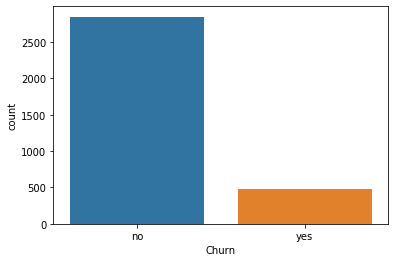

In [8]:
# frequency count of churners vs non-churners

sns.countplot(data=df, x='Churn')

In [9]:
# subset original data to calculate churn by state

churn_by_state = df[['State', 'Churn']]

In [10]:
# pivot on state and churn, get counts by churn

churn_by_state = churn_by_state.pivot_table(index='State', columns='Churn', aggfunc=len, margins=True)

In [11]:
# convert churn by state to dataframe
# rename columns
# drop row sum

churn_by_state_df = pd.DataFrame(churn_by_state.to_records())
churn_by_state_df = churn_by_state_df.rename(columns={'no': 'Retained', 'yes': 'Churned', 'All': 'Total_Customers'})
churn_by_state_df = churn_by_state_df.drop(51)
churn_by_state_df

State  Retained  Churned  Total_Customers
0     AK        49        3               52
1     AL        72        8               80
2     AR        44       11               55
3     AZ        60        4               64
4     CA        25        9               34
5     CO        57        9               66
6     CT        62       12               74
7     DC        49        5               54
8     DE        52        9               61
9     FL        55        8               63
10    GA        46        8               54
11    HI        50        3               53
12    IA        41        3               44
13    ID        64        9               73
14    IL        53        5               58
15    IN        62        9               71
16    KS        57       13               70
17    KY        51        8               59
18    LA        47        4               51
19    MA        54       11               65
20    MD        53       17               70
21    ME        49       13               62
22    MI        57       16               73
23    MN        69       15               84
24    MO        56        7               63
25    MS        51       14               65
26    MT        54       14               68
27    NC        57       11               68
28    ND        56        6               62
29    NE        56        5               61
30    NH        47        9               56
31    NJ        50       18               68
32    NM        56        6               62
33    NV        52       14               66
34    NY        68       15               83
35    OH        68       10               78
36    OK        52        9               61
37    OR        67       11               78
38    PA        37        8               45
39    RI        59        6               65
40    SC        46       14               60
41    SD        52        8               60
42    TN        48        5               53
43    TX        54       18               72
44    UT        62       10               72
45    VA        72        5               77
46    VT        65        8               73
47    WA        52       14               66
48    WI        71        7               78
49    WV        96       10              106
50    WY        68        9               77

In [12]:
# check data types

churn_by_state_df.dtypes

State              object
Retained            int64
Churned             int64
Total_Customers     int64
dtype: object

In [13]:
# calculate churn rate by state

churn_by_state_df['Churn_Rate'] = (churn_by_state_df['Churned']/churn_by_state_df['Total_Customers'])*100

In [14]:
# sort by rate

churn_by_state_df.sort_values('Churn_Rate', ascending=False)

State  Retained  Churned  Total_Customers  Churn_Rate
31    NJ        50       18               68   26.470588
4     CA        25        9               34   26.470588
43    TX        54       18               72   25.000000
20    MD        53       17               70   24.285714
40    SC        46       14               60   23.333333
22    MI        57       16               73   21.917808
25    MS        51       14               65   21.538462
33    NV        52       14               66   21.212121
47    WA        52       14               66   21.212121
21    ME        49       13               62   20.967742
26    MT        54       14               68   20.588235
2     AR        44       11               55   20.000000
16    KS        57       13               70   18.571429
34    NY        68       15               83   18.072289
23    MN        69       15               84   17.857143
38    PA        37        8               45   17.777778
19    MA        54       11               65   16.923077
6     CT        62       12               74   16.216216
27    NC        57       11               68   16.176471
30    NH        47        9               56   16.071429
10    GA        46        8               54   14.814815
8     DE        52        9               61   14.754098
36    OK        52        9               61   14.754098
37    OR        67       11               78   14.102564
44    UT        62       10               72   13.888889
5     CO        57        9               66   13.636364
17    KY        51        8               59   13.559322
41    SD        52        8               60   13.333333
35    OH        68       10               78   12.820513
9     FL        55        8               63   12.698413
15    IN        62        9               71   12.676056
13    ID        64        9               73   12.328767
50    WY        68        9               77   11.688312
24    MO        56        7               63   11.111111
46    VT        65        8               73   10.958904
1     AL        72        8               80   10.000000
32    NM        56        6               62    9.677419
28    ND        56        6               62    9.677419
49    WV        96       10              106    9.433962
42    TN        48        5               53    9.433962
7     DC        49        5               54    9.259259
39    RI        59        6               65    9.230769
48    WI        71        7               78    8.974359
14    IL        53        5               58    8.620690
29    NE        56        5               61    8.196721
18    LA        47        4               51    7.843137
12    IA        41        3               44    6.818182
45    VA        72        5               77    6.493506
3     AZ        60        4               64    6.250000
0     AK        49        3               52    5.769231
11    HI        50        3               53    5.660377

In [15]:
# Calculate percentage of customers by state

churn_by_state_df['PCT_Customers_by_State'] = (churn_by_state_df.Total_Customers/churn_by_state_df.Total_Customers.sum())*100

In [16]:
# Sort df by churn rate and percentage of customers

churn_by_state_df = churn_by_state_df.sort_values(['Churn_Rate', 'PCT_Customers_by_State'], ascending=False)
churn_by_state_df

State  Retained  Churned  Total_Customers  Churn_Rate  \
31    NJ        50       18               68   26.470588   
4     CA        25        9               34   26.470588   
43    TX        54       18               72   25.000000   
20    MD        53       17               70   24.285714   
40    SC        46       14               60   23.333333   
22    MI        57       16               73   21.917808   
25    MS        51       14               65   21.538462   
33    NV        52       14               66   21.212121   
47    WA        52       14               66   21.212121   
21    ME        49       13               62   20.967742   
26    MT        54       14               68   20.588235   
2     AR        44       11               55   20.000000   
16    KS        57       13               70   18.571429   
34    NY        68       15               83   18.072289   
23    MN        69       15               84   17.857143   
38    PA        37        8               45   17.777778   
19    MA        54       11               65   16.923077   
6     CT        62       12               74   16.216216   
27    NC        57       11               68   16.176471   
30    NH        47        9               56   16.071429   
10    GA        46        8               54   14.814815   
8     DE        52        9               61   14.754098   
36    OK        52        9               61   14.754098   
37    OR        67       11               78   14.102564   
44    UT        62       10               72   13.888889   
5     CO        57        9               66   13.636364   
17    KY        51        8               59   13.559322   
41    SD        52        8               60   13.333333   
35    OH        68       10               78   12.820513   
9     FL        55        8               63   12.698413   
15    IN        62        9               71   12.676056   
13    ID        64        9               73   12.328767   
50    WY        68        9               77   11.688312   
24    MO        56        7               63   11.111111   
46    VT        65        8               73   10.958904   
1     AL        72        8               80   10.000000   
28    ND        56        6               62    9.677419   
32    NM        56        6               62    9.677419   
49    WV        96       10              106    9.433962   
42    TN        48        5               53    9.433962   
7     DC        49        5               54    9.259259   
39    RI        59        6               65    9.230769   
48    WI        71        7               78    8.974359   
14    IL        53        5               58    8.620690   
29    NE        56        5               61    8.196721   
18    LA        47        4               51    7.843137   
12    IA        41        3               44    6.818182   
45    VA        72        5               77    6.493506   
3     AZ        60        4               64    6.250000   
0     AK        49        3               52    5.769231   
11    HI        50        3               53    5.660377   

    PCT_Customers_by_State  
31                2.040204  
4                 1.020102  
43                2.160216  
20                2.100210  
40                1.800180  
22                2.190219  
25                1.950195  
33                1.980198  
47                1.980198  
21                1.860186  
26                2.040204  
2                 1.650165  
16                2.100210  
34                2.490249  
23                2.520252  
38                1.350135  
19                1.950195  
6                 2.220222  
27                2.040204  
30                1.680168  
10                1.620162  
8                 1.830183  
36                1.830183  
37                2.340234  
44                2.160216  
5                 1.980198  
17                1.770177  
41                1.800180  
35                2.340234  
9           

In [17]:
# create states to region dict

states = {
        'AK': 'Other',
        'AL': 'South',
        'AR': 'South',
        'AS': 'Other',
        'AZ': 'West',
        'CA': 'West',
        'CO': 'West',
        'CT': 'Northeast',
        'DC': 'Northeast',
        'DE': 'Northeast',
        'FL': 'South',
        'GA': 'South',
        'GU': 'Other',
        'HI': 'Other',
        'IA': 'Midwest',
        'ID': 'West',
        'IL': 'Midwest',
        'IN': 'Midwest',
        'KS': 'Midwest',
        'KY': 'South',
        'LA': 'South',
        'MA': 'Northeast',
        'MD': 'Northeast',
        'ME': 'Northeast',
        'MI': 'West',
        'MN': 'Midwest',
        'MO': 'Midwest',
        'MP': 'Other',
        'MS': 'South',
        'MT': 'West',
        'NA': 'Other',
        'NC': 'South',
        'ND': 'Midwest',
        'NE': 'West',
        'NH': 'Northeast',
        'NJ': 'Northeast',
        'NM': 'West',
        'NV': 'West',
        'NY': 'Northeast',
        'OH': 'Midwest',
        'OK': 'South',
        'OR': 'West',
        'PA': 'Northeast',
        'PR': 'Other',
        'RI': 'Northeast',
        'SC': 'South',
        'SD': 'Midwest',
        'TN': 'South',
        'TX': 'South',
        'UT': 'West',
        'VA': 'South',
        'VI': 'Other',
        'VT': 'Northeast',
        'WA': 'West',
        'WI': 'Midwest',
        'WV': 'South',
        'WY': 'West'
}

In [18]:
# convert region lookup to DF

regions = pd.DataFrame(states, index=[0])

In [19]:
# transpose DF

regions = regions.T

In [20]:
# reset index

regions = regions.reset_index()

In [21]:
# add prefix to convert column names to strings

regions = regions.add_prefix('X_')

In [22]:
# check column names

regions.columns

Index(['X_index', 'X_0'], dtype='object')

In [23]:
# rename columns

regions = regions.rename(columns={'X_index': 'State', 'X_0': 'US_Region'})

In [29]:
# check dataframe 
# make directory for regional analysis
# convert lookup key to csv

! pwd
! mkdir geo_analytics
! ls

df.to_csv('geo_analytics/region_key.csv')

/Users/andrewhoffman/Desktop/NYC_Academy_of_Data_Science/Classes/Capstone_Project/sample_telco_churn_model
mkdir: geo_analytics: File exists
README.md             geo_analytics
churn_analytics.ipynb raw_churn_data.csv


In [30]:
# Join regions to churn by state df

churn_by_state_df2 = pd.merge(churn_by_state_df, regions, how='left', on='State')

In [112]:
churn_by_state_df2.dtypes

State                      object
Retained                    int64
Churned                     int64
Total_Customers             int64
Churn_Rate                float64
PCT_Customers_by_State    float64
US_Region                  object
dtype: object

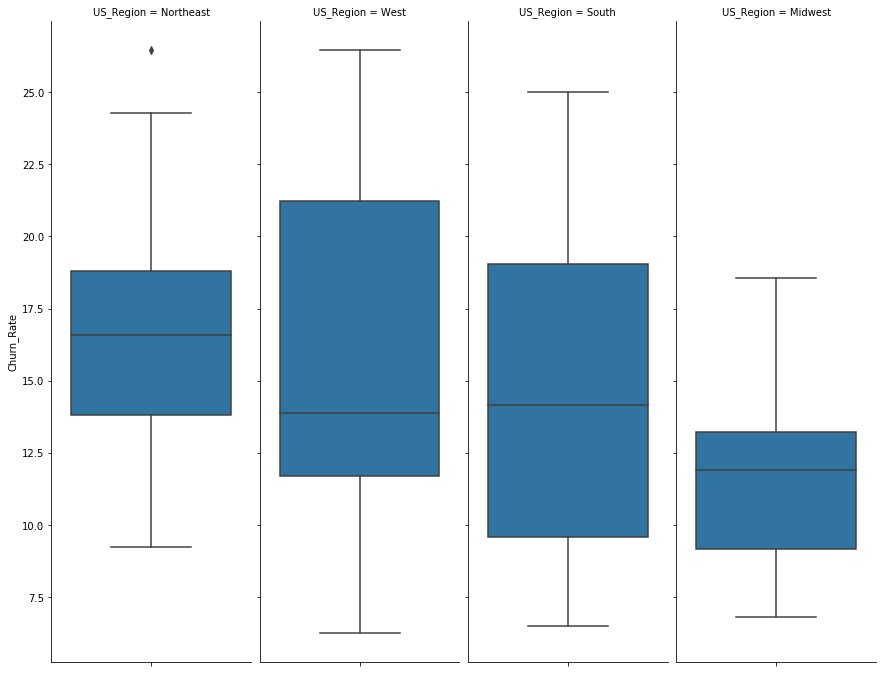

In [38]:
# visualize churn rates by region excluding US_Region == 'Other'

g = sns.catplot(data=churn_by_state_df2.query('US_Region != "Other"'), y='Churn_Rate', kind='box', col='US_Region')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
g.savefig('geo_analytics/churn_rate_by_region_barplot.jpeg')

In [34]:
# Calculate percentage of churners by state
# Calculate churn rate index

churn_by_state_df2['PCT_Churners_by_State'] = (churn_by_state_df2.Churned/churn_by_state_df2.Churned.sum())*100
churn_by_state_df2['Churn_Index'] = (churn_by_state_df2.Churned/churn_by_state_df2.Churned.mean())*100

In [36]:
# Check agg numbers against length of the original file

churn_by_state_df2
sum(churn_by_state_df2['Total_Customers']) == len(df)

True

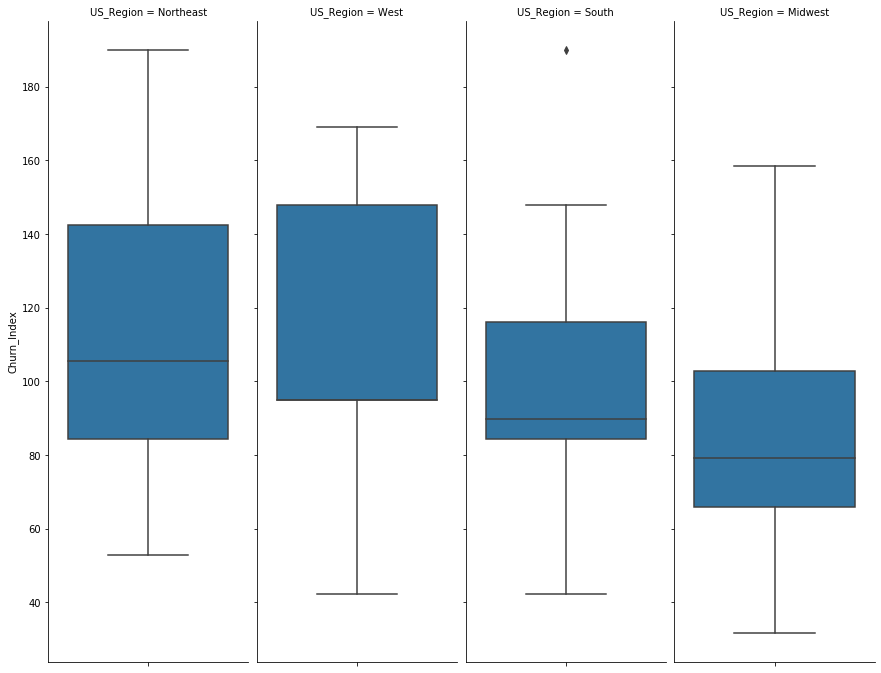

In [39]:
# visualize churn index by region excluding US_Region == 'Other'

g = sns.catplot(data=churn_by_state_df2.query('US_Region != "Other"'), y='Churn_Index', kind='box', col='US_Region')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
g.savefig('geo_analytics/churn_index_by_region_barplot.jpeg')

In [41]:
# write dataframe to csv

churn_by_state_df2.to_csv('geo_analytics/churn_calcs_by_state_with_regions.csv')

In [43]:
# create a new dataframe to identify correlation between state and churn
# create dummy variables for state to run correlation

corr_by_state = df[['State', 'Churn']]
corr_by_state['Churn'] = corr_by_state['Churn'].replace({'no':0, 'yes':1})
corr_by_state = pd.get_dummies(corr_by_state)

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [44]:
# reorder columns with 'Churn' in the last index position

corr_by_state.columns
csc = ['State_WY', 'State_AK', 'State_AL', 'State_AR', 'State_AZ', 'State_CA',
       'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA',
       'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS',
       'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI',
       'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND',
       'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY',
       'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC',
       'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT',
       'State_WA', 'State_WI', 'State_WV', 'Churn']

corr_by_state = corr_by_state[csc]
corr_by_state

State_WY  State_AK  State_AL  State_AR  State_AZ  State_CA  State_CO  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
3328         0         0         0         0         1         0         0   
3329         0         0         0         0         0         0         0   
3330         0         0         0         0         0         0         0   
3331         0         0         0         0         0         0         0   
3332         0         0         0         0         0         0         0   

      State_CT  State_DC  State_DE  State_FL  State_GA  State_HI  State_IA  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
3328         0         0         0         0         0         0         0   
3329         0         0         0         0         0         0         0   
3330         0         0         0         0         0         0         0   
3331         1         0         0         0         0         0         0   
3332         0         0         0         0         0         0         0   

      State_ID  State_IL  State_IN  State_KS  State_KY  State_LA  State_MA  \
0            0         0         0         1         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
3328         0         0         0         0         0         0         0   
3329         0         0         0         0         0         0         0   
3330         0         0         0         0         0         0         0   
3331         0         0         0         0         0         0         0   
3332         0         0         0         0         0         0         0   

      State_MD  State_ME  State_MI  State_MN  ...  State_MT  State_NC  \
0            0         0         0         0  ...         0         0   
1            0         0         0         0  ...         0         0   
2            0         0         0         0  ...         0         0   
3            0         0         0         0  ...         0         0   
4            0         0         0         0  ...         0         0   
...        ...       ...       ...       ...  ...       ...       ...   
3328         0         0         0         0  ...         0         0   
3329         0         0         0         0  ...         0         0   
3330         0         0         0         0  ...         0         0   
3331         0         0         0         0  ...         0         0   
3332         0         0         0         0  ...         0         0   

      State_ND  State_NE  State_NH  State_NJ  State_NM  State_NV  State_NY  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         1         0         0         0   
3     

In [45]:
# Calculate correlation by state and convert to dataframe

state_corr = corr_by_state[corr_by_state.columns[1:]].corr()['Churn'][:-1]
state_corr = pd.DataFrame(state_corr).reset_index()
state_corr

index     Churn
0   State_AK -0.031194
1   State_AL -0.020009
2   State_AR  0.020270
3   State_AZ -0.032759
4   State_CA  0.034547
5   State_CO -0.003453
6   State_CT  0.007383
7   State_DC -0.019074
8   State_DE  0.001019
9   State_FL -0.007070
10  State_GA  0.001179
11  State_HI -0.031890
12  State_IA -0.025212
13  State_ID -0.009194
14  State_IL -0.022194
15  State_IN -0.007608
16  State_KS  0.016976
17  State_KY -0.003555
18  State_LA -0.023543
19  State_MA  0.009742
20  State_MD  0.040752
21  State_ME  0.025329
22  State_MI  0.031570
23  State_MN  0.015374
24  State_MO -0.013329
25  State_MS  0.028233
26  State_MT  0.024995
27  State_NC  0.006908
28  State_ND -0.018828
29  State_NE -0.024416
30  State_NH  0.005867
31  State_NJ  0.049111
32  State_NM -0.018828
33  State_NV  0.027136
34  State_NY  0.016256
35  State_OH -0.007348
36  State_OK  0.001019
37  State_OR -0.001710
38  State_PA  0.010922
39  State_RI -0.021076
40  State_SC  0.034008
41  State_SD -0.004454
42  State_TN -0.018263
43  State_TX  0.044358
44  State_UT -0.002543
45  State_VA -0.034940
46  State_VT -0.015017
47  State_WA  0.027136
48  State_WI -0.024262
49  State_WV -0.026039

In [46]:
# rename columns

state_corr = state_corr.rename(columns={'index':'Prefix'})

In [47]:
# format state abbreviations for join with region index

state_corr['State'] = [x.split('_')[1] for x in state_corr['Prefix']]

In [48]:
# drop column with prefix

scc2 = [ 'State', 'Churn']
state_corr = state_corr[scc2]
state_corr

State     Churn
0     AK -0.031194
1     AL -0.020009
2     AR  0.020270
3     AZ -0.032759
4     CA  0.034547
5     CO -0.003453
6     CT  0.007383
7     DC -0.019074
8     DE  0.001019
9     FL -0.007070
10    GA  0.001179
11    HI -0.031890
12    IA -0.025212
13    ID -0.009194
14    IL -0.022194
15    IN -0.007608
16    KS  0.016976
17    KY -0.003555
18    LA -0.023543
19    MA  0.009742
20    MD  0.040752
21    ME  0.025329
22    MI  0.031570
23    MN  0.015374
24    MO -0.013329
25    MS  0.028233
26    MT  0.024995
27    NC  0.006908
28    ND -0.018828
29    NE -0.024416
30    NH  0.005867
31    NJ  0.049111
32    NM -0.018828
33    NV  0.027136
34    NY  0.016256
35    OH -0.007348
36    OK  0.001019
37    OR -0.001710
38    PA  0.010922
39    RI -0.021076
40    SC  0.034008
41    SD -0.004454
42    TN -0.018263
43    TX  0.044358
44    UT -0.002543
45    VA -0.034940
46    VT -0.015017
47    WA  0.027136
48    WI -0.024262
49    WV -0.026039

In [49]:
# Join region index
# write to csv

state_corr = pd.merge(state_corr, regions, how='left', on='State')
state_corr.to_csv('geo_analytics/churn_corr_by_state.csv')

In [54]:
# recreate the same workflow to look at correlation at regional level

# Grab original values
corr_by_region = df[['State', 'Churn']]

# reformat churn variable
corr_by_region['Churn'] = corr_by_region['Churn'].replace({'no':0, 'yes':1})

# join regions from regions key
corr_by_region = pd.merge(corr_by_region, regions, how='left', on='State')

# drop state column
corr_by_region_cols = ['US_Region', 'Churn']
corr_by_region = corr_by_region[corr_by_region_cols]
corr_by_region

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


US_Region  Churn
0       Midwest      0
1       Midwest      0
2     Northeast      0
3       Midwest      0
4         South      0
...         ...    ...
3328       West      0
3329      South      0
3330  Northeast      0
3331  Northeast      0
3332      South      0

[3333 rows x 2 columns]

In [55]:
# get dummy variables from region column
corr_by_region = pd.get_dummies(corr_by_region)

# reorder columns
corr_by_region_cols = ['US_Region_Midwest', 'US_Region_Northeast', 'US_Region_Other','US_Region_South', 'US_Region_West', 'Churn']
corr_by_region = corr_by_region[corr_by_region_cols]

# check df
corr_by_region

US_Region_Midwest  US_Region_Northeast  US_Region_Other  \
0                     1                    0                0   
1                     1                    0                0   
2                     0                    1                0   
3                     1                    0                0   
4                     0                    0                0   
...                 ...                  ...              ...   
3328                  0                    0                0   
3329                  0                    0                0   
3330                  0                    1                0   
3331                  0                    1                0   
3332                  0                    0                0   

      US_Region_South  US_Region_West  Churn  
0                   0               0      0  
1                   0               0      0  
2                   0               0      0  
3                   0               0      0  
4                   1               0      0  
...               ...             ...    ...  
3328                0               1      0  
3329                1               0      0  
3330                0               0      0  
3331                0               0      0  
3332                1               0      0  

[3333 rows x 6 columns]

In [64]:
# run correlation calculation
region_corr = corr_by_region[corr_by_region.columns[1:]].corr()['Churn'][:-1]

# convert to cataframe
region_corr = pd.DataFrame(region_corr).reset_index()

# reformat columns and labels
region_corr = region_corr.rename(columns={'index':'Prefix'})
region_corr['US_Region'] = [x.split('_')[2] for x in region_corr['Prefix']]

# drop prefix column and merge state index for plotly viz (Corr by Region)
region_corr_cols = ['US_Region', 'Churn']
region_corr = region_corr[region_corr_cols]
region_corr = pd.merge(regions, region_corr, how='left', on='US_Region')

# write to csv
region_corr.to_csv('geo_analytics/churn_corr_by_region.csv')

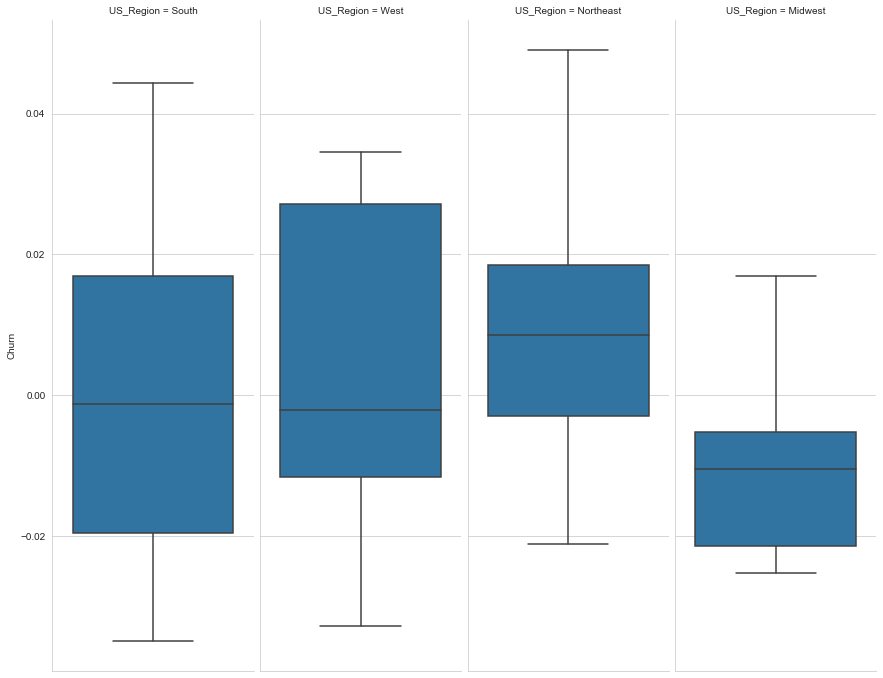

In [94]:
# visualize state correlation distro by region excluding US_Region == 'Other'


g = sns.catplot(data=state_corr.query('US_Region != "Other"'), y='Churn', kind='box', hue='US_Region', col='US_Region')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
g.savefig('geo_analytics/state_corr_dist_by_region_barplot.jpeg')

In [66]:
# geo plot of correlation with churn by region

import plotly.graph_objects as go

df = region_corr
fig = go.Figure(data=go.Choropleth(
    locations=df['State'], # Spatial coordinates
    z = df['Churn'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Purples',
    colorbar_title = "ρ",
))

fig.update_layout(
    title_text = 'Correlation Between Region and Churn',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [67]:
# geo plot of correlation with churn by state

import plotly.graph_objects as go

df = state_corr
fig = go.Figure(data=go.Choropleth(
    locations=df['State'], # Spatial coordinates
    z = df['Churn'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Purples',
    colorbar_title = "ρ",
))

fig.update_layout(
    title_text = 'Correlation Between State and Churn',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [145]:
# geo plot of conversion rate by state

import plotly.graph_objects as go

df = churn_by_state_df2
fig = go.Figure(data=go.Choropleth(
    locations=df['State'], # Spatial coordinates
    z = df['Churn_Rate'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Churn Rate",
))

fig.update_layout(
    title_text = 'Churn Rate By State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [146]:
# geo plot percentage of customer base by state

import plotly.graph_objects as go

df = churn_by_state_df2
fig = go.Figure(data=go.Choropleth(
    locations=df['State'], # Spatial coordinates
    z = df['PCT_Customers_by_State'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Percentage of Customers",
))

fig.update_layout(
    title_text = 'Percentage of Customers by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

### EDA AND FEATURE ENGINEERING

In [111]:
# read in raw data

churn_data = pd.read_csv('https://assets.datacamp.com/production/repositories/1764/datasets/79c5446a4a753e728e32b4a67138344847b8f131/Churn.csv')

In [112]:
# df EDA

churn_data.head()

Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  Intl_Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ_Calls Churn Intl_Plan Vmail_Plan  Day_Calls  Day_Charge  \
0               1    no        no        yes        110       45.07   
1               1    no        no        yes        123       27.47   
2               0    no        no         no        114       41.38   
3               2    no       yes         no         71       50.90   
4               3    no       yes         no        113       28.34   

   Eve_Calls  Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  \
0         99       16.78           91         11.01           3         2.70   
1        103       16.62          103         11.45           3         3.70   
2        110       10.30          104          7.32           5         3.29   
3         88        5.26           89          8.86           7         1.78   
4        122       12.61          121          8.41           3         2.73   

  State  Area_Code     Phone  
0    KS        415  382-4657  
1    OH        415  371-7191  
2    NJ        415  358-1921  
3    OH        408  375-9999  
4    OK        415  330-6626

In [113]:
# df EDA

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [114]:
# print column index

cols = churn_data.columns

for i in enumerate(cols):
    print(i)

(0, 'Account_Length')
(1, 'Vmail_Message')
(2, 'Day_Mins')
(3, 'Eve_Mins')
(4, 'Night_Mins')
(5, 'Intl_Mins')
(6, 'CustServ_Calls')
(7, 'Churn')
(8, 'Intl_Plan')
(9, 'Vmail_Plan')
(10, 'Day_Calls')
(11, 'Day_Charge')
(12, 'Eve_Calls')
(13, 'Eve_Charge')
(14, 'Night_Calls')
(15, 'Night_Charge')
(16, 'Intl_Calls')
(17, 'Intl_Charge')
(18, 'State')
(19, 'Area_Code')
(20, 'Phone')


In [115]:
# Calculate 'Total Mins' feature

churn_data['Total_Mins'] = churn_data.iloc[:, 2:6].sum(axis=1)
churn_data

Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  \
0                128             25     265.1     197.4       244.7   
1                107             26     161.6     195.5       254.4   
2                137              0     243.4     121.2       162.6   
3                 84              0     299.4      61.9       196.9   
4                 75              0     166.7     148.3       186.9   
...              ...            ...       ...       ...         ...   
3328             192             36     156.2     215.5       279.1   
3329              68              0     231.1     153.4       191.3   
3330              28              0     180.8     288.8       191.9   
3331             184              0     213.8     159.6       139.2   
3332              74             25     234.4     265.9       241.4   

      Intl_Mins  CustServ_Calls Churn Intl_Plan Vmail_Plan  Day_Calls  \
0          10.0               1    no        no        yes        110   
1          13.7               1    no        no        yes        123   
2          12.2               0    no        no         no        114   
3           6.6               2    no       yes         no         71   
4          10.1               3    no       yes         no        113   
...         ...             ...   ...       ...        ...        ...   
3328        9.9               2    no        no        yes         77   
3329        9.6               3    no        no         no         57   
3330       14.1               2    no        no         no        109   
3331        5.0               2    no       yes         no        105   
3332       13.7               0    no        no        yes        113   

      Day_Charge  Eve_Calls  Eve_Charge  Night_Calls  Night_Charge  \
0          45.07         99       16.78           91         11.01   
1          27.47        103       16.62          103         11.45   
2          41.38        110       10.30          104          7.32   
3          50.90         88        5.26           89          8.86   
4          28.34        122       12.61          121          8.41   
...          ...        ...         ...          ...           ...   
3328       26.55        126       18.32           83         12.56   
3329       39.29         55       13.04          123          8.61   
3330       30.74         58       24.55           91          8.64   
3331       36.35         84       13.57          137          6.26   
3332       39.85         82       22.60           77         10.86   

      Intl_Calls  Intl_Charge State  Area_Code     Phone  Total_Mins  
0              3         2.70    KS        415  382-4657       717.2  
1              3         3.70    OH        415  371-7191       625.2  
2              5         3.29    NJ        415  358-1921       539.4  
3              7         1.78    OH        408  375-9999       564.8  
4              3         2.73    OK        415  330-6626       512.0  
...          ...          ...   ...        ...       ...         ...  
3328           6         2.67    AZ        415  414-4276       660.7  
3329           4         2.59    WV        415  370-3271       585.4  
3330           6         3.81    RI        510  328-8230       675.6  
3331          10         1.35    CT        510  364-6381       517.6  
3332           4         3.70    TN        415  400-4344       755.4  

[3333 rows x 22 columns]

In [116]:
# resort columns for feature engineering

cols = ['Phone',
 'Area_Code',
 'State',
 'Churn',
 'Intl_Plan',
 'Vmail_Plan',
 'CustServ_Calls',
 'Vmail_Message',
 'Account_Length',
 'Day_Mins',
 'Eve_Mins',
 'Night_Mins',
 'Intl_Mins',
 'Total_Mins',
 'Day_Calls',
 'Eve_Calls',
 'Night_Calls',
 'Intl_Calls',
 'Day_Charge',
 'Eve_Charge',
 'Night_Charge',
 'Intl_Charge']

In [117]:
# subset by sorted columns list

churn_data = churn_data[cols]

In [118]:
for i in enumerate(cols):
    print(i)

(0, 'Phone')
(1, 'Area_Code')
(2, 'State')
(3, 'Churn')
(4, 'Intl_Plan')
(5, 'Vmail_Plan')
(6, 'CustServ_Calls')
(7, 'Vmail_Message')
(8, 'Account_Length')
(9, 'Day_Mins')
(10, 'Eve_Mins')
(11, 'Night_Mins')
(12, 'Intl_Mins')
(13, 'Total_Mins')
(14, 'Day_Calls')
(15, 'Eve_Calls')
(16, 'Night_Calls')
(17, 'Intl_Calls')
(18, 'Day_Charge')
(19, 'Eve_Charge')
(20, 'Night_Charge')
(21, 'Intl_Charge')


In [119]:
# Create 'Total Calls' and 'Total Charge' features

churn_data['Total_Calls'] = churn_data.iloc[:, 14:18].sum(axis=1)
churn_data['Total_Charge'] = churn_data.iloc[:, 18:22].sum(axis=1)
churn_data

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Phone  Area_Code State Churn Intl_Plan Vmail_Plan  CustServ_Calls  \
0     382-4657        415    KS    no        no        yes               1   
1     371-7191        415    OH    no        no        yes               1   
2     358-1921        415    NJ    no        no         no               0   
3     375-9999        408    OH    no       yes         no               2   
4     330-6626        415    OK    no       yes         no               3   
...        ...        ...   ...   ...       ...        ...             ...   
3328  414-4276        415    AZ    no        no        yes               2   
3329  370-3271        415    WV    no        no         no               3   
3330  328-8230        510    RI    no        no         no               2   
3331  364-6381        510    CT    no       yes         no               2   
3332  400-4344        415    TN    no        no        yes               0   

      Vmail_Message  Account_Length  Day_Mins  Eve_Mins  Night_Mins  \
0                25             128     265.1     197.4       244.7   
1                26             107     161.6     195.5       254.4   
2                 0             137     243.4     121.2       162.6   
3                 0              84     299.4      61.9       196.9   
4                 0              75     166.7     148.3       186.9   
...             ...             ...       ...       ...         ...   
3328             36             192     156.2     215.5       279.1   
3329              0              68     231.1     153.4       191.3   
3330              0              28     180.8     288.8       191.9   
3331              0             184     213.8     159.6       139.2   
3332             25              74     234.4     265.9       241.4   

      Intl_Mins  Total_Mins  Day_Calls  Eve_Calls  Night_Calls  Intl_Calls  \
0          10.0       717.2        110         99           91           3   
1          13.7       625.2        123        103          103           3   
2          12.2       539.4        114        110          104           5   
3           6.6       564.8         71         88           89           7   
4          10.1       512.0        113        122          121           3   
...         ...         ...        ...        ...          ...         ...   
3328        9.9       660.7         77        126           83           6   
3329        9.6       585.4         57         55          123           4   
3330       14.1       675.6        109         58           91           6   
3331        5.0       517.6        105         84          137          10   
3332       13.7       755.4        113         82           77           4   

      Day_Charge  Eve_Charge  Night_Charge  Intl_Charge  Total_Calls  \
0          45.07       16.78         11.01         2.70          303   
1          27.47       16.62         11.45         3.70          332   
2          41.38       10.30          7.32         3.29          333   
3          50.90        5.26          8.86         1.78          255   
4          28.34       12.61          8.41         2.73          359   
...          ...         ...           ...          ...          ...   
3328       26.55       18.32         12.56         2.67          292   
3329       39.29       13.04          8.61         2.59          239   
3330       30.74       24.55          8.64         3.81          264   
3331       36.35       13.57          6.26         1.35          336   
3332       39.85       22.60         10.86         3.70          276   

      Total_Charge  
0            75.56  
1            59.24  
2            62.29  
3            66.80  
4            52.09  
...            ...  
3328         60.10  
3329         63.53  
3330         67.74  
3331         57.53  
3332         77.01  

[3333 rows x 24 columns]

In [120]:
# Create "Average Daily Charge" Column

churn_data['Avg_Daily_Charge'] = churn_data['Total_Charge']/churn_data['Account_Length']

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
# Create "Average Cost Per Minute", "Average Minutes Per Call" and "Average Cost Per Call" Features

churn_data['Avg_Cost_Per_Minute'] = churn_data['Total_Charge']/churn_data['Total_Mins']
churn_data['Avg_Minutes_Per_Call'] = churn_data['Total_Mins']/churn_data['Total_Calls']
churn_data['Avg_Cost_Per_Call'] = churn_data['Avg_Minutes_Per_Call']*churn_data['Avg_Cost_Per_Minute']

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [122]:
# Create day, eve, night, and intl mins to total features

churn_data['Day_Mins_to_Total'] = (churn_data['Day_Mins']/churn_data['Total_Mins'])*100
churn_data['Eve_Mins_to_Total'] = churn_data['Eve_Mins']/churn_data['Total_Mins']*100
churn_data['Night_Mins_to_Total'] = churn_data['Night_Mins']/churn_data['Total_Mins']*100
churn_data['Intl_Mins_to_Total'] = churn_data['Intl_Mins']/churn_data['Total_Mins']*100

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [123]:
# Create day, eve, night, and intl charge to total features

churn_data['Day_Charge_to_Total'] = (churn_data['Day_Charge']/churn_data['Total_Charge'])*100
churn_data['Eve_Charge_to_Total'] = churn_data['Eve_Charge']/churn_data['Total_Charge']*100
churn_data['Night_Charge_to_Total'] = churn_data['Night_Charge']/churn_data['Total_Charge']*100
churn_data['Intl_Charge_to_Total'] = churn_data['Intl_Charge']/churn_data['Total_Charge']*100

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [127]:
churn_data.columns

Index(['Phone', 'Area_Code', 'State', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'CustServ_Calls', 'Vmail_Message', 'Account_Length', 'Day_Mins',
       'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Total_Mins', 'Day_Calls',
       'Eve_Calls', 'Night_Calls', 'Intl_Calls', 'Day_Charge', 'Eve_Charge',
       'Night_Charge', 'Intl_Charge', 'Total_Calls', 'Total_Charge',
       'Avg_Daily_Charge', 'Avg_Cost_Per_Minute', 'Avg_Minutes_Per_Call',
       'Avg_Cost_Per_Call', 'Day_Mins_to_Total', 'Eve_Mins_to_Total',
       'Night_Mins_to_Total', 'Intl_Mins_to_Total', 'Day_Charge_to_Total',
       'Eve_Charge_to_Total', 'Night_Charge_to_Total', 'Intl_Charge_to_Total'],
      dtype='object')

In [129]:
# Subset modified dataset by continuous features (with churn flag)

bp_cols = ['Churn', 'CustServ_Calls', 'Vmail_Message', 'Account_Length', 'Day_Mins',
            'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Total_Mins', 'Day_Calls',
            'Eve_Calls', 'Night_Calls', 'Intl_Calls', 'Day_Charge', 'Eve_Charge',
            'Night_Charge', 'Intl_Charge', 'Total_Calls', 'Total_Charge',
            'Avg_Daily_Charge', 'Avg_Cost_Per_Minute', 'Avg_Minutes_Per_Call',
            'Avg_Cost_Per_Call', 'Day_Mins_to_Total', 'Eve_Mins_to_Total',
            'Night_Mins_to_Total', 'Intl_Mins_to_Total', 'Day_Charge_to_Total',
            'Eve_Charge_to_Total', 'Night_Charge_to_Total', 'Intl_Charge_to_Total']

In [133]:
# Create a quant dataframe for visualization

quant = churn_data[bp_cols]

In [134]:
# get descriptive analytics for quant column

quant.describe()

CustServ_Calls  Vmail_Message  Account_Length     Day_Mins  \
count     3333.000000    3333.000000     3333.000000  3333.000000   
mean         1.562856       8.099010      101.064806   179.775098   
std          1.315491      13.688365       39.822106    54.467389   
min          0.000000       0.000000        1.000000     0.000000   
25%          1.000000       0.000000       74.000000   143.700000   
50%          1.000000       0.000000      101.000000   179.400000   
75%          2.000000      20.000000      127.000000   216.400000   
max          9.000000      51.000000      243.000000   350.800000   

          Eve_Mins   Night_Mins    Intl_Mins   Total_Mins    Day_Calls  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean    200.980348   200.872037    10.237294   591.864776   100.435644   
std      50.713844    50.573847     2.791840    89.954251    20.069084   
min       0.000000    23.200000     0.000000   284.300000     0.000000   
25%     166.600000   167.000000     8.500000   531.500000    87.000000   
50%     201.400000   201.200000    10.300000   593.600000   101.000000   
75%     235.300000   235.300000    12.100000   652.400000   114.000000   
max     363.700000   395.000000    20.000000   885.000000   165.000000   

         Eve_Calls  Night_Calls   Intl_Calls   Day_Charge   Eve_Charge  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean    100.114311   100.107711     4.479448    30.562307    17.083540   
std      19.922625    19.568609     2.461214     9.259435     4.310668   
min       0.000000    33.000000     0.000000     0.000000     0.000000   
25%      87.000000    87.000000     3.000000    24.430000    14.160000   
50%     100.000000   100.000000     4.000000    30.500000    17.120000   
75%     114.000000   113.000000     6.000000    36.790000    20.000000   
max     170.000000   175.000000    20.000000    59.640000    30.910000   

       Night_Charge  Intl_Charge  Total_Calls  Total_Charge  Avg_Daily_Charge  \
count   3333.000000  3333.000000  3333.000000   3333.000000       3333.000000   
mean       9.039325     2.764581   305.137114     59.449754          0.930584   
std        2.275873     0.753773    34.448164     10.502261          2.927339   
min        1.040000     0.000000   191.000000     22.930000          0.158488   
25%        7.520000     2.300000   282.000000     52.380000          0.447424   
50%        9.050000     2.780000   305.000000     59.470000          0.589368   
75%       10.590000     3.270000   328.000000     66.480000          0.815570   
max       17.770000     5.400000   416.000000     96.150000         69.950000   

       Avg_Cost_Per_Minute  Avg_Minutes_Per_Call  Avg_Cost_Per_Call  \
count          3333.000000           3333.000000        3333.000000   
mean              0.100354              1.964884           0.197334   
std               0.008440              0.376958           0.041760   
min               0.066950              0.798596           0.068973   
25%               0.094893              1.705187           0.168741   
50%               0.100385              1.939936           0.194419   
75%               0.106056              2.195963           0.223420   
max               0.129791              3.612245           0.409718   

       Day_Mins_to_Total  Eve_Mins_to_Total  Night_Mins_to_Total  \
count        3333.000000        3333.000000          3333.000000   
mean           30.208202          34.010976            34.008750   
std             7.696959           7.402189             7.388904   
min             0.000000           0.000000             6.417704   
25%            25.259369          29.194139            29.116860   
50%            30.327717          33.904376            33.962912   
75%            35.368878          38.739626            38.964293   
max            56.912065          64.778620            66.038501   

       Intl_Mins_to_Total  Day_Charge_to_Total  Eve_Charge_to_Total 

### FIRST ROUND VISUALIZATION

#### COUNT AND FREQUENCY PLOTS FOR CAT VARIABLES

In [135]:
import dexplot as dxp

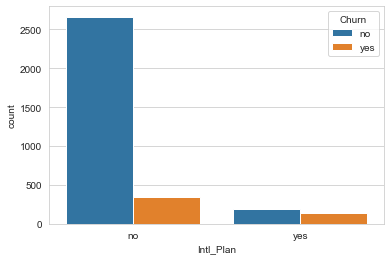

In [136]:
sns.countplot(data=churn_data, x='Intl_Plan', hue='Churn')
plt.show()

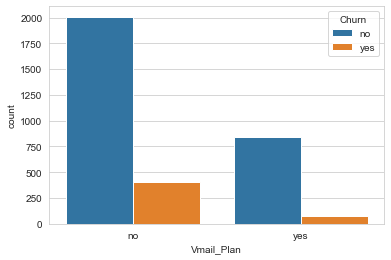

In [137]:
sns.countplot(data=churn_data, x='Vmail_Plan', hue='Churn', order=['no', 'yes'])
plt.show()

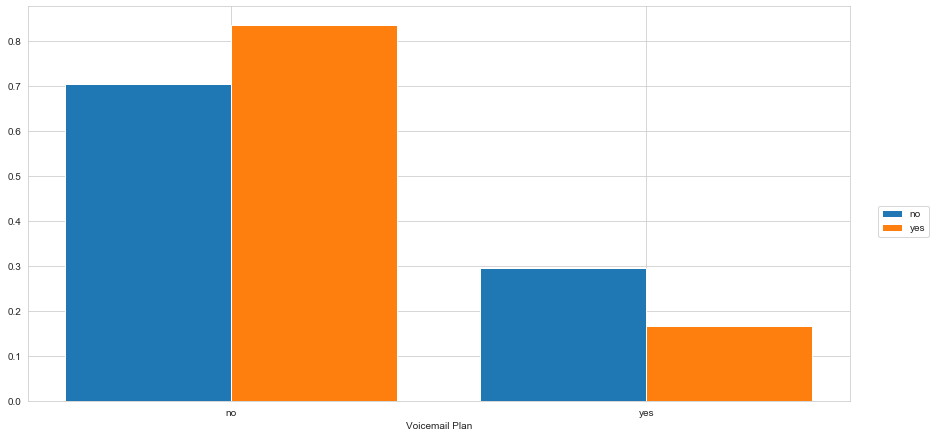

In [138]:
g = dxp.aggplot(data=churn_data, agg='Vmail_Plan', hue='Churn', normalize='Churn')
g.set(xlabel='Voicemail Plan')
plt.show()

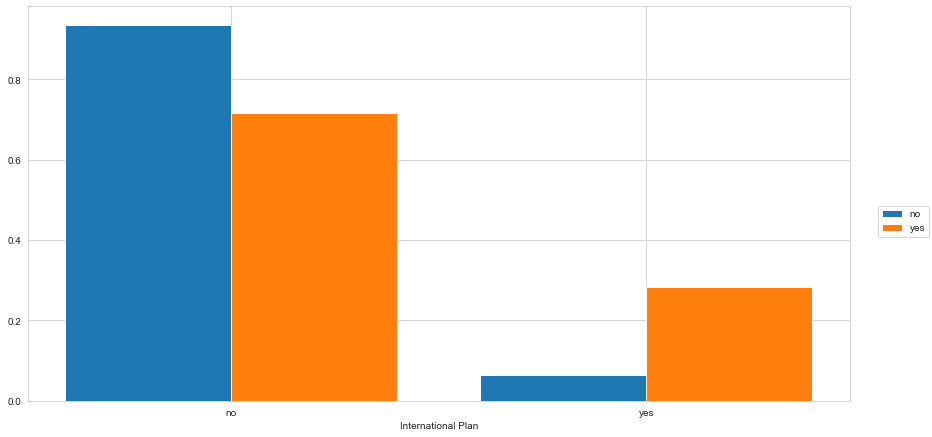

In [139]:
g = dxp.aggplot(data=churn_data, agg='Intl_Plan', hue='Churn', normalize='Churn')
g.set(xlabel='International Plan')
plt.show()

### LOOP THROUGH CONTINUOUS FEATURES BROKEN OUT BY CHURN FLAG

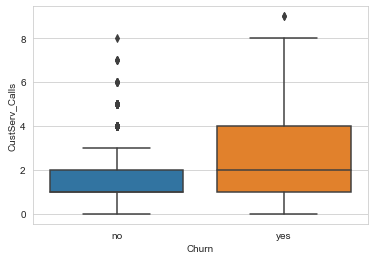

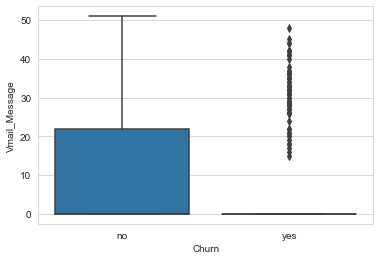

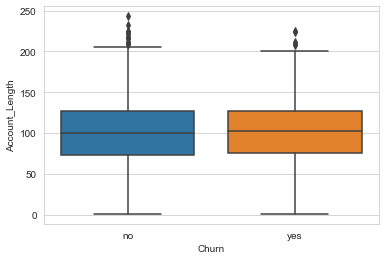

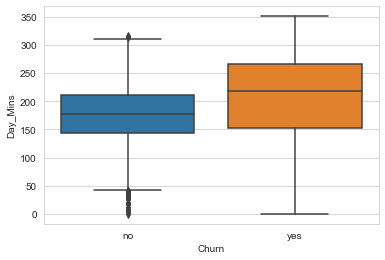

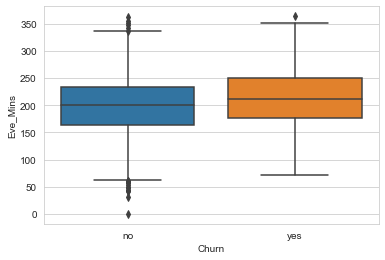

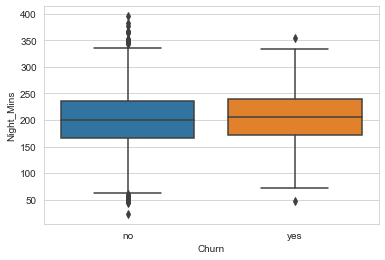

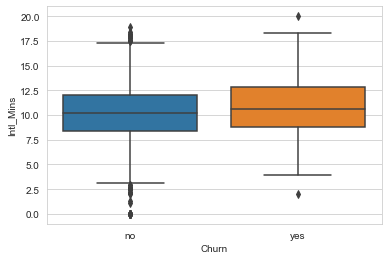

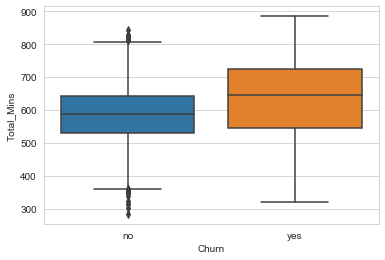

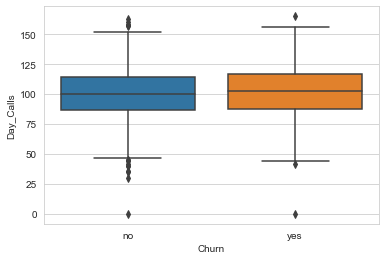

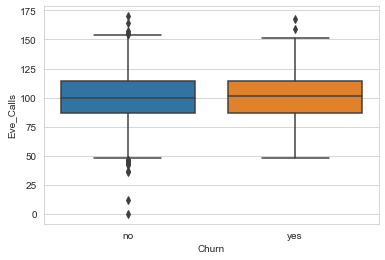

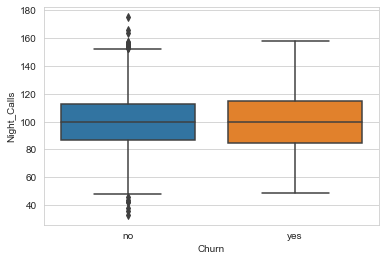

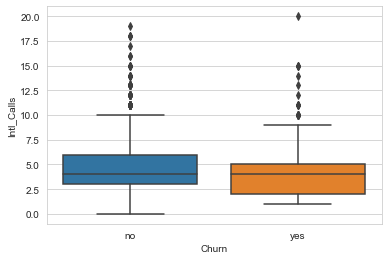

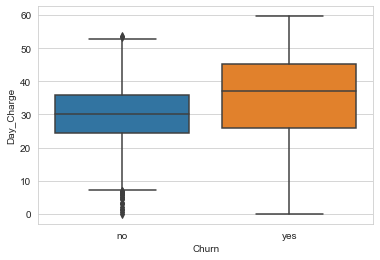

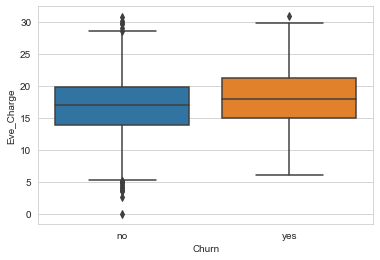

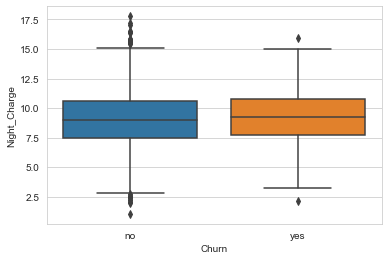

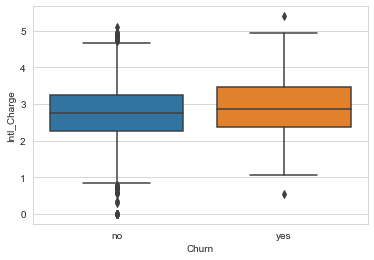

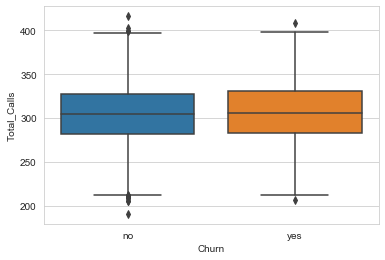

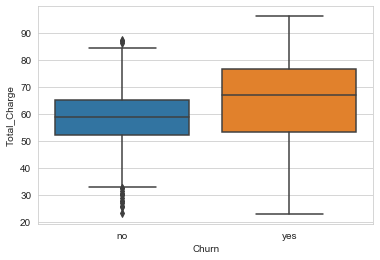

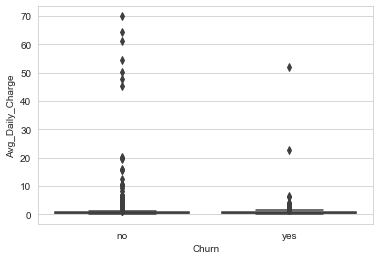

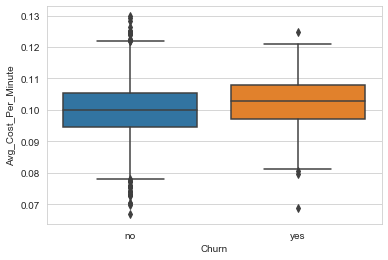

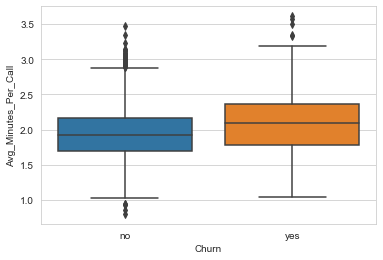

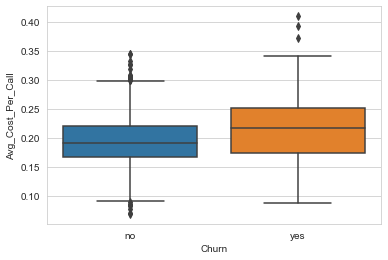

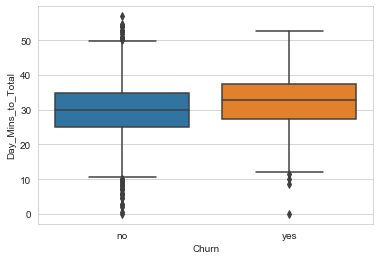

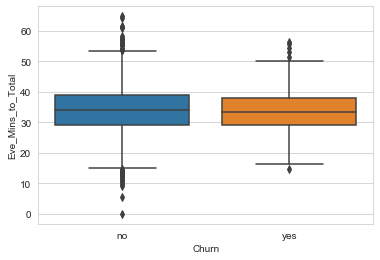

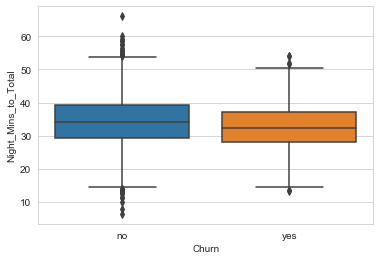

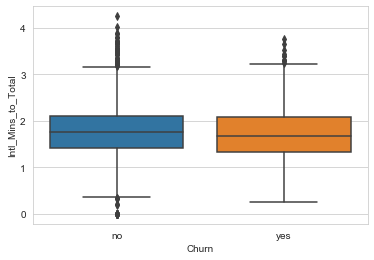

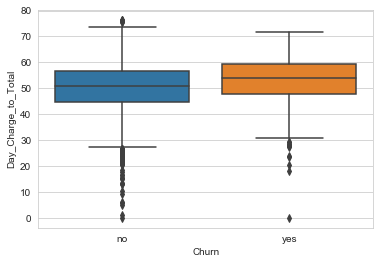

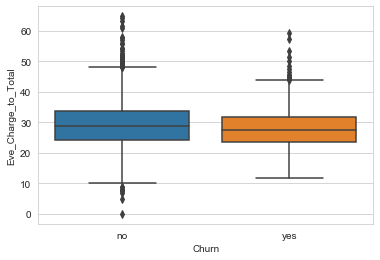

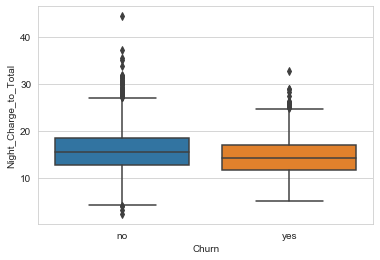

In [140]:
for i in range(1,30):   
    sns.boxplot(data=quant, y=quant.columns[i], x='Churn')
    plt.show()

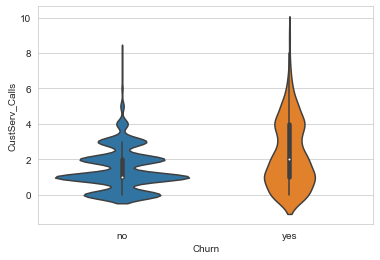

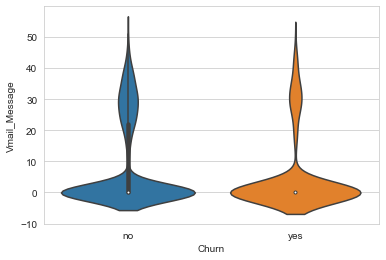

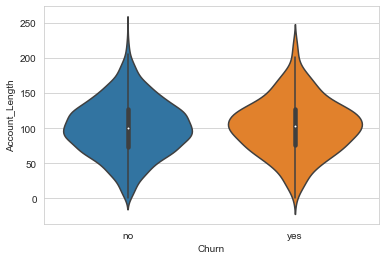

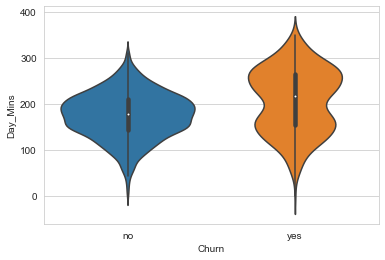

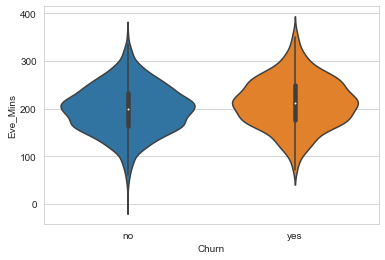

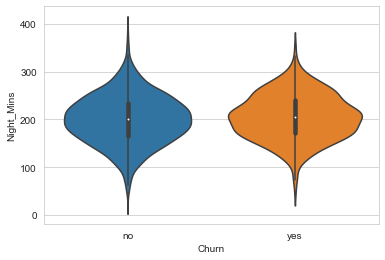

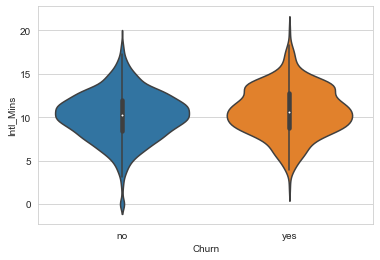

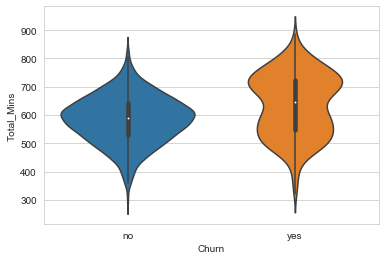

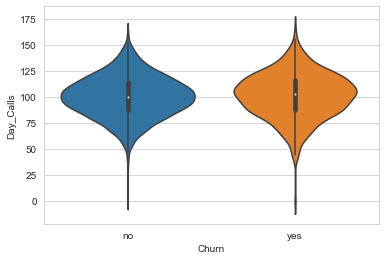

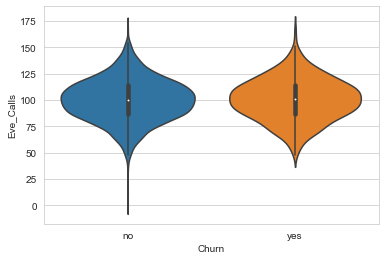

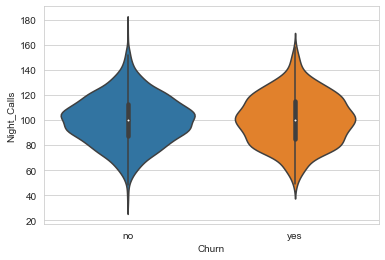

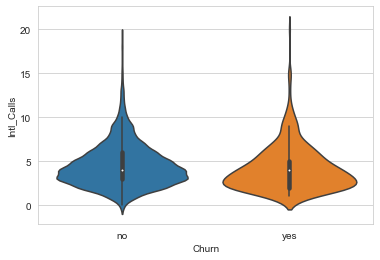

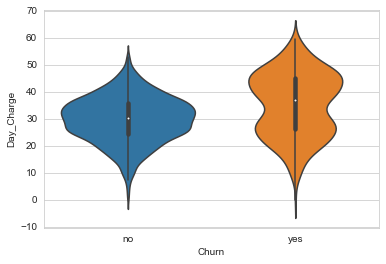

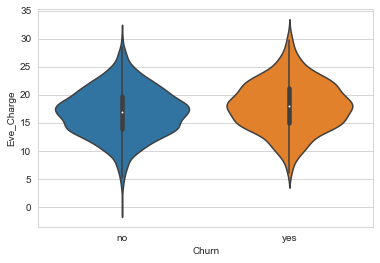

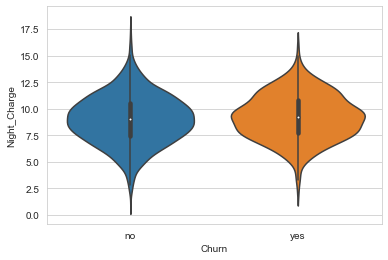

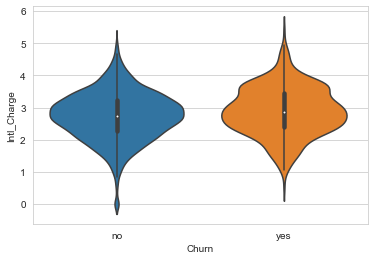

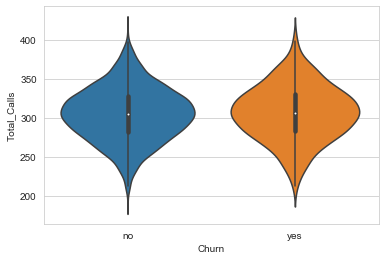

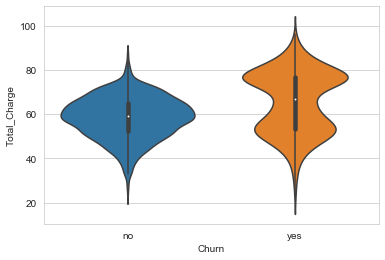

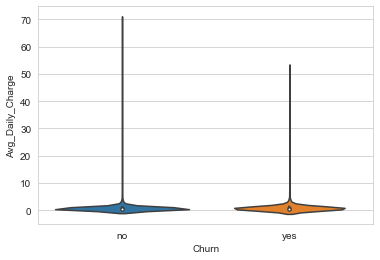

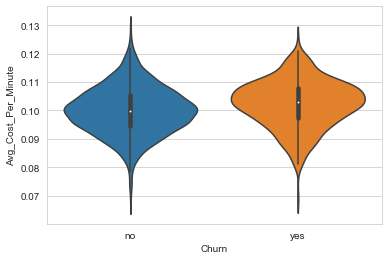

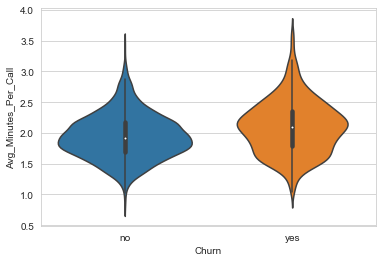

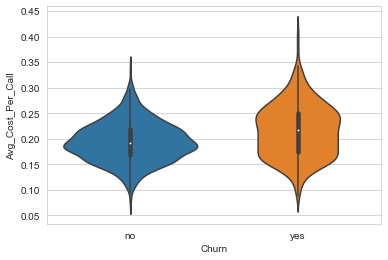

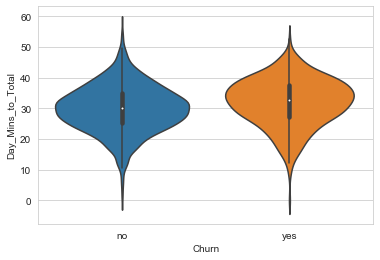

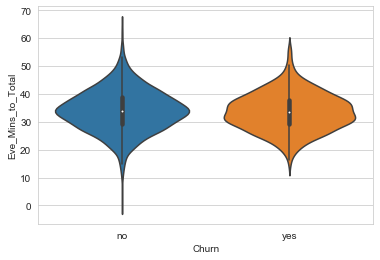

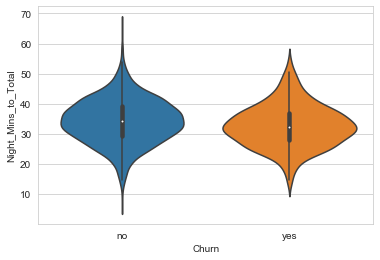

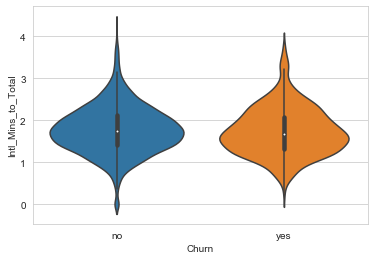

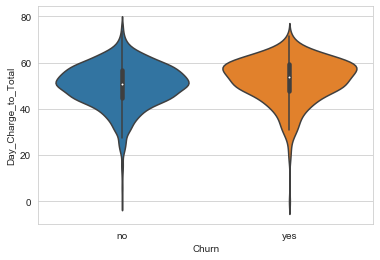

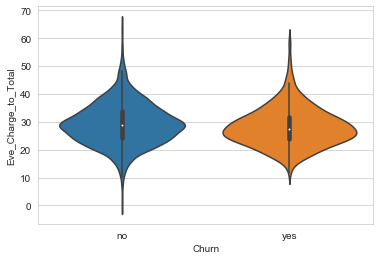

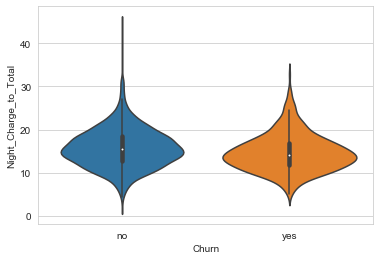

In [141]:
for i in range(1,30):   
    sns.violinplot(data=quant, y=quant.columns[i], x='Churn', inner='box')
    plt.show()

### EXPLORE SUBGROUPS IN CHURNER POPULATION

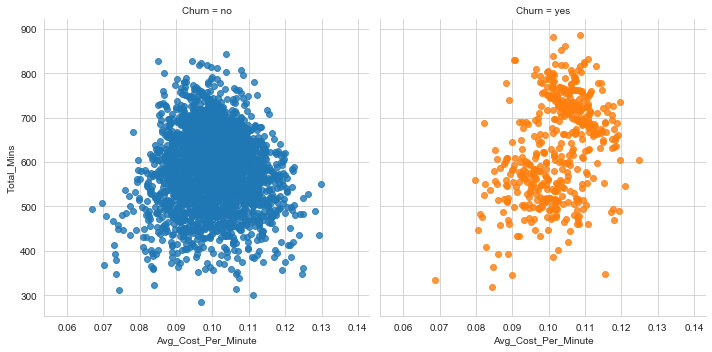

In [142]:
sns.lmplot(data=churn_data, x='Avg_Cost_Per_Minute', y='Total_Mins', hue='Churn', col='Churn', fit_reg=False)

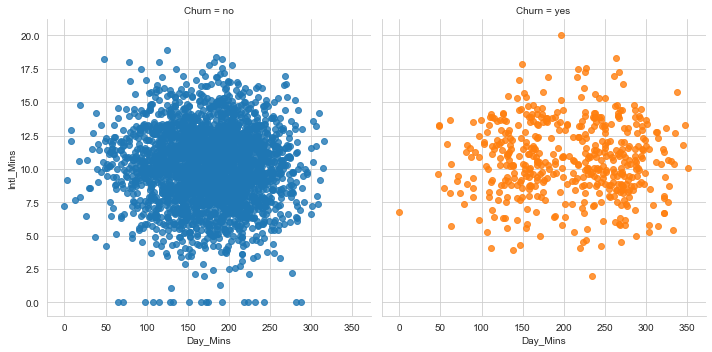

In [144]:
sns.set_style('whitegrid')
sns.lmplot(data=churn_data, x='Day_Mins', y='Intl_Mins', hue='Churn', col='Churn', fit_reg=False)

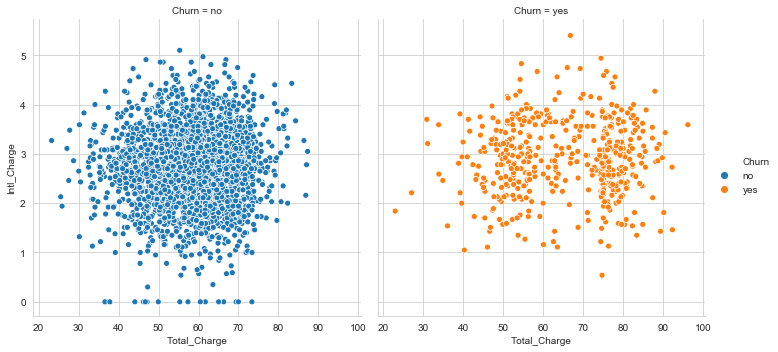

In [145]:
sns.set_style('whitegrid')
sns.relplot(data=churn_data, x='Total_Charge', y='Intl_Charge', hue='Churn', col='Churn', kind='scatter')

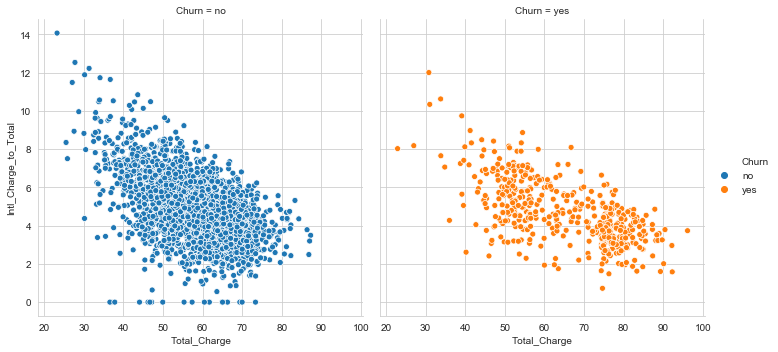

In [146]:
sns.set_style('whitegrid')
sns.relplot(data=churn_data, x='Total_Charge', y='Intl_Charge_to_Total', hue='Churn', col='Churn', kind='scatter')

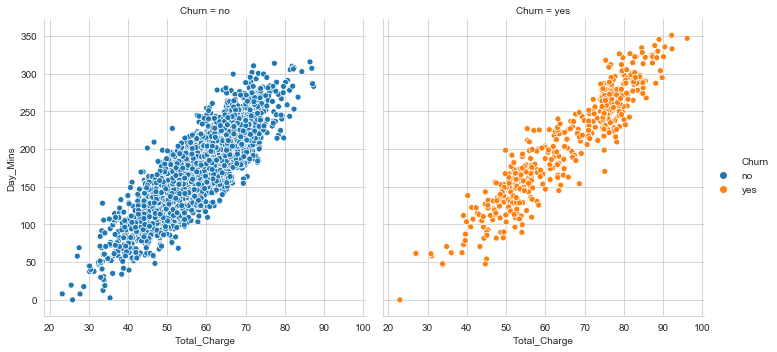

In [147]:
sns.set_style('whitegrid')
sns.relplot(data=churn_data, x='Total_Charge', y='Day_Mins', hue='Churn', col='Churn', kind='scatter')

### SECOND ROUND EDA

In [149]:
# create customer care buckets based on call center data

def cs_bucket(row):
    if row['CustServ_Calls'] == 0:
        return 'none'
    elif row['CustServ_Calls'] == 1:
        return 'low'
    elif row['CustServ_Calls'] == 2:
        return 'high'
    else:
        return 'critical'

churn_data2 = churn_data.assign(Care_Status=churn_data.apply(cs_bucket, axis=1))

In [150]:
# Create flag for total charges over 70

churn_data2['Total_Charge_Over_70'] = ['yes' if x >= 70 else 'no' for x in churn_data['Total_Charge']]

In [153]:
# Reformat floats

churn_data2 = churn_data2.round(2)

In [155]:
# write new features to csv

churn_data2.to_csv('churn_data_feature_creation.csv')

In [158]:
for i in enumerate(churn_data2.columns):
    print(i)

(0, 'Phone')
(1, 'Area_Code')
(2, 'State')
(3, 'Churn')
(4, 'Intl_Plan')
(5, 'Vmail_Plan')
(6, 'CustServ_Calls')
(7, 'Vmail_Message')
(8, 'Account_Length')
(9, 'Day_Mins')
(10, 'Eve_Mins')
(11, 'Night_Mins')
(12, 'Intl_Mins')
(13, 'Total_Mins')
(14, 'Day_Calls')
(15, 'Eve_Calls')
(16, 'Night_Calls')
(17, 'Intl_Calls')
(18, 'Day_Charge')
(19, 'Eve_Charge')
(20, 'Night_Charge')
(21, 'Intl_Charge')
(22, 'Total_Calls')
(23, 'Total_Charge')
(24, 'Avg_Daily_Charge')
(25, 'Avg_Cost_Per_Minute')
(26, 'Avg_Minutes_Per_Call')
(27, 'Avg_Cost_Per_Call')
(28, 'Day_Mins_to_Total')
(29, 'Eve_Mins_to_Total')
(30, 'Night_Mins_to_Total')
(31, 'Intl_Mins_to_Total')
(32, 'Day_Charge_to_Total')
(33, 'Eve_Charge_to_Total')
(34, 'Night_Charge_to_Total')
(35, 'Intl_Charge_to_Total')
(36, 'Care_Status')
(37, 'Total_Charge_Over_70')


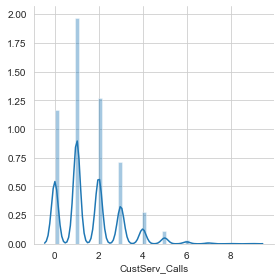

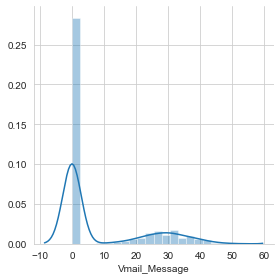

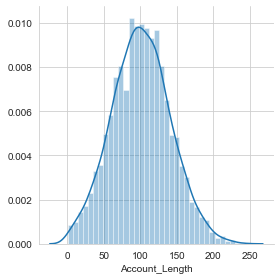

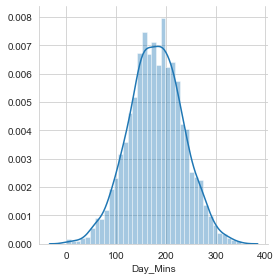

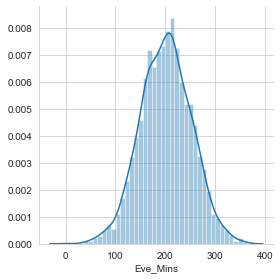

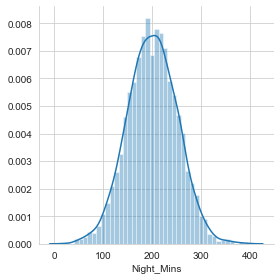

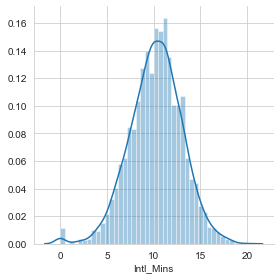

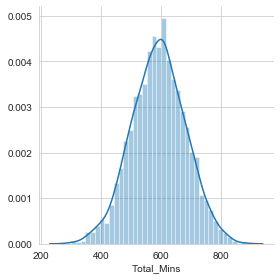

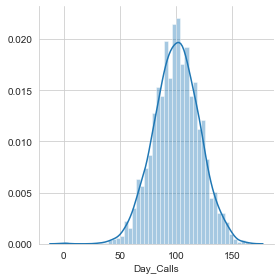

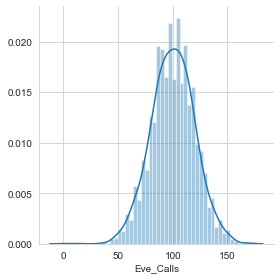

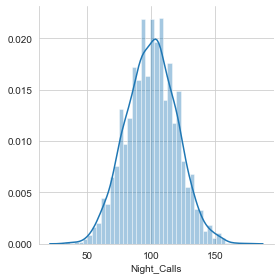

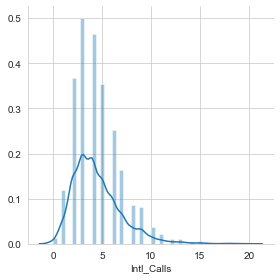

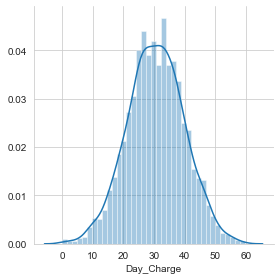

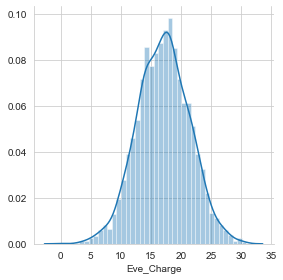

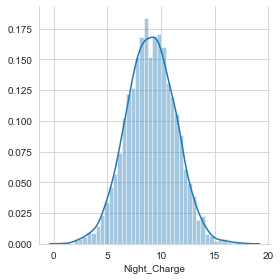

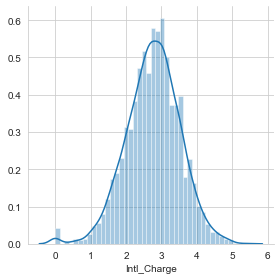

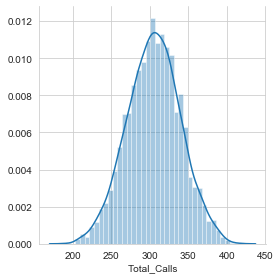

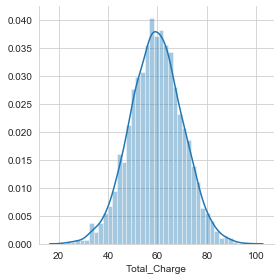

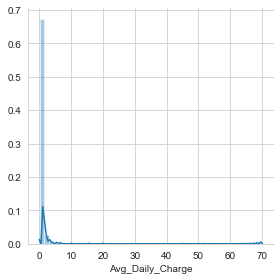

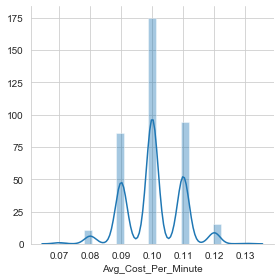

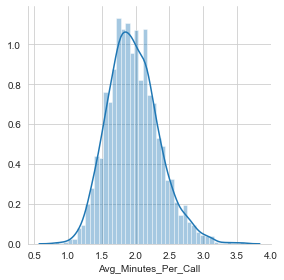

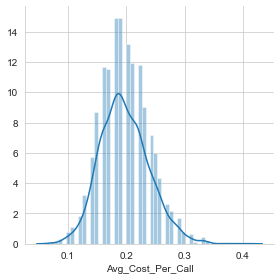

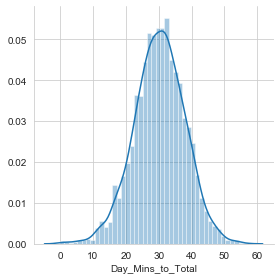

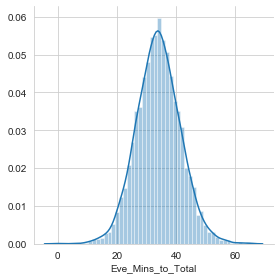

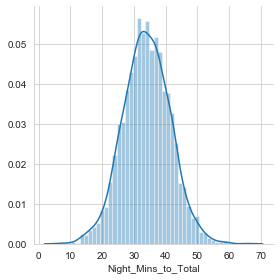

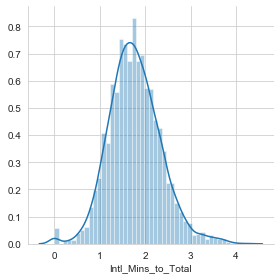

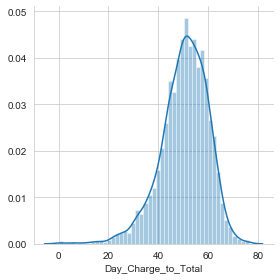

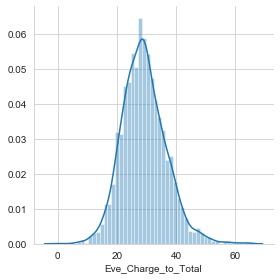

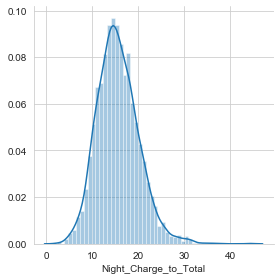

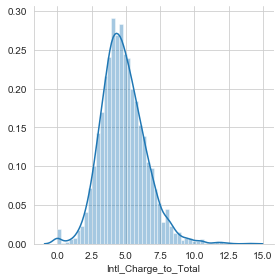

In [159]:
# visualize continuous distributions

for i in range(6, 36):  
    ChurnGrid = sns.FacetGrid(churn_data2, height=4)
    ChurnGrid.map(sns.distplot, churn_data2.columns[i])

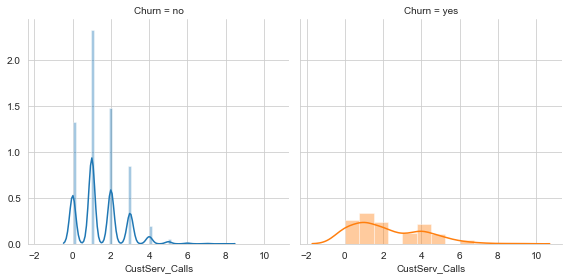

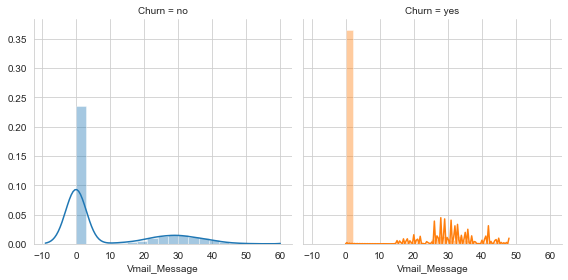

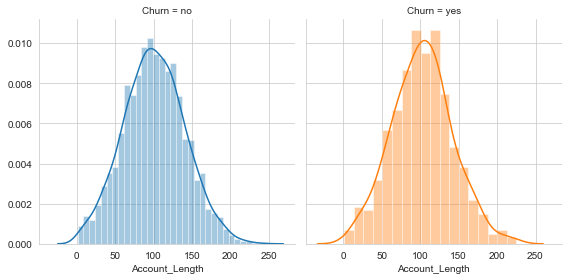

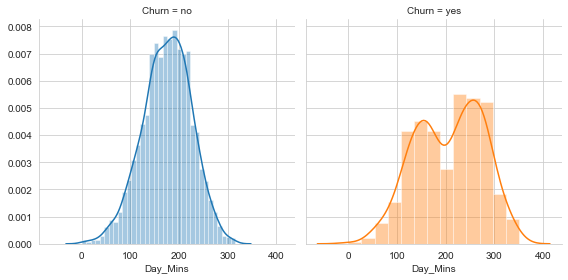

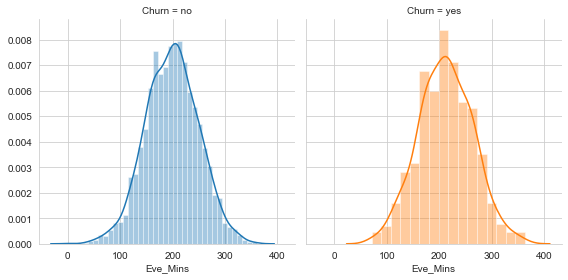

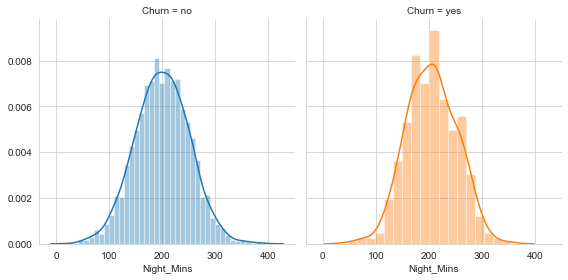

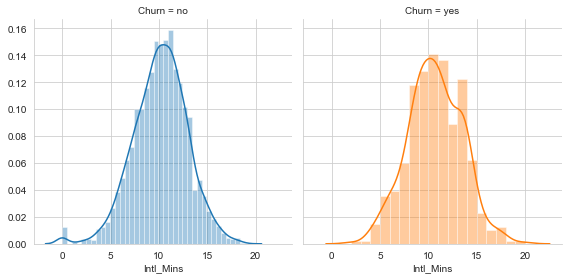

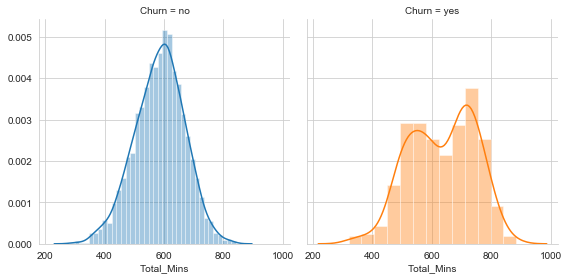

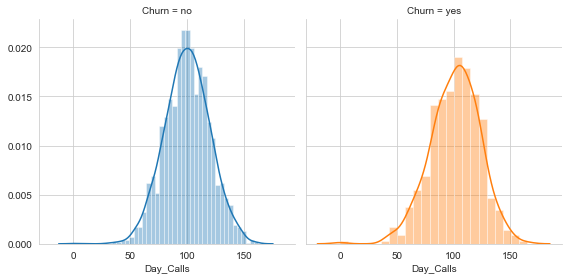

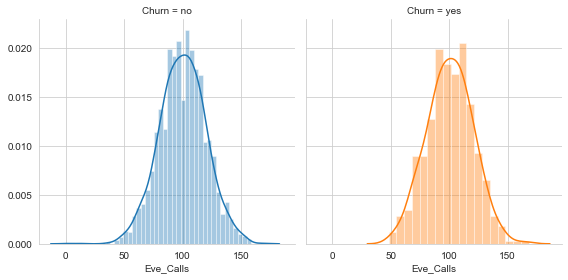

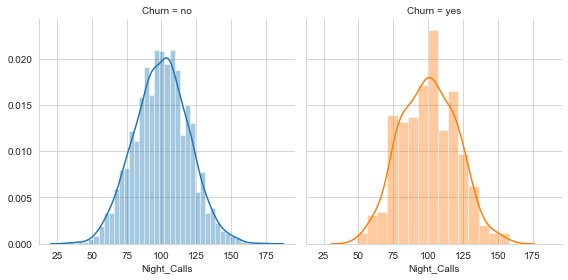

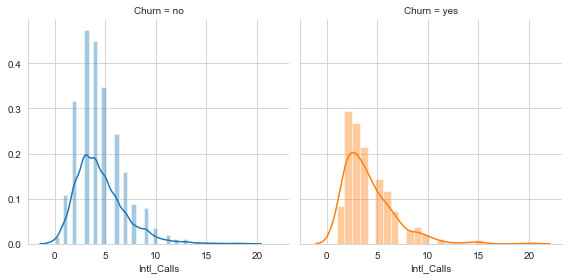

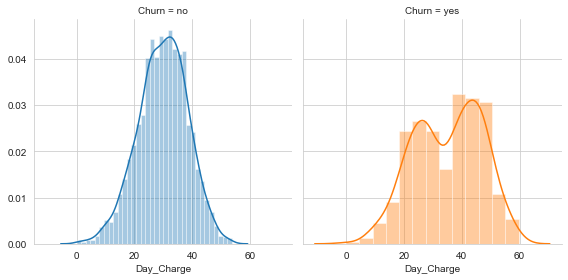

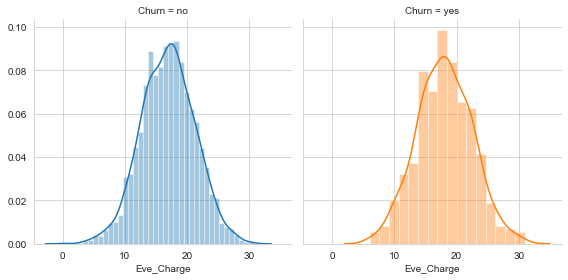

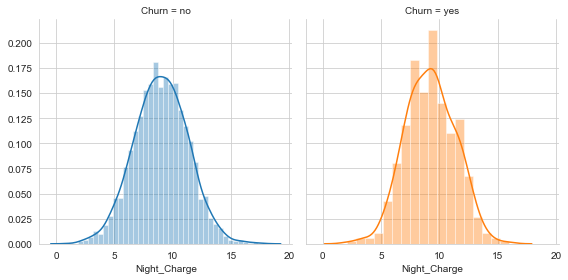

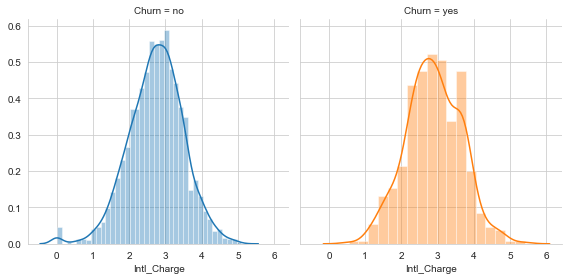

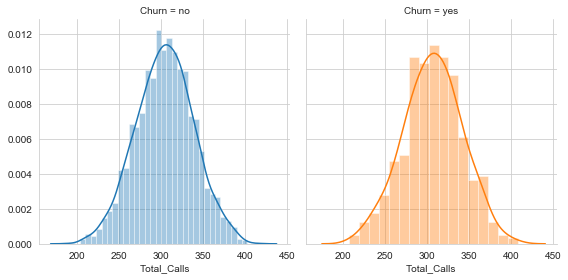

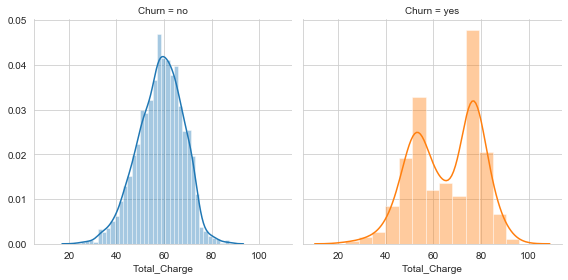

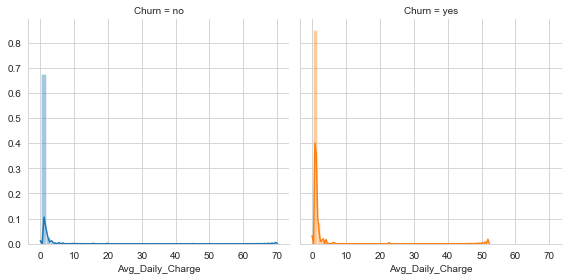

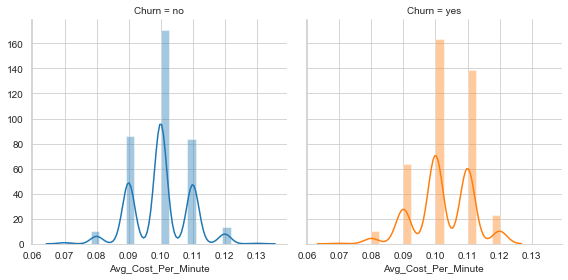

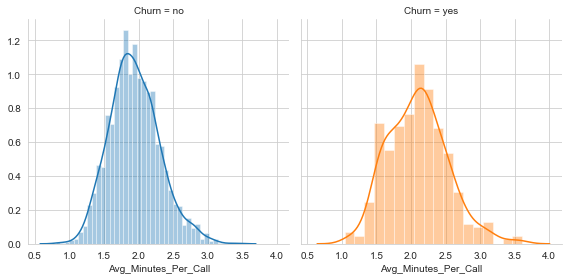

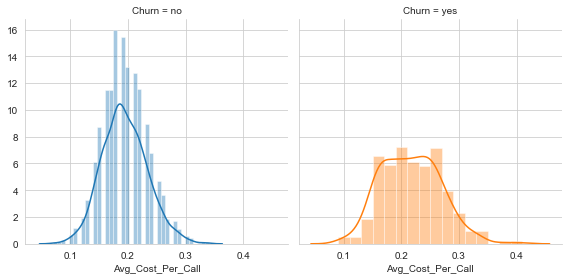

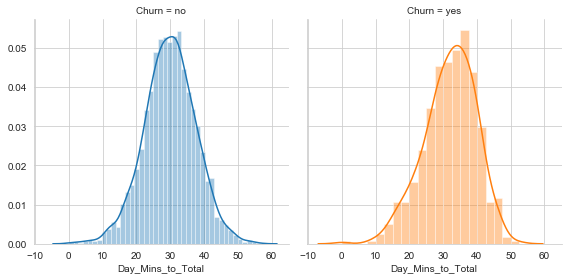

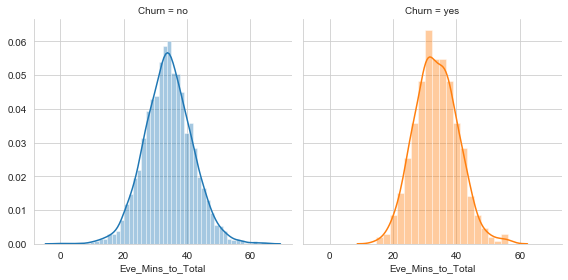

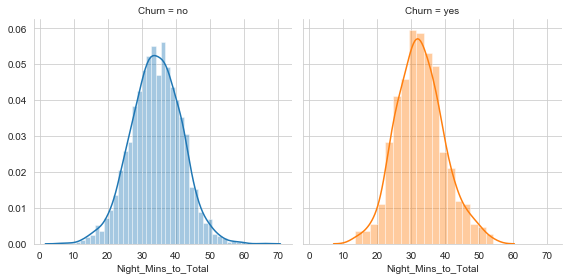

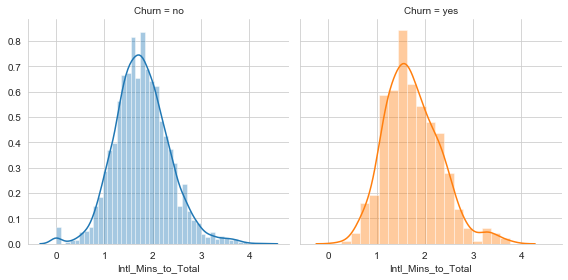

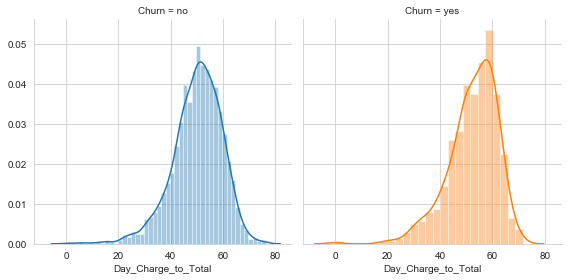

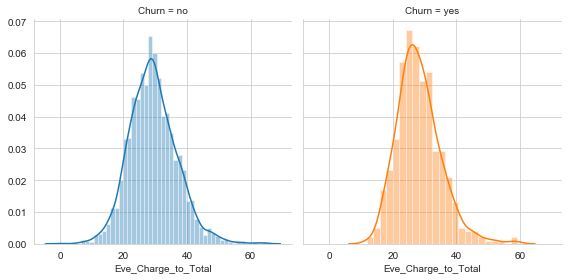

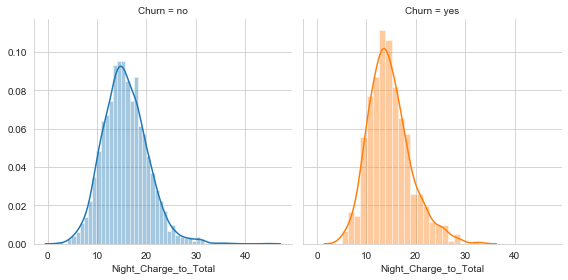

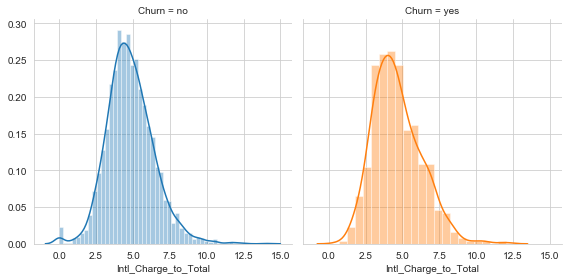

In [160]:
# visualize continuous distributions broken out by churn

for i in range(6, 36):  
    ChurnGrid = sns.FacetGrid(churn_data2, hue="Churn", col='Churn', height=4)
    ChurnGrid.map(sns.distplot, churn_data2.columns[i])

## PREP DATA FOR INITIAL MODEL

In [171]:
churn_data3 = churn_data2.copy()

In [172]:
churn_data3

Phone  Area_Code State Churn Intl_Plan Vmail_Plan  CustServ_Calls  \
0     382-4657        415    KS    no        no        yes               1   
1     371-7191        415    OH    no        no        yes               1   
2     358-1921        415    NJ    no        no         no               0   
3     375-9999        408    OH    no       yes         no               2   
4     330-6626        415    OK    no       yes         no               3   
...        ...        ...   ...   ...       ...        ...             ...   
3328  414-4276        415    AZ    no        no        yes               2   
3329  370-3271        415    WV    no        no         no               3   
3330  328-8230        510    RI    no        no         no               2   
3331  364-6381        510    CT    no       yes         no               2   
3332  400-4344        415    TN    no        no        yes               0   

      Vmail_Message  Account_Length  Day_Mins  Eve_Mins  Night_Mins  \
0                25             128     265.1     197.4       244.7   
1                26             107     161.6     195.5       254.4   
2                 0             137     243.4     121.2       162.6   
3                 0              84     299.4      61.9       196.9   
4                 0              75     166.7     148.3       186.9   
...             ...             ...       ...       ...         ...   
3328             36             192     156.2     215.5       279.1   
3329              0              68     231.1     153.4       191.3   
3330              0              28     180.8     288.8       191.9   
3331              0             184     213.8     159.6       139.2   
3332             25              74     234.4     265.9       241.4   

      Intl_Mins  Total_Mins  Day_Calls  Eve_Calls  Night_Calls  Intl_Calls  \
0          10.0       717.2        110         99           91           3   
1          13.7       625.2        123        103          103           3   
2          12.2       539.4        114        110          104           5   
3           6.6       564.8         71         88           89           7   
4          10.1       512.0        113        122          121           3   
...         ...         ...        ...        ...          ...         ...   
3328        9.9       660.7         77        126           83           6   
3329        9.6       585.4         57         55          123           4   
3330       14.1       675.6        109         58           91           6   
3331        5.0       517.6        105         84          137          10   
3332       13.7       755.4        113         82           77           4   

      Day_Charge  Eve_Charge  Night_Charge  Intl_Charge  Total_Calls  \
0          45.07       16.78         11.01         2.70          303   
1          27.47       16.62         11.45         3.70          332   
2          41.38       10.30          7.32         3.29          333   
3          50.90        5.26          8.86         1.78          255   
4          28.34       12.61          8.41         2.73          359   
...          ...         ...           ...          ...          ...   
3328       26.55       18.32         12.56         2.67          292   
3329       39.29       13.04          8.61         2.59          239   
3330       30.74       24.55          8.64         3.81          264   
3331       36.35       13.57          6.26         1.35          336   
3332       39.85       22.60         10.86         3.70          276   

      Total_Charge  Avg_Daily_Charge  Avg_Cost_Per_Minute  \
0            75.56              0.59                 0.11   
1            59.24              0.55                 0.09   
2            62.29              0.45                 0.12   
3            66.80              0.80                 0.12   
4            52.09              0.69                 0.10   
...            ...               ...               

In [173]:
# recode categorical variables as binary

churn_data3['Churn'] = churn_data3['Churn'].replace({'no':0, 'yes':1})
churn_data3['Intl_Plan'] = churn_data3['Intl_Plan'].replace({'no':0, 'yes':1})
churn_data3['Vmail_Plan'] = churn_data3['Vmail_Plan'].replace({'no':0, 'yes':1})

In [174]:
# join region categories to dataframe

churn_data3 = pd.merge(churn_data3, regions, how='left', on='State')

In [176]:
# Reorder columns and subset dataframe for correlation matrix

cd3_cols = ['Churn', 'Intl_Plan', 'Vmail_Plan',
       'CustServ_Calls', 'Vmail_Message', 'Account_Length', 'Day_Mins',
       'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Total_Mins', 'Day_Calls',
       'Eve_Calls', 'Night_Calls', 'Intl_Calls', 'Day_Charge', 'Eve_Charge',
       'Night_Charge', 'Intl_Charge', 'Total_Calls', 'Total_Charge',
       'Avg_Daily_Charge', 'Avg_Cost_Per_Minute',
       'Avg_Minutes_Per_Call', 'Avg_Cost_Per_Call', 'Day_Mins_to_Total',
       'Eve_Mins_to_Total', 'Night_Mins_to_Total', 'Intl_Mins_to_Total',
       'Day_Charge_to_Total', 'Eve_Charge_to_Total', 'Night_Charge_to_Total',
       'Intl_Charge_to_Total', 'US_Region']

churn_data4 = churn_data3[cd3_cols]

In [177]:
# Convert region columns to dummies

churn_data4 = pd.get_dummies(churn_data4)

In [178]:
# Create correlation matrix to identify multicolinearity

churn_matrix = churn_data4.corr()
churn_matrix = churn_matrix.round(4)
churn_matrix

Churn  Intl_Plan  Vmail_Plan  CustServ_Calls  \
Churn                  1.0000     0.2599     -0.1021          0.2087   
Intl_Plan              0.2599     1.0000      0.0060         -0.0245   
Vmail_Plan            -0.1021     0.0060      1.0000         -0.0178   
CustServ_Calls         0.2087    -0.0245     -0.0178          1.0000   
Vmail_Message         -0.0897     0.0087      0.9569         -0.0133   
Account_Length         0.0165     0.0247      0.0029         -0.0038   
Day_Mins               0.2052     0.0494     -0.0017         -0.0134   
Eve_Mins               0.0928     0.0191      0.0215         -0.0130   
Night_Mins             0.0355    -0.0289      0.0061         -0.0093   
Intl_Mins              0.0682     0.0459     -0.0013         -0.0096   
Total_Mins             0.1986     0.0259      0.0145         -0.0210   
Day_Calls              0.0185     0.0038     -0.0111         -0.0189   
Eve_Calls              0.0092     0.0061     -0.0064          0.0024   
Night_Calls            0.0061     0.0125      0.0156         -0.0128   
Intl_Calls            -0.0528     0.0174      0.0076         -0.0176   
Day_Charge             0.2052     0.0494     -0.0017         -0.0134   
Eve_Charge             0.0928     0.0191      0.0216         -0.0130   
Night_Charge           0.0355    -0.0289      0.0061         -0.0093   
Intl_Charge            0.0683     0.0458     -0.0013         -0.0097   
Total_Calls            0.0158     0.0140     -0.0008         -0.0182   
Total_Charge           0.2315     0.0484      0.0086         -0.0199   
Avg_Daily_Charge       0.0030    -0.0058      0.0102         -0.0053   
Avg_Cost_Per_Minute    0.0972     0.0634     -0.0035         -0.0145   
Avg_Minutes_Per_Call   0.1446     0.0127      0.0111         -0.0085   
Avg_Cost_Per_Call      0.1814     0.0336      0.0087         -0.0106   
Day_Mins_to_Total      0.0956     0.0422     -0.0077         -0.0066   
Eve_Mins_to_Total     -0.0237     0.0052      0.0149          0.0014   
Night_Mins_to_Total   -0.0742    -0.0510     -0.0063          0.0056   
Intl_Mins_to_Total    -0.0222     0.0232     -0.0091         -0.0000   
Day_Charge_to_Total    0.0864     0.0332     -0.0077         -0.0045   
Eve_Charge_to_Total   -0.0516    -0.0124      0.0133          0.0017   
Night_Charge_to_Total -0.0827    -0.0525     -0.0019          0.0060   
Intl_Charge_to_Total  -0.0400     0.0081     -0.0109          0.0019   
US_Region_Midwest     -0.0294     0.0133      0.0205         -0.0410   
US_Region_Northeast    0.0374     0.0283     -0.0122         -0.0031   
US_Region_Other       -0.0450    -0.0184      0.0075         -0.0014   
US_Region_South       -0.0017    -0.0058     -0.0009          0.0316   
US_Region_West         0.0105    -0.0263     -0.0090          0.0088   

                       Vmail_Message  Account_Length  Day_Mins  Eve_Mins  \
Churn                        -0.0897          0.0165    0.2052    0.0928   
Intl_Plan                     0.0087          0.0247    0.0494    0.0191   
Vmail_Plan                    0.9569          0.0029   -0.0017    0.0215   
CustServ_Calls               -0.0133         -0.0038   -0.0134   -0.0130   
Vmail_Message                 1.0000         -0.0046    0.0008    0.0176   
Account_Length               -0.0046          1.0000    0.0062   -0.0068   
Day_Mins                      0.0008          0.0062    1.0000    0.0070   
Eve_Mins                      0.0176         -0.0068    0.0070    1.0000   
Night_Mins                    0.0077         -0.0090    0.0043   -0.0126   
Intl_Mins                     0.0029          0.0095   -0.0102   -0.0110   
Total_Mins                    0.0148         -0.0048    0.6116    0.5606   
Day_Calls                    -0.0095          0.0385    0.0068   -0.0215   
Eve_Calls                    -0.0059          0.0193    0.0158   -0.0114   
Night_Calls                   0.0071         -0.0132    0.0230    0.0076   
Intl_Calls                    0.0140          0.0207    0.0080    0.0025   

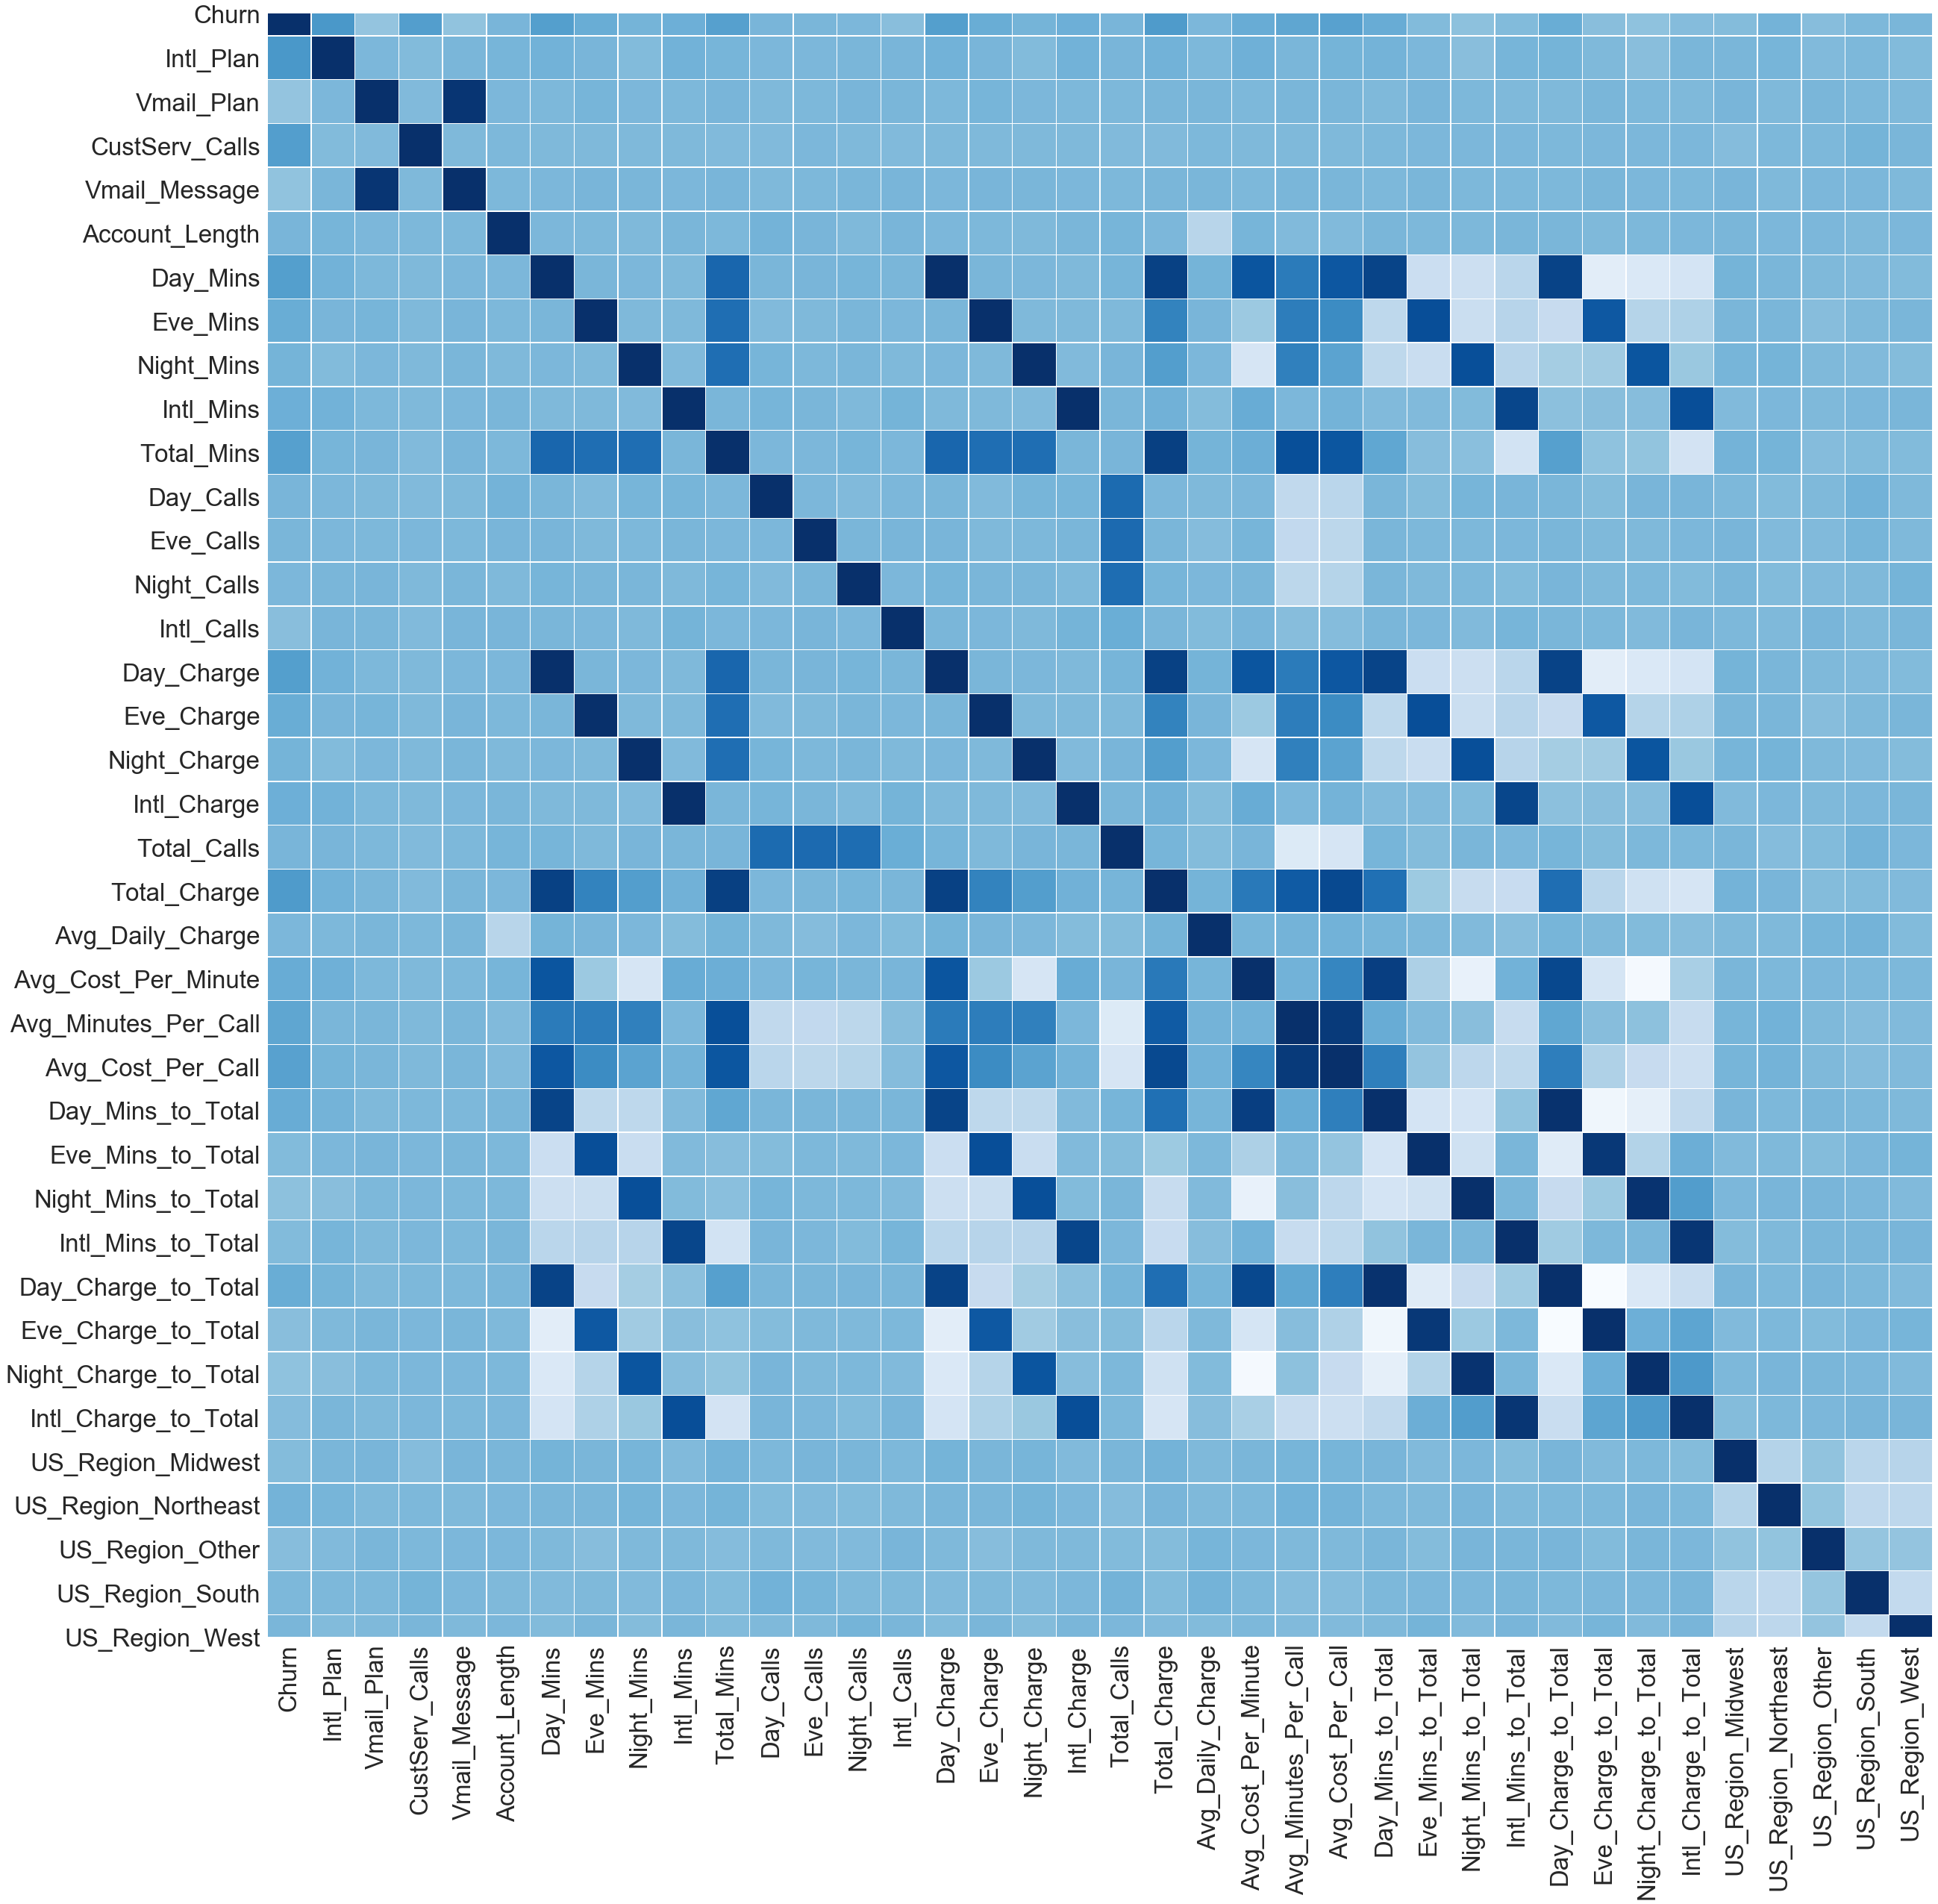

In [179]:
# Plot heatmap of correlation matrix

plt.subplots(figsize=(40, 40))
sns.set(font_scale=3)
sns.heatmap(churn_matrix, cmap='Blues', cbar=False, linewidths=.5)

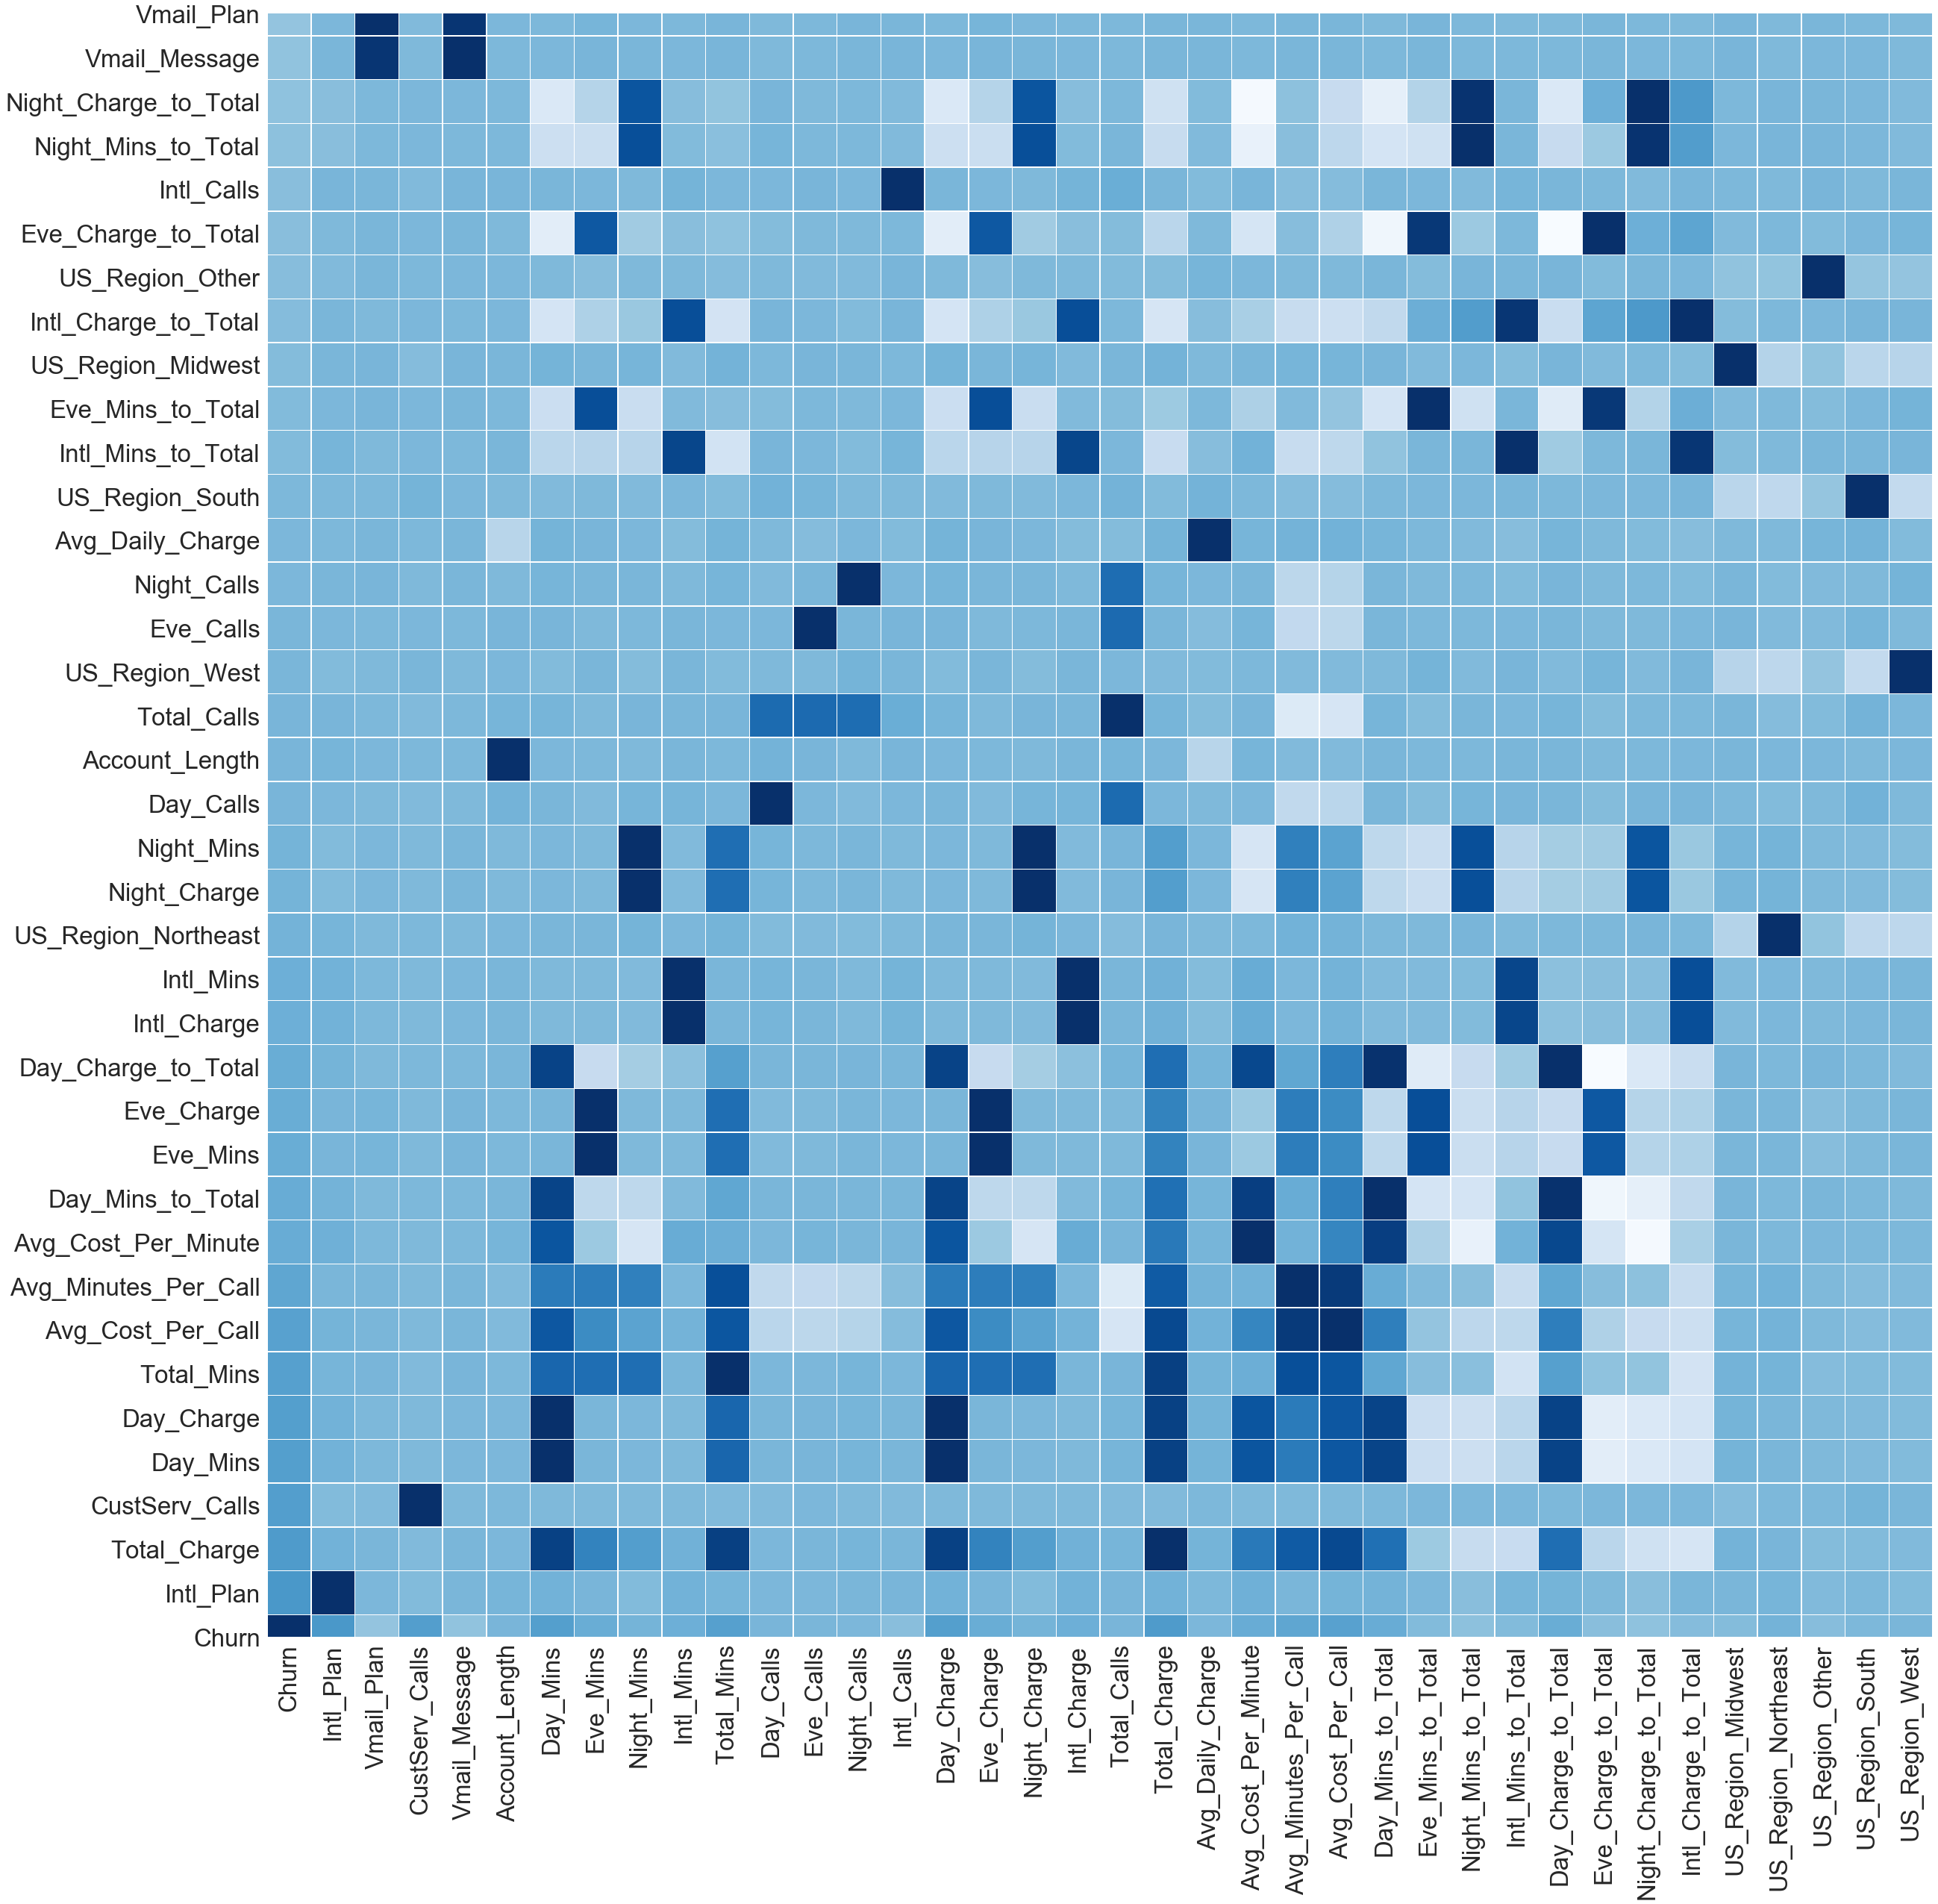

In [180]:
# Sort by churn and replot

churn_matrix = churn_matrix.sort_values('Churn', ascending=True)
plt.subplots(figsize=(40, 40))
sns.set(font_scale=3)
sns.heatmap(churn_matrix, cmap='Blues', cbar=False, linewidths=.5)

In [198]:
# Normalize data for initial model

for i in enumerate(churn_data4.columns):
    print(i)

(0, 'Churn')
(1, 'Intl_Plan')
(2, 'Vmail_Plan')
(3, 'CustServ_Calls')
(4, 'Vmail_Message')
(5, 'Account_Length')
(6, 'Day_Mins')
(7, 'Eve_Mins')
(8, 'Night_Mins')
(9, 'Intl_Mins')
(10, 'Total_Mins')
(11, 'Day_Calls')
(12, 'Eve_Calls')
(13, 'Night_Calls')
(14, 'Intl_Calls')
(15, 'Day_Charge')
(16, 'Eve_Charge')
(17, 'Night_Charge')
(18, 'Intl_Charge')
(19, 'Total_Calls')
(20, 'Total_Charge')
(21, 'Avg_Daily_Charge')
(22, 'Avg_Cost_Per_Minute')
(23, 'Avg_Minutes_Per_Call')
(24, 'Avg_Cost_Per_Call')
(25, 'Day_Mins_to_Total')
(26, 'Eve_Mins_to_Total')
(27, 'Night_Mins_to_Total')
(28, 'Intl_Mins_to_Total')
(29, 'Day_Charge_to_Total')
(30, 'Eve_Charge_to_Total')
(31, 'Night_Charge_to_Total')
(32, 'Intl_Charge_to_Total')
(33, 'US_Region_Midwest')
(34, 'US_Region_Northeast')
(35, 'US_Region_Other')
(36, 'US_Region_South')
(37, 'US_Region_West')


In [199]:
# subset dataframe by continuous variables

cont_columns = churn_data4.iloc[:, 3:-5]

In [200]:
# create list of column names

cont_col_names = cont_columns.columns

In [201]:
from sklearn.preprocessing import StandardScaler

In [202]:
# normalize data

cont_cols_scaled = StandardScaler().fit_transform(cont_columns)
cont_columns_scaled_df = pd.DataFrame(cont_cols_scaled, columns=cont_col_names)

In [203]:
cont_columns_scaled_df.describe()

CustServ_Calls  Vmail_Message  Account_Length      Day_Mins  \
count    3.333000e+03   3.333000e+03    3.333000e+03  3.333000e+03   
mean     3.275708e-16   3.832651e-16    1.713134e-16  7.081711e-16   
std      1.000150e+00   1.000150e+00    1.000150e+00  1.000150e+00   
min     -1.188218e+00  -5.917599e-01   -2.513172e+00 -3.301096e+00   
25%     -4.279320e-01  -5.917599e-01   -6.797448e-01 -6.624241e-01   
50%     -4.279320e-01  -5.917599e-01   -1.627644e-03 -6.887677e-03   
75%      3.323545e-01   8.695542e-01    6.513740e-01  6.725198e-01   
max      5.654360e+00   3.134591e+00    3.564766e+00  3.140422e+00   

           Eve_Mins    Night_Mins     Intl_Mins    Total_Mins     Day_Calls  \
count  3.333000e+03  3.333000e+03  3.333000e+03  3.333000e+03  3.333000e+03   
mean  -1.067919e-16  6.602046e-17 -3.274375e-16  1.661504e-16 -2.150828e-16   
std    1.000150e+00  1.000150e+00  1.000150e+00  1.000150e+00  1.000150e+00   
min   -3.963622e+00 -3.513648e+00 -3.667413e+00 -3.419637e+00 -5.005247e+00   
25%   -6.780300e-01 -6.698545e-01 -6.223690e-01 -6.711615e-01 -6.695701e-01   
50%    8.276141e-03  6.485803e-03  2.246393e-02  1.929296e-02  2.812491e-02   
75%    6.768330e-01  6.808485e-01  6.672969e-01  6.730566e-01  6.759846e-01   
max    3.209066e+00  3.839081e+00  3.497397e+00  3.259203e+00  3.217588e+00   

          Eve_Calls   Night_Calls    Intl_Calls    Day_Charge    Eve_Charge  \
count  3.333000e+03  3.333000e+03  3.333000e+03  3.333000e+03  3.333000e+03   
mean   3.527531e-16 -7.041739e-17 -1.264615e-16 -3.226409e-16  1.266447e-16   
std    1.000150e+00  1.000150e+00  1.000150e+00  1.000150e+00  1.000150e+00   
min   -5.025911e+00 -3.429870e+00 -1.820289e+00 -3.301162e+00 -3.963679e+00   
25%   -6.583610e-01 -6.699340e-01 -6.011951e-01 -6.623760e-01 -6.783123e-01   
50%   -5.738630e-03 -5.505089e-03 -1.948306e-01 -6.730063e-03  8.459274e-03   
75%    6.970854e-01  6.589239e-01  6.178983e-01  6.726790e-01  6.766695e-01   
max    3.508382e+00  3.827739e+00  6.307001e+00  3.140803e+00  3.207980e+00   

       Night_Charge   Intl_Charge   Total_Calls  Total_Charge  \
count  3.333000e+03  3.333000e+03  3.333000e+03  3.333000e+03   
mean  -3.134473e-17  2.785384e-16  6.449820e-16 -1.731455e-16   
std    1.000150e+00  1.000150e+00  1.000150e+00  1.000150e+00   
min   -3.515366e+00 -3.668210e+00 -3.313798e+00 -3.477845e+00   
25%   -6.676792e-01 -6.164341e-01 -6.717509e-01 -6.732660e-01   
50%    4.691242e-03  2.045823e-02 -3.980888e-03  1.928067e-03   
75%    6.814562e-01  6.706192e-01  6.637891e-01  6.695036e-01   
max    3.836763e+00  3.496829e+00  3.218735e+00  3.495033e+00   

       Avg_Daily_Charge  Avg_Cost_Per_Minute  Avg_Minutes_Per_Call  \
count      3.333000e+03         3.333000e+03          3.333000e+03   
mean      -1.486668e-17        -1.306835e-16          3.733387e-16   
std        1.000150e+00         1.000150e+00          1.000150e+00   
min       -2.632404e-01        -3.420799e+00         -3.090424e+00   
25%       -1.641597e-01        -1.169313e+00         -6.759069e-01   
50%       -1.163276e-01        -4.357060e-02         -6.564428e-02   
75%       -3.774636e-02         1.082172e+00          6.242178e-01   
max        2.358105e+01         3.333658e+00          4.365393e+00   

       Avg_Cost_Per_Call  Day_Mins_to_Total  Eve_Mins_to_Total  \
count       3.333000e+03       3.333000e+03       3.333000e+03   
mean       -3.440925e-16       2.342194e-16      -2.296310e-16   
std         1.000150e+00       1.000150e+00       1.000150e+00   
min        -3.039910e+00      -3.925249e+00      -4.595386e+00   
25%        -6.527036e-01      -6.429628e-01      -6.513861e-01   
50%        -1.752623e-01       1.583335e-02      -1.499559e-02   
75%         5.408995e-01       6.707313e-01       6.389598e-01   
max         5.076591e+00       3.469640e+00       4.157348e+00   

       Night_Mins_to_Total  Intl_Mins_to_Total  Day_Charge_to_Total  \
count         3.333000e+03        3.333000e+03         3.333000e+03  

In [231]:
add_cols = ['Churn', 'Intl_Plan', 'Vmail_Plan', 'CustServ_Calls', 'US_Region_Midwest', 'US_Region_Northeast', 'US_Region_Other', 'US_Region_South', 'US_Region_West']


In [232]:
# add back non-continuous features

for i in add_cols:
    cont_columns_scaled_df[i] = churn_data4[i]

In [206]:
# Calculate variance inflation factor for model selection

from statsmodels.stats.outliers_influence import variance_inflation_factor

X1 = cont_columns_scaled_df

vif = pd.DataFrame()
vif["variables"] = X1.columns
vif["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning:

divide by zero encountered in double_scalars



In [207]:
vif = vif.sort_values('VIF', ascending=False)

In [208]:
vif

variables           VIF
14           Night_Charge           inf
9               Eve_Calls           inf
17           Total_Charge           inf
16            Total_Calls           inf
15            Intl_Charge           inf
13             Eve_Charge           inf
12             Day_Charge           inf
11             Intl_Calls           inf
10            Night_Calls           inf
8               Day_Calls           inf
7              Total_Mins           inf
6               Intl_Mins           inf
5              Night_Mins           inf
4                Eve_Mins           inf
3                Day_Mins           inf
26    Day_Charge_to_Total  2.688046e+06
22      Day_Mins_to_Total  1.785774e+06
27    Eve_Charge_to_Total  1.654053e+06
23      Eve_Mins_to_Total  1.650283e+06
24    Night_Mins_to_Total  1.645068e+06
28  Night_Charge_to_Total  6.054541e+05
29   Intl_Charge_to_Total  7.688634e+04
25     Intl_Mins_to_Total  9.755024e+03
20   Avg_Minutes_Per_Call  1.796973e+02
21      Avg_Cost_Per_Call  1.494342e+02
32             Vmail_Plan  1.197446e+01
1           Vmail_Message  1.194196e+01
19    Avg_Cost_Per_Minute  9.711341e+00
36        US_Region_South  2.762753e+00
37         US_Region_West  2.635029e+00
34    US_Region_Northeast  2.463302e+00
33      US_Region_Midwest  2.225892e+00
30                  Churn  1.311521e+00
35        US_Region_Other  1.208903e+00
18       Avg_Daily_Charge  1.107981e+00
2          Account_Length  1.104953e+00
31              Intl_Plan  1.093855e+00
0          CustServ_Calls  1.067691e+00

In [209]:
vif = vif.iloc[16:, :]

In [210]:
vif = vif.round(2)

In [211]:
vif_cols = vif['variables']

In [212]:
vif_cols = list(vif_cols)

In [213]:
vif_cols = [
 'US_Region_South',
 'US_Region_West',
 'US_Region_Northeast',
 'US_Region_Midwest',
 'US_Region_Other',
 'Avg_Daily_Charge',
 'Account_Length',
 'Intl_Plan',
 'CustServ_Calls']

In [214]:
cont_columns_scaled_df2 = cont_columns_scaled_df[vif_cols]

In [217]:
# prune features to remove high VIF scores

from statsmodels.stats.outliers_influence import variance_inflation_factor

X2 = cont_columns_scaled_df2

vif2 = pd.DataFrame()
vif2["variables"] = X2.columns
vif2["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

In [218]:
vif2 = vif2.sort_values('VIF', ascending=False)
vif2 = vif2.round(2)
vif2

variables   VIF
0      US_Region_South  1.46
1       US_Region_West  1.40
2  US_Region_Northeast  1.36
3    US_Region_Midwest  1.27
5     Avg_Daily_Charge  1.10
6       Account_Length  1.10
4      US_Region_Other  1.05
7            Intl_Plan  1.00
8       CustServ_Calls  1.00

### COST BENEFIT ANALYSIS OF ACQUISITION VS RETENTION STRATEGIES

In [269]:
cv_df = churn_data2.groupby('Churn')[['Account_Length', 'Avg_Daily_Charge']].agg(np.mean)
cv_df.reset_index()
cv_df['Avg_Cust_Value'] = cv_df['Account_Length']*cv_df['Avg_Daily_Charge']
cv_df

Account_Length  Avg_Daily_Charge  Avg_Cust_Value
Churn                                                  
no         100.793684          0.926818       93.417355
yes        102.664596          0.952091       97.746048

In [270]:
cv_df_stats = cv_df.T
cv_df_stats['Lift_Index'] = cv_df_stats['yes']/cv_df_stats['no']
regions = regions.rename(columns={'X_index': 'State', 'X_0': 'US_Region'})
cv_df_stats = cv_df_stats.rename(columns={'Churn':'Metric', 'no':'Retained', 'yes':'Churned'})
cv_df_stats

Churn               Retained     Churned  Lift_Index
Account_Length    100.793684  102.664596    1.018562
Avg_Daily_Charge    0.926818    0.952091    1.027269
Avg_Cust_Value     93.417355   97.746048    1.046337

In [271]:
cv_df_stats['PCT_Increase'] = (cv_df_stats['Churned'] - cv_df_stats['Retained'])/cv_df_stats['Retained']
cv_df_stats = cv_df_stats.round(2)
cv_df_stats

Churn             Retained  Churned  Lift_Index  PCT_Increase
Account_Length      100.79   102.66        1.02          0.02
Avg_Daily_Charge      0.93     0.95        1.03          0.03
Avg_Cust_Value       93.42    97.75        1.05          0.05

In [272]:
pct_churn_profit = churn_data2.groupby('Churn')['Total_Charge'].agg([len, sum])
pct_churn_profit = pct_churn_profit.rename(columns={'len':'Count', 'sum':'Total_Revenue'})
pct_churn_profit

Count  Total_Revenue
Churn                       
no     2850.0      166579.10
yes     483.0       31566.93

In [273]:
pct_churn_profit = pct_churn_profit.T
pct_churn_profit = pd.DataFrame(pct_churn_profit)
pct_churn_profit['Total'] = pct_churn_profit.no + pct_churn_profit.yes

In [274]:
pct_churn_profit = pct_churn_profit.reset_index(drop=True)

In [275]:
pct_churn_profit = pct_churn_profit.rename(columns={'no':'Retained', 'yes':'Churned'}, index={0:'Count', 1:'Revenue'})

In [276]:
pct_churn_profit['Retained_PCT_Of_Total'] = (pct_churn_profit['Retained']/pct_churn_profit['Total'])*100
pct_churn_profit['Churned_PCT_Of_Total'] = (1-(pct_churn_profit['Retained']/pct_churn_profit['Total']))*100
pct_churn_profit

Churn    Retained   Churned      Total  Retained_PCT_Of_Total  \
Count      2850.0    483.00    3333.00              85.508551   
Revenue  166579.1  31566.93  198146.03              84.068856   

Churn    Churned_PCT_Of_Total  
Count               14.491449  
Revenue             15.931144

In [277]:
x = 166579.1/2850.0
y = 31566.93/483.00
b = y/x
z = (y-x)/x

print('retained avg rev: ', x)
print('churned avg rev: ', y)
print('for every retained dollar spent: ', b)
print('incremental rev lost per churn customer: ', z)

retained avg rev:  58.448807017543864
churned avg rev:  65.35596273291925
for every retained dollar spent:  1.1181744515897845
incremental rev lost per churn customer:  0.11817445158978442


In [278]:
profit_calcs = pct_churn_profit.iloc[:, -2:]

In [279]:
profit_calcs = profit_calcs.T

In [280]:
profit_calcs = pd.DataFrame(profit_calcs).reset_index()

In [281]:
profit_calcs['Index'] = profit_calcs['Revenue']/profit_calcs['Count']

In [282]:
profit_calcs = profit_calcs.round(2)
profit_calcs

Churn  Count  Revenue  Index
0  Retained_PCT_Of_Total  85.51    84.07   0.98
1   Churned_PCT_Of_Total  14.49    15.93   1.10

In [283]:

rates = np.arange(0,1,.05)

ir = 1.10
customers = 3333
revenue = 198146.03

churned_l = []
churn_pct_revenue_l = []
churn_revenue_l = []
avg_rev_per_churn_customer_l = []
retained_revenue_l = []
retained_customers_l = []
avg_rev_per_retained_customer_l = []
break_even_acquisitions_l = []
break_even_acquisition_rate_l = []
break_even_incremental_acquisition_rate_l = []

for churn_rate in rates: 
    churned = churn_rate*customers
    churned_l.append(churned)
    
    churn_pct_revenue = churn_rate*ir
    churn_pct_revenue_l.append(churn_pct_revenue)
    
    churn_revenue = churn_pct_revenue*revenue
    churn_revenue_l.append(churn_revenue)
    
    avg_rev_per_churn_customer = churn_revenue/churned
    avg_rev_per_churn_customer_l.append(avg_rev_per_churn_customer)
    
    retained_revenue = revenue - churn_revenue
    retained_revenue_l.append(retained_revenue)
    
    retained_customers = customers*(1-churn_rate)
    retained_customers_l.append(retained_customers)
    
    avg_rev_per_retained_customer = retained_revenue/retained_customers
    avg_rev_per_retained_customer_l.append(avg_rev_per_retained_customer)
    
    break_even_acquisitions = churn_revenue/avg_rev_per_retained_customer
    break_even_acquisitions_l.append(break_even_acquisitions)
    
    break_even_acquisition_rate = break_even_acquisitions/customers
    break_even_acquisition_rate_l.append(break_even_acquisition_rate)
    
    break_even_incremental_acquisition_rate = (break_even_acquisition_rate-churn_rate)/churn_rate
    break_even_incremental_acquisition_rate_l.append(break_even_incremental_acquisition_rate)
    

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning:

invalid value encountered in double_scalars

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning:

invalid value encountered in double_scalars



In [284]:
rates2 = list(rates)

In [285]:
Elasticity_DF = {
                'Rate': rates2,
                'Churned': churned_l,
                'Churn_PCT_Revenue':churn_pct_revenue_l, 
                'Churn_Revenue' : churn_revenue_l,
                'Avg_Rev_Per_Churn_Customer': avg_rev_per_churn_customer_l,
                'Retained_Revenue': retained_revenue_l,
                'Retained_Customers': retained_customers_l,
                'Avg_Rev_Per_Retained_Customer': avg_rev_per_retained_customer_l,
                'Break_Even_Acquisitions': break_even_acquisitions_l,
                'Break_Even_Acquisition_Rate': break_even_acquisition_rate_l,
                'Break_Even_Incremental_Acquisition_Rate': break_even_incremental_acquisition_rate_l
                }

In [286]:
Rate_Elasticity = pd.DataFrame(Elasticity_DF)
Rate_Elasticity = Rate_Elasticity.iloc[1:19, :]

In [287]:
Rate_Elasticity = Rate_Elasticity.rename(columns={'Rate':'Churn_Rate'})
Rate_Elasticity2 = Rate_Elasticity.iloc[1:12, :]

In [288]:
Rate_Elasticity2['Break_Even_Acq_Rate_PCT_Change'] = Rate_Elasticity2['Break_Even_Acquisition_Rate'].pct_change()
Rate_Elasticity2['Churn_Rate_PCT_Change'] = Rate_Elasticity2['Churn_Rate'].pct_change()


/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [289]:
Rate_Elasticity2

Churn_Rate  Churned  Churn_PCT_Revenue  Churn_Revenue  \
2         0.10   333.30              0.110    21796.06330   
3         0.15   499.95              0.165    32694.09495   
4         0.20   666.60              0.220    43592.12660   
5         0.25   833.25              0.275    54490.15825   
6         0.30   999.90              0.330    65388.18990   
7         0.35  1166.55              0.385    76286.22155   
8         0.40  1333.20              0.440    87184.25320   
9         0.45  1499.85              0.495    98082.28485   
10        0.50  1666.50              0.550   108980.31650   
11        0.55  1833.15              0.605   119878.34815   
12        0.60  1999.80              0.660   130776.37980   

    Avg_Rev_Per_Churn_Customer  Retained_Revenue  Retained_Customers  \
2                    65.394729      176349.96670             2999.70   
3                    65.394729      165451.93505             2833.05   
4                    65.394729      154553.90340             2666.40   
5                    65.394729      143655.87175             2499.75   
6                    65.394729      132757.84010             2333.10   
7                    65.394729      121859.80845             2166.45   
8                    65.394729      110961.77680             1999.80   
9                    65.394729      100063.74515             1833.15   
10                   65.394729       89165.71350             1666.50   
11                   65.394729       78267.68185             1499.85   
12                   65.394729       67369.65020             1333.20   

    Avg_Rev_Per_Retained_Customer  Break_Even_Acquisitions  \
2                       58.789201               370.749438   
3                       58.400641               559.824251   
4                       57.963510               752.061538   
5                       57.468096               948.181034   
6                       56.901907              1149.138806   
7                       56.248613              1356.232927   
8                       55.486437              1571.271429   
9                       54.585683              1796.850000   
10                      53.504779              2036.833333   
11                      52.183673              2297.238608   
12                      50.532291              2587.976471   

    Break_Even_Acquisition_Rate  Break_Even_Incremental_Acquisition_Rate  \
2                      0.111236                                 0.112360   
3                      0.167964                                 0.119760   
4                      0.225641                                 0.128205   
5                      0.284483                                 0.137931   
6                      0.344776                                 0.149254   
7                      0.406911                                 0.162602   
8                      0.471429                                 0.178571   
9                      0.539109                                 0.198020   
10                     0.611111                                 0.222222   
11                     0.689241                                 0.253165   
12                     0.776471                                 0.294118   

    Break_Even_Acq_Rate_PCT_Change  Churn_Rate_PCT_Change  
2                              NaN                    NaN  
3                         0.509980               0.500000  
4                         0.343389               0.333333  
5                         0.260776               0.250000  
6                         0.211940               0.200000  
7                         0.180217               0.166667  
8                         0.158556               0.142857  
9                         0.143564               0.125000  
10                        0.133558               0.111111  
11                        0.127848               0.100000  
12                        0.126560               0.090909

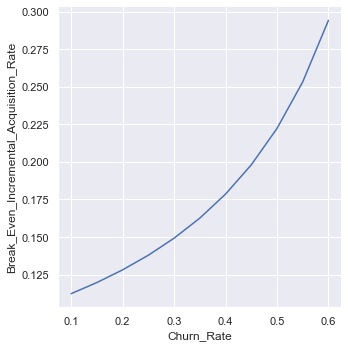

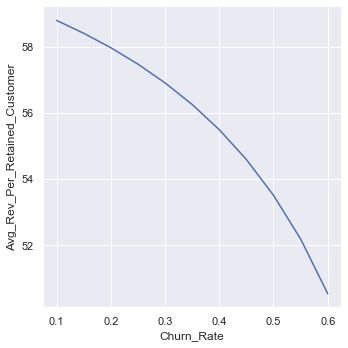

In [295]:
sns.set_style('whitegrid')
sns.set(font_scale=1)
sns.relplot(data=Rate_Elasticity2, y='Break_Even_Incremental_Acquisition_Rate', x='Churn_Rate', kind='line')
sns.relplot(data=Rate_Elasticity2, y='Avg_Rev_Per_Retained_Customer', x='Churn_Rate', kind='line')

### INITIAL MODEL

In [230]:
cont_columns_scaled_df.columns

Index(['CustServ_Calls', 'Vmail_Message', 'Account_Length', 'Day_Mins',
       'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Total_Mins', 'Day_Calls',
       'Eve_Calls', 'Night_Calls', 'Intl_Calls', 'Day_Charge', 'Eve_Charge',
       'Night_Charge', 'Intl_Charge', 'Total_Calls', 'Total_Charge',
       'Avg_Daily_Charge', 'Avg_Cost_Per_Minute', 'Avg_Minutes_Per_Call',
       'Avg_Cost_Per_Call', 'Day_Mins_to_Total', 'Eve_Mins_to_Total',
       'Night_Mins_to_Total', 'Intl_Mins_to_Total', 'Day_Charge_to_Total',
       'Eve_Charge_to_Total', 'Night_Charge_to_Total', 'Intl_Charge_to_Total',
       'Churn', 'Intl_Plan', 'Vmail_Plan', 'US_Region_Midwest',
       'US_Region_Northeast', 'US_Region_Other', 'US_Region_South',
       'US_Region_West'],
      dtype='object')

In [234]:
features = ['CustServ_Calls', 'Vmail_Message', 'Account_Length', 'Day_Mins',
       'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Total_Mins', 'Day_Calls',
       'Eve_Calls', 'Night_Calls', 'Intl_Calls', 'Day_Charge', 'Eve_Charge',
       'Night_Charge', 'Intl_Charge', 'Total_Calls', 'Total_Charge',
       'Avg_Daily_Charge', 'Avg_Cost_Per_Minute', 'Avg_Minutes_Per_Call',
       'Avg_Cost_Per_Call', 'Day_Mins_to_Total', 'Eve_Mins_to_Total',
       'Night_Mins_to_Total', 'Intl_Mins_to_Total', 'Day_Charge_to_Total',
       'Eve_Charge_to_Total', 'Night_Charge_to_Total', 'Intl_Charge_to_Total',
        'Intl_Plan', 'Vmail_Plan', 'US_Region_Midwest',
       'US_Region_Northeast', 'US_Region_Other', 'US_Region_South',
       'US_Region_West']

In [235]:
target = ['Churn']

In [236]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [237]:
X = cont_columns_scaled_df[features]
y = cont_columns_scaled_df[target]

In [238]:
# conduct random grid search to identify best params

clf = RandomForestClassifier()

param_grid = {"max_depth": [3, 5, 8, 15, 25, 30, None],
              "max_features": [1, 3, 10, 15, 20, 30],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

random_search = RandomizedSearchCV(clf, param_grid)

random_search.fit(X, y)

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the 

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the 

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [247]:
# note that when I reran the model the parameters changed as did the confusion matrix

print(random_search.best_params_)

{'max_features': 20, 'max_depth': 30, 'criterion': 'gini', 'bootstrap': False}


In [262]:
# input best params into model, split the data into train and test groups and run model

clf2 = RandomForestClassifier(bootstrap=False, max_depth=30, max_features=20, criterion='gini')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)


/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [263]:
summary = metrics.classification_report(y_test, y_pred)
print(summary)
print()

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       282
           1       0.96      0.88      0.92        52

    accuracy                           0.98       334
   macro avg       0.97      0.94      0.95       334
weighted avg       0.98      0.98      0.98       334




In [264]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[280,   2],
       [  6,  46]])

(2.0, 0.0)

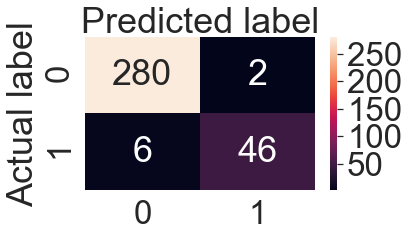

In [265]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [266]:
# Calculate feature importances
importances = clf2.feature_importances_

# Create labels
labels = X.columns

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(labels, importances):
    feats[feature] = importance #add the name/value pair 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values('Gini-importance', ascending=False)

In [267]:
importances = importances.reset_index()

In [268]:
importances = importances.rename(columns={'index':'Feature', 'Gini-importance': 'Gini-Importance'})

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 <a list of 7 Text xticklabel objects>)

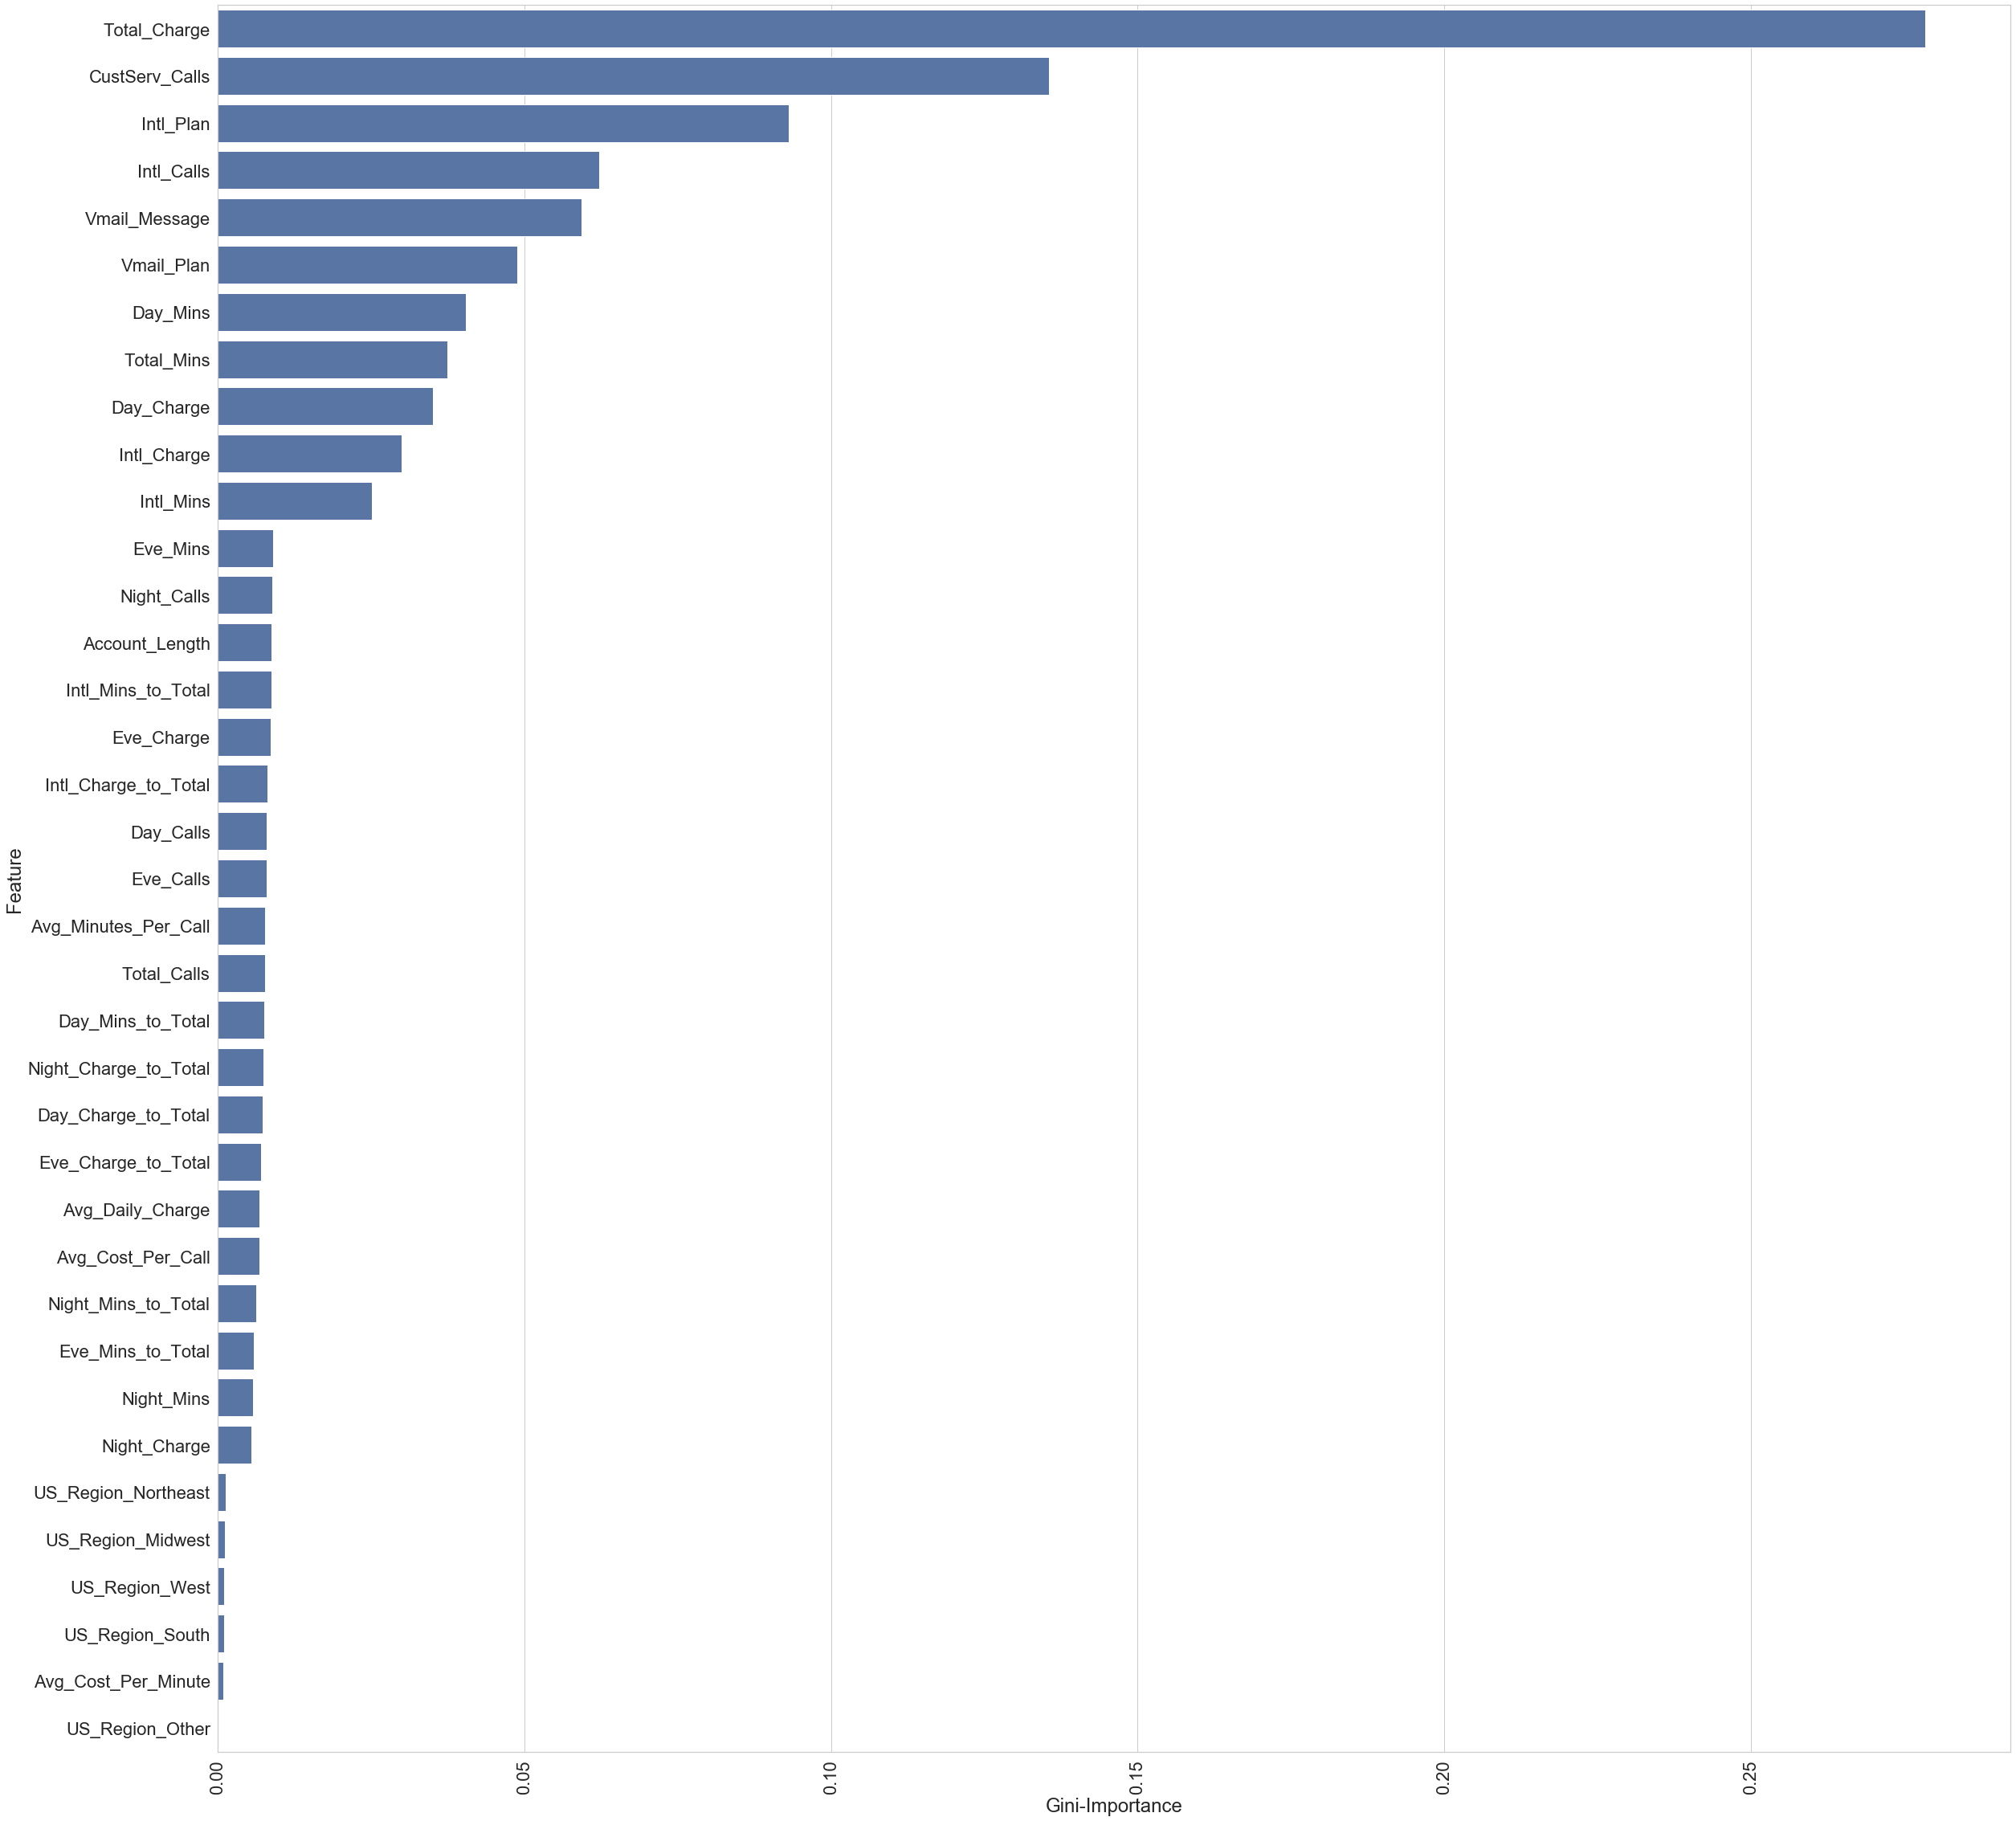

In [249]:
# Plot Feature Importance

sns.set_style('whitegrid')
plt.subplots(figsize=(40, 40))
sns.set(font_scale=2)
sns.barplot(data=importances,  y='Feature', x='Gini-Importance', color='b')
plt.xticks(rotation=90)

### IMPROVING THE MODEL THROUGH ANALYSIS OF SUBGROUPS WITHIN CHURN AUDIENCES

In [321]:
# Examine subgroups within the dataset

subgroup_cols = ['CustServ_Calls', 'Vmail_Message', 'Day_Mins', 'Intl_Mins', 'Total_Mins', 'Day_Calls',
        'Intl_Calls', 'Day_Charge','Intl_Charge', 'Total_Calls', 'Total_Charge',
       'Avg_Daily_Charge', 'Avg_Cost_Per_Minute', 'Avg_Minutes_Per_Call',
       'Avg_Cost_Per_Call', 'Day_Mins_to_Total','Intl_Mins_to_Total', 'Day_Charge_to_Total','Intl_Charge_to_Total']

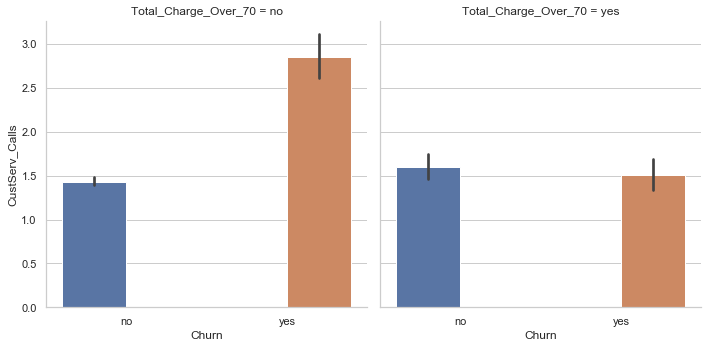

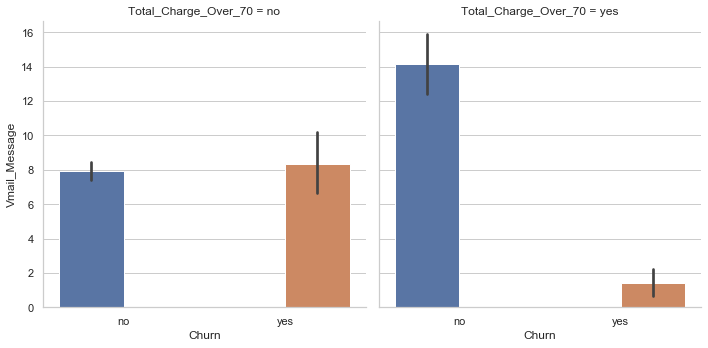

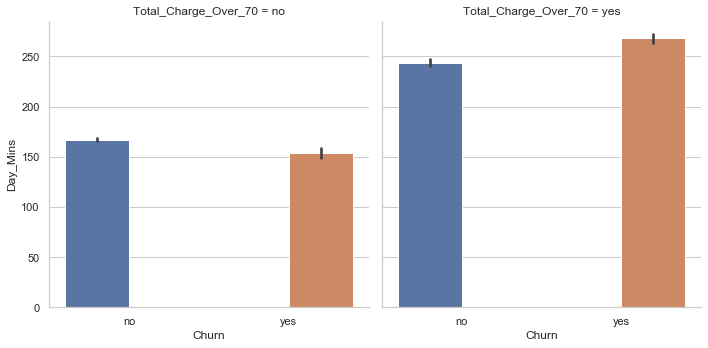

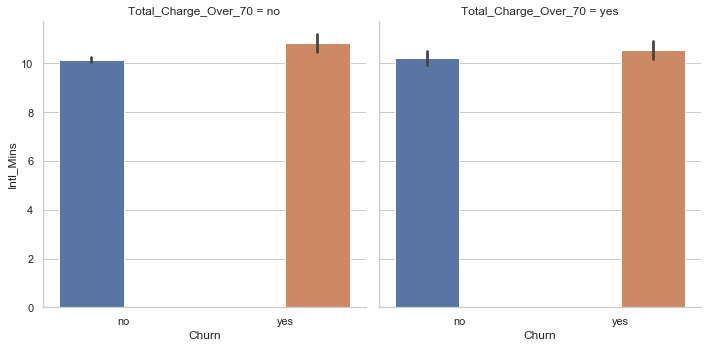

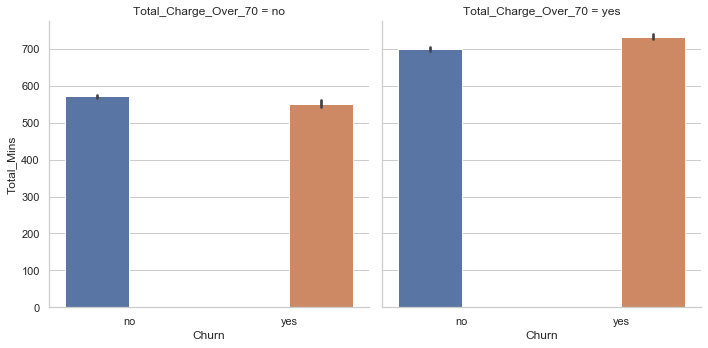

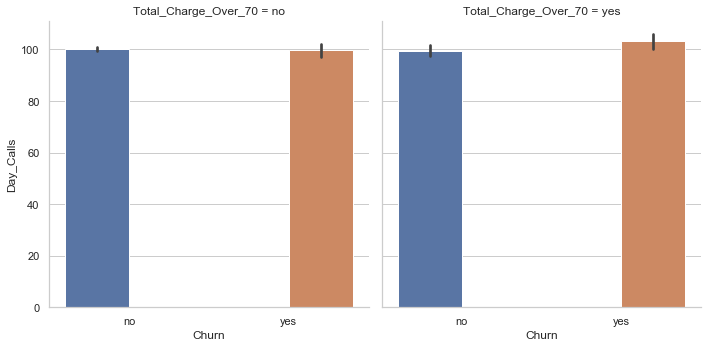

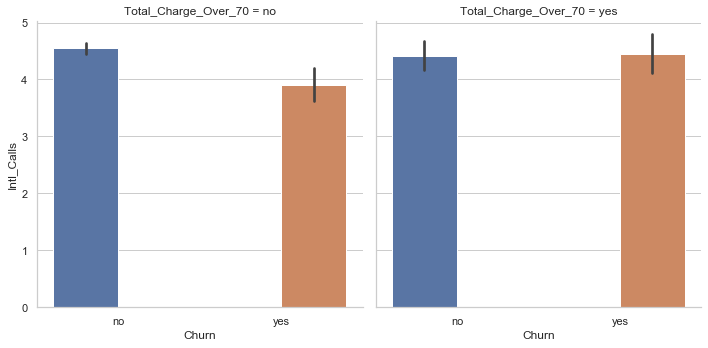

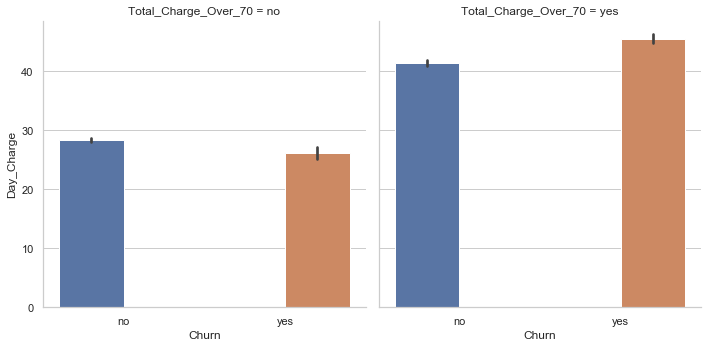

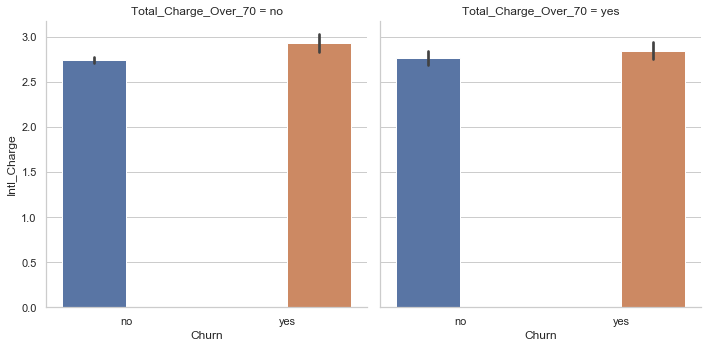

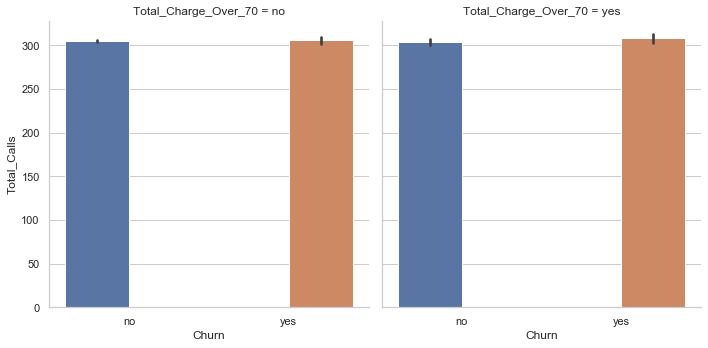

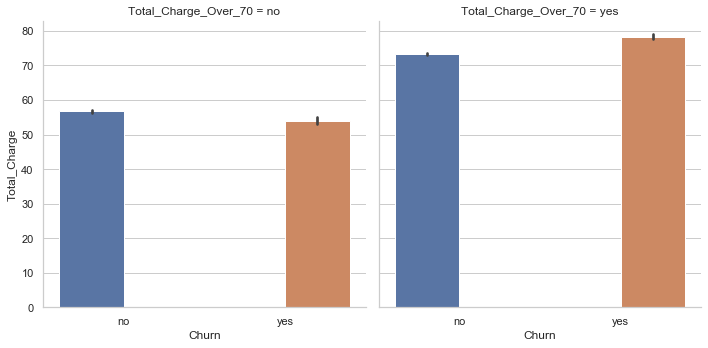

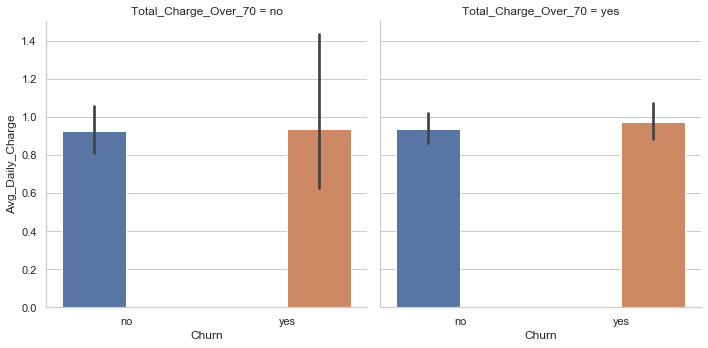

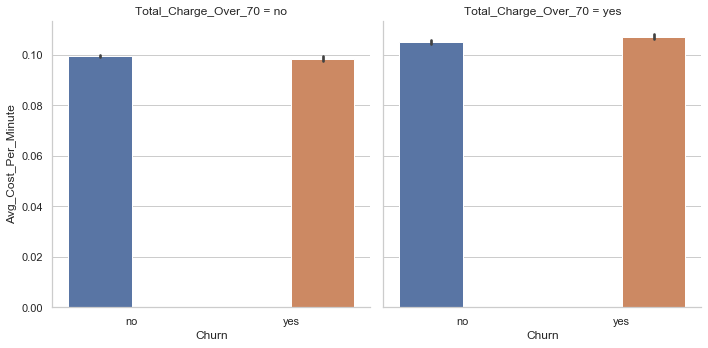

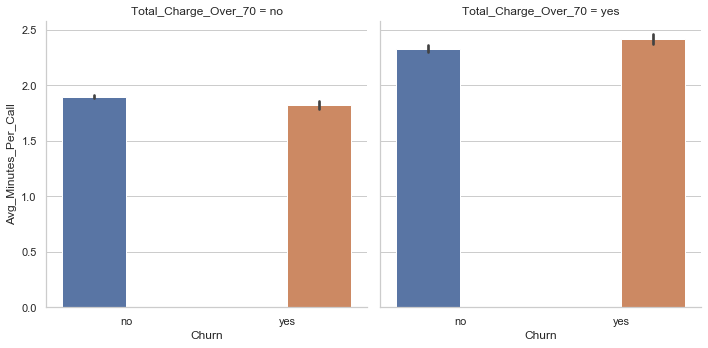

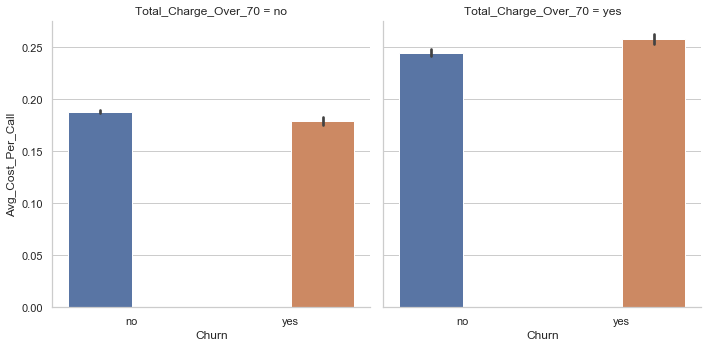

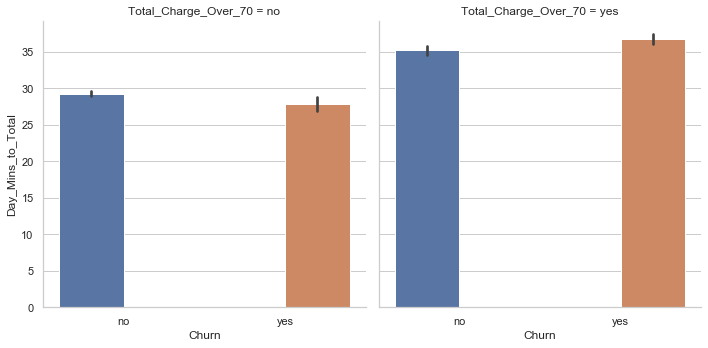

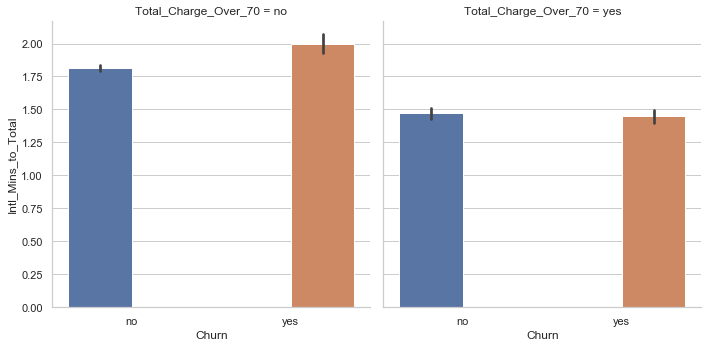

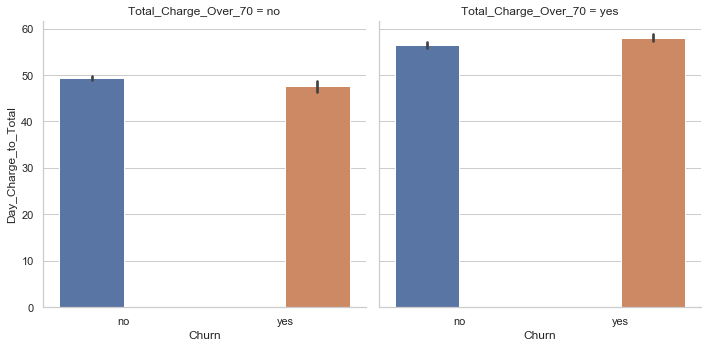

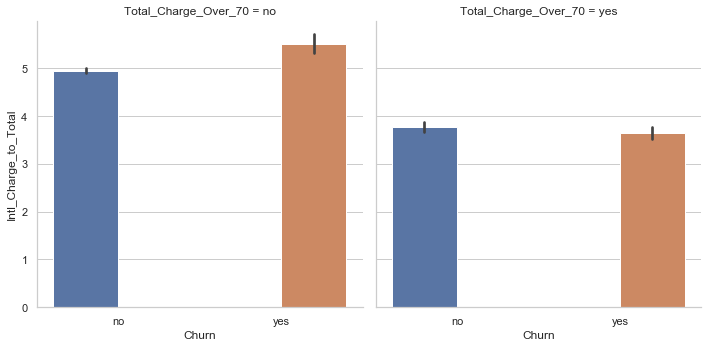

In [334]:
for i in range(19):   
    f = sns.factorplot(data=churn_data2, x='Churn', y=subgroup_cols[i], hue='Churn', kind='bar', col='Total_Charge_Over_70', col_order=['no', 'yes'])
    plt.show()
    

In [317]:
# subset data set with churn audiences

churners = churn_data2[churn_data2['Churn']=='yes'] 
churners

Phone  Area_Code State Churn Intl_Plan Vmail_Plan  CustServ_Calls  \
10    329-6603        415    IN   yes        no         no               4   
15    351-7269        415    NY   yes        no         no               4   
21    393-7984        408    CO   yes        no         no               5   
33    360-1596        408    AZ   yes        no         no               1   
41    383-6029        408    MD   yes       yes        yes               0   
...        ...        ...   ...   ...       ...        ...             ...   
3301  417-1488        415    CA   yes        no         no               0   
3304  330-7137        510    IL   yes       yes         no               4   
3320  411-5677        510    GA   yes       yes         no               4   
3322  409-1856        408    MD   yes        no         no               4   
3323  362-5899        415    IN   yes        no         no               5   

      Vmail_Message  Account_Length  Day_Mins  Eve_Mins  Night_Mins  \
10                0              65     129.1     228.5       208.8   
15                0             161     332.9     317.8       160.6   
21                0              77      62.4     169.9       209.6   
33                0              12     249.6     252.4       280.2   
41               41             135     173.1     203.9       122.2   
...             ...             ...       ...       ...         ...   
3301              0              84     280.0     202.2       156.8   
3304              0              71     186.1     198.6       206.5   
3320              0             122     140.0     196.4       120.1   
3322              0              62     321.1     265.5       180.5   
3323              0             117     118.4     249.3       227.0   

      Intl_Mins  Total_Mins  Day_Calls  Eve_Calls  Night_Calls  Intl_Calls  \
10         12.7       579.1        137         83          111           6   
15          5.4       816.7         67         97          128           9   
21          5.7       447.6         89        121           64           6   
33         11.8       794.0        118        119           90           3   
41         14.6       513.8         85        107           78          15   
...         ...         ...        ...        ...          ...         ...   
3301       10.4       649.4        113         90          103           4   
3304       13.8       605.0        114        140           80           5   
3320        9.7       466.2        101         77          133           4   
3322       11.5       778.6        105        122           72           2   
3323       13.6       608.3        126         97           56           3   

      Day_Charge  Eve_Charge  Night_Charge  Intl_Charge  Total_Calls  \
10         21.95       19.42          9.40         3.43          337   
15         56.59       27.01          7.23         1.46          301   
21         10.61       14.44          9.43         1.54          280   
33         42.43       21.45         12.61         3.19          330   
41         29.43       17.33          5.50         3.94          285   
...          ...         ...           ...          ...          ...   
3301       47.60       17.19          7.06         2.81          310   
3304       31.64       16.88          9.29         3.73          339   
3320       23.80       16.69          5.40         2.62          315   
3322       54.59       22.57          8.12         3.11          301   
3323       20.13       21.19         10.22         3.67          282   

      Total_Charge  Avg_Daily_Charge  Avg_Cost_Per_Minute  \
10           54.20              0.83                 0.09   
15           92.29              0.57                 0.11   
21           36.02              0.47                 0.08   
33           79.68              6.64                 0.10   
41           56.20              0.42                 0.11   
...            ...               ...               

In [318]:
churner_cols = churners.columns
churner_cols

Index(['Phone', 'Area_Code', 'State', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'CustServ_Calls', 'Vmail_Message', 'Account_Length', 'Day_Mins',
       'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Total_Mins', 'Day_Calls',
       'Eve_Calls', 'Night_Calls', 'Intl_Calls', 'Day_Charge', 'Eve_Charge',
       'Night_Charge', 'Intl_Charge', 'Total_Calls', 'Total_Charge',
       'Avg_Daily_Charge', 'Avg_Cost_Per_Minute', 'Avg_Minutes_Per_Call',
       'Avg_Cost_Per_Call', 'Day_Mins_to_Total', 'Eve_Mins_to_Total',
       'Night_Mins_to_Total', 'Intl_Mins_to_Total', 'Day_Charge_to_Total',
       'Eve_Charge_to_Total', 'Night_Charge_to_Total', 'Intl_Charge_to_Total',
       'Care_Status', 'Total_Charge_Over_70', 'US_Region'],
      dtype='object')

In [319]:
churner_cols = ['Intl_Plan', 'Vmail_Plan','Care_Status', 'US_Region']

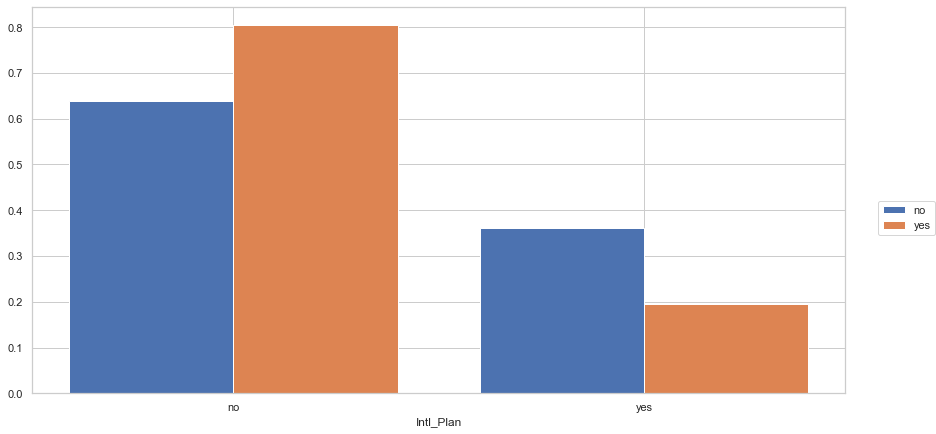

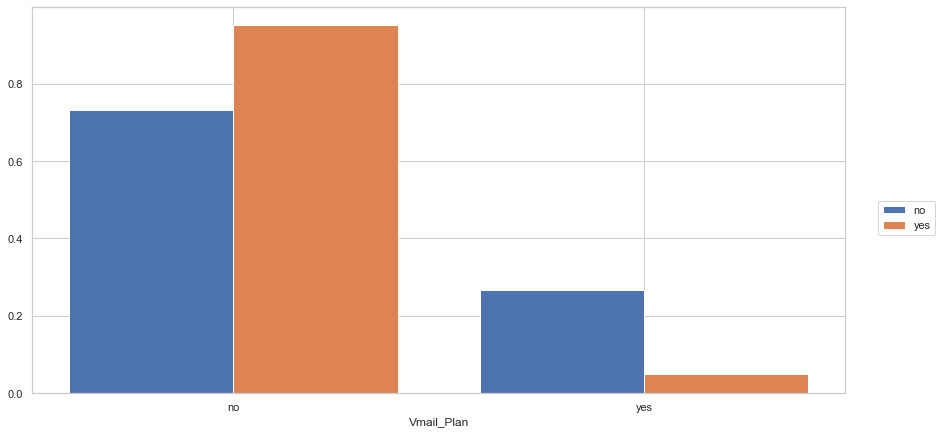

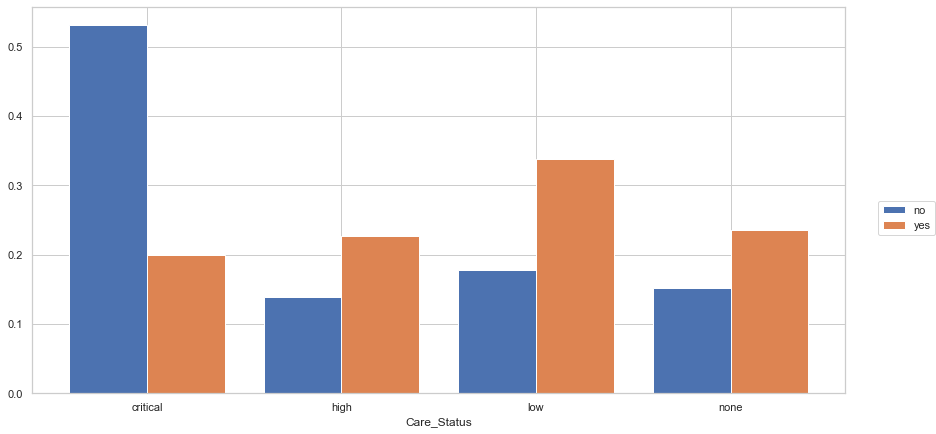

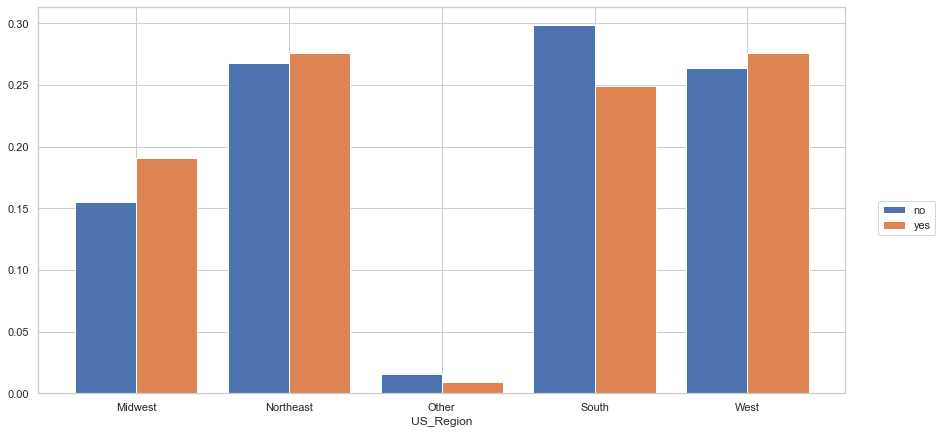

In [320]:
sns.set_style('whitegrid')

for i in range(4):
    g = dxp.aggplot(data=churners, agg=churner_cols[i], hue='Total_Charge_Over_70', normalize='Total_Charge_Over_70')
    g.set(xlabel=churner_cols[i])
    plt.show()

In [349]:
# create new dataframe for cluster analysis

churner_metrics2 = churn_data2.iloc[:, 3:-1]

In [350]:
# recode categorical variables for cluster analysis

churner_metrics2['Churn'] = churner_metrics2['Churn'].replace({'no':0, 'yes':1})
churner_metrics2['Intl_Plan'] = churner_metrics2['Intl_Plan'].replace({'no':0, 'yes':1})
churner_metrics2['Vmail_Plan'] = churner_metrics2['Vmail_Plan'].replace({'no':0, 'yes':1})
churner_metrics2['Total_Charge_Over_70'] = churner_metrics2['Total_Charge_Over_70'].replace({'no':0, 'yes':1})

In [351]:
# create corr matrix to identify key relationships within churn audiences

corr_matrix = churner_metrics2.corr()
corr_matrix = corr_matrix.round(4)
corr_matrix

Churn  Intl_Plan  Vmail_Plan  CustServ_Calls  \
Churn                  1.0000     0.2599     -0.1021          0.2087   
Intl_Plan              0.2599     1.0000      0.0060         -0.0245   
Vmail_Plan            -0.1021     0.0060      1.0000         -0.0178   
CustServ_Calls         0.2087    -0.0245     -0.0178          1.0000   
Vmail_Message         -0.0897     0.0087      0.9569         -0.0133   
Account_Length         0.0165     0.0247      0.0029         -0.0038   
Day_Mins               0.2052     0.0494     -0.0017         -0.0134   
Eve_Mins               0.0928     0.0191      0.0215         -0.0130   
Night_Mins             0.0355    -0.0289      0.0061         -0.0093   
Intl_Mins              0.0682     0.0459     -0.0013         -0.0096   
Total_Mins             0.1986     0.0259      0.0145         -0.0210   
Day_Calls              0.0185     0.0038     -0.0111         -0.0189   
Eve_Calls              0.0092     0.0061     -0.0064          0.0024   
Night_Calls            0.0061     0.0125      0.0156         -0.0128   
Intl_Calls            -0.0528     0.0174      0.0076         -0.0176   
Day_Charge             0.2052     0.0494     -0.0017         -0.0134   
Eve_Charge             0.0928     0.0191      0.0216         -0.0130   
Night_Charge           0.0355    -0.0289      0.0061         -0.0093   
Intl_Charge            0.0683     0.0458     -0.0013         -0.0097   
Total_Calls            0.0158     0.0140     -0.0008         -0.0182   
Total_Charge           0.2315     0.0484      0.0086         -0.0199   
Avg_Daily_Charge       0.0030    -0.0058      0.0102         -0.0053   
Avg_Cost_Per_Minute    0.0972     0.0634     -0.0035         -0.0145   
Avg_Minutes_Per_Call   0.1446     0.0127      0.0111         -0.0085   
Avg_Cost_Per_Call      0.1814     0.0336      0.0087         -0.0106   
Day_Mins_to_Total      0.0956     0.0422     -0.0077         -0.0066   
Eve_Mins_to_Total     -0.0237     0.0052      0.0149          0.0014   
Night_Mins_to_Total   -0.0742    -0.0510     -0.0063          0.0056   
Intl_Mins_to_Total    -0.0222     0.0232     -0.0091         -0.0000   
Day_Charge_to_Total    0.0864     0.0332     -0.0077         -0.0045   
Eve_Charge_to_Total   -0.0516    -0.0124      0.0133          0.0017   
Night_Charge_to_Total -0.0827    -0.0525     -0.0019          0.0060   
Intl_Charge_to_Total  -0.0400     0.0081     -0.0109          0.0019   
Total_Charge_Over_70   0.3472     0.0554      0.0225         -0.0010   

                       Vmail_Message  Account_Length  Day_Mins  Eve_Mins  \
Churn                        -0.0897          0.0165    0.2052    0.0928   
Intl_Plan                     0.0087          0.0247    0.0494    0.0191   
Vmail_Plan                    0.9569          0.0029   -0.0017    0.0215   
CustServ_Calls               -0.0133         -0.0038   -0.0134   -0.0130   
Vmail_Message                 1.0000         -0.0046    0.0008    0.0176   
Account_Length               -0.0046          1.0000    0.0062   -0.0068   
Day_Mins                      0.0008          0.0062    1.0000    0.0070   
Eve_Mins                      0.0176         -0.0068    0.0070    1.0000   
Night_Mins                    0.0077         -0.0090    0.0043   -0.0126   
Intl_Mins                     0.0029          0.0095   -0.0102   -0.0110   
Total_Mins                    0.0148         -0.0048    0.6116    0.5606   
Day_Calls                    -0.0095          0.0385    0.0068   -0.0215   
Eve_Calls                    -0.0059          0.0193    0.0158   -0.0114   
Night_Calls                   0.0071         -0.0132    0.0230    0.0076   
Intl_Calls                    0.0140          0.0207    0.0080    0.0025   
Day_Charge                    0.0008          0.0062    1.0000    0.0070   
Eve_Charge                    0.0176         -0.0067    0.0070    1.0000   
Night_Charge                  0.0077         -0.0090    0.0043   -0.0126   
Intl_Charge                   0.0029          0.0095   -0.0

In [352]:
# sort correlation matrix according to strength of relationship

corr_matrix = corr_matrix.sort_values('Churn', ascending=True)

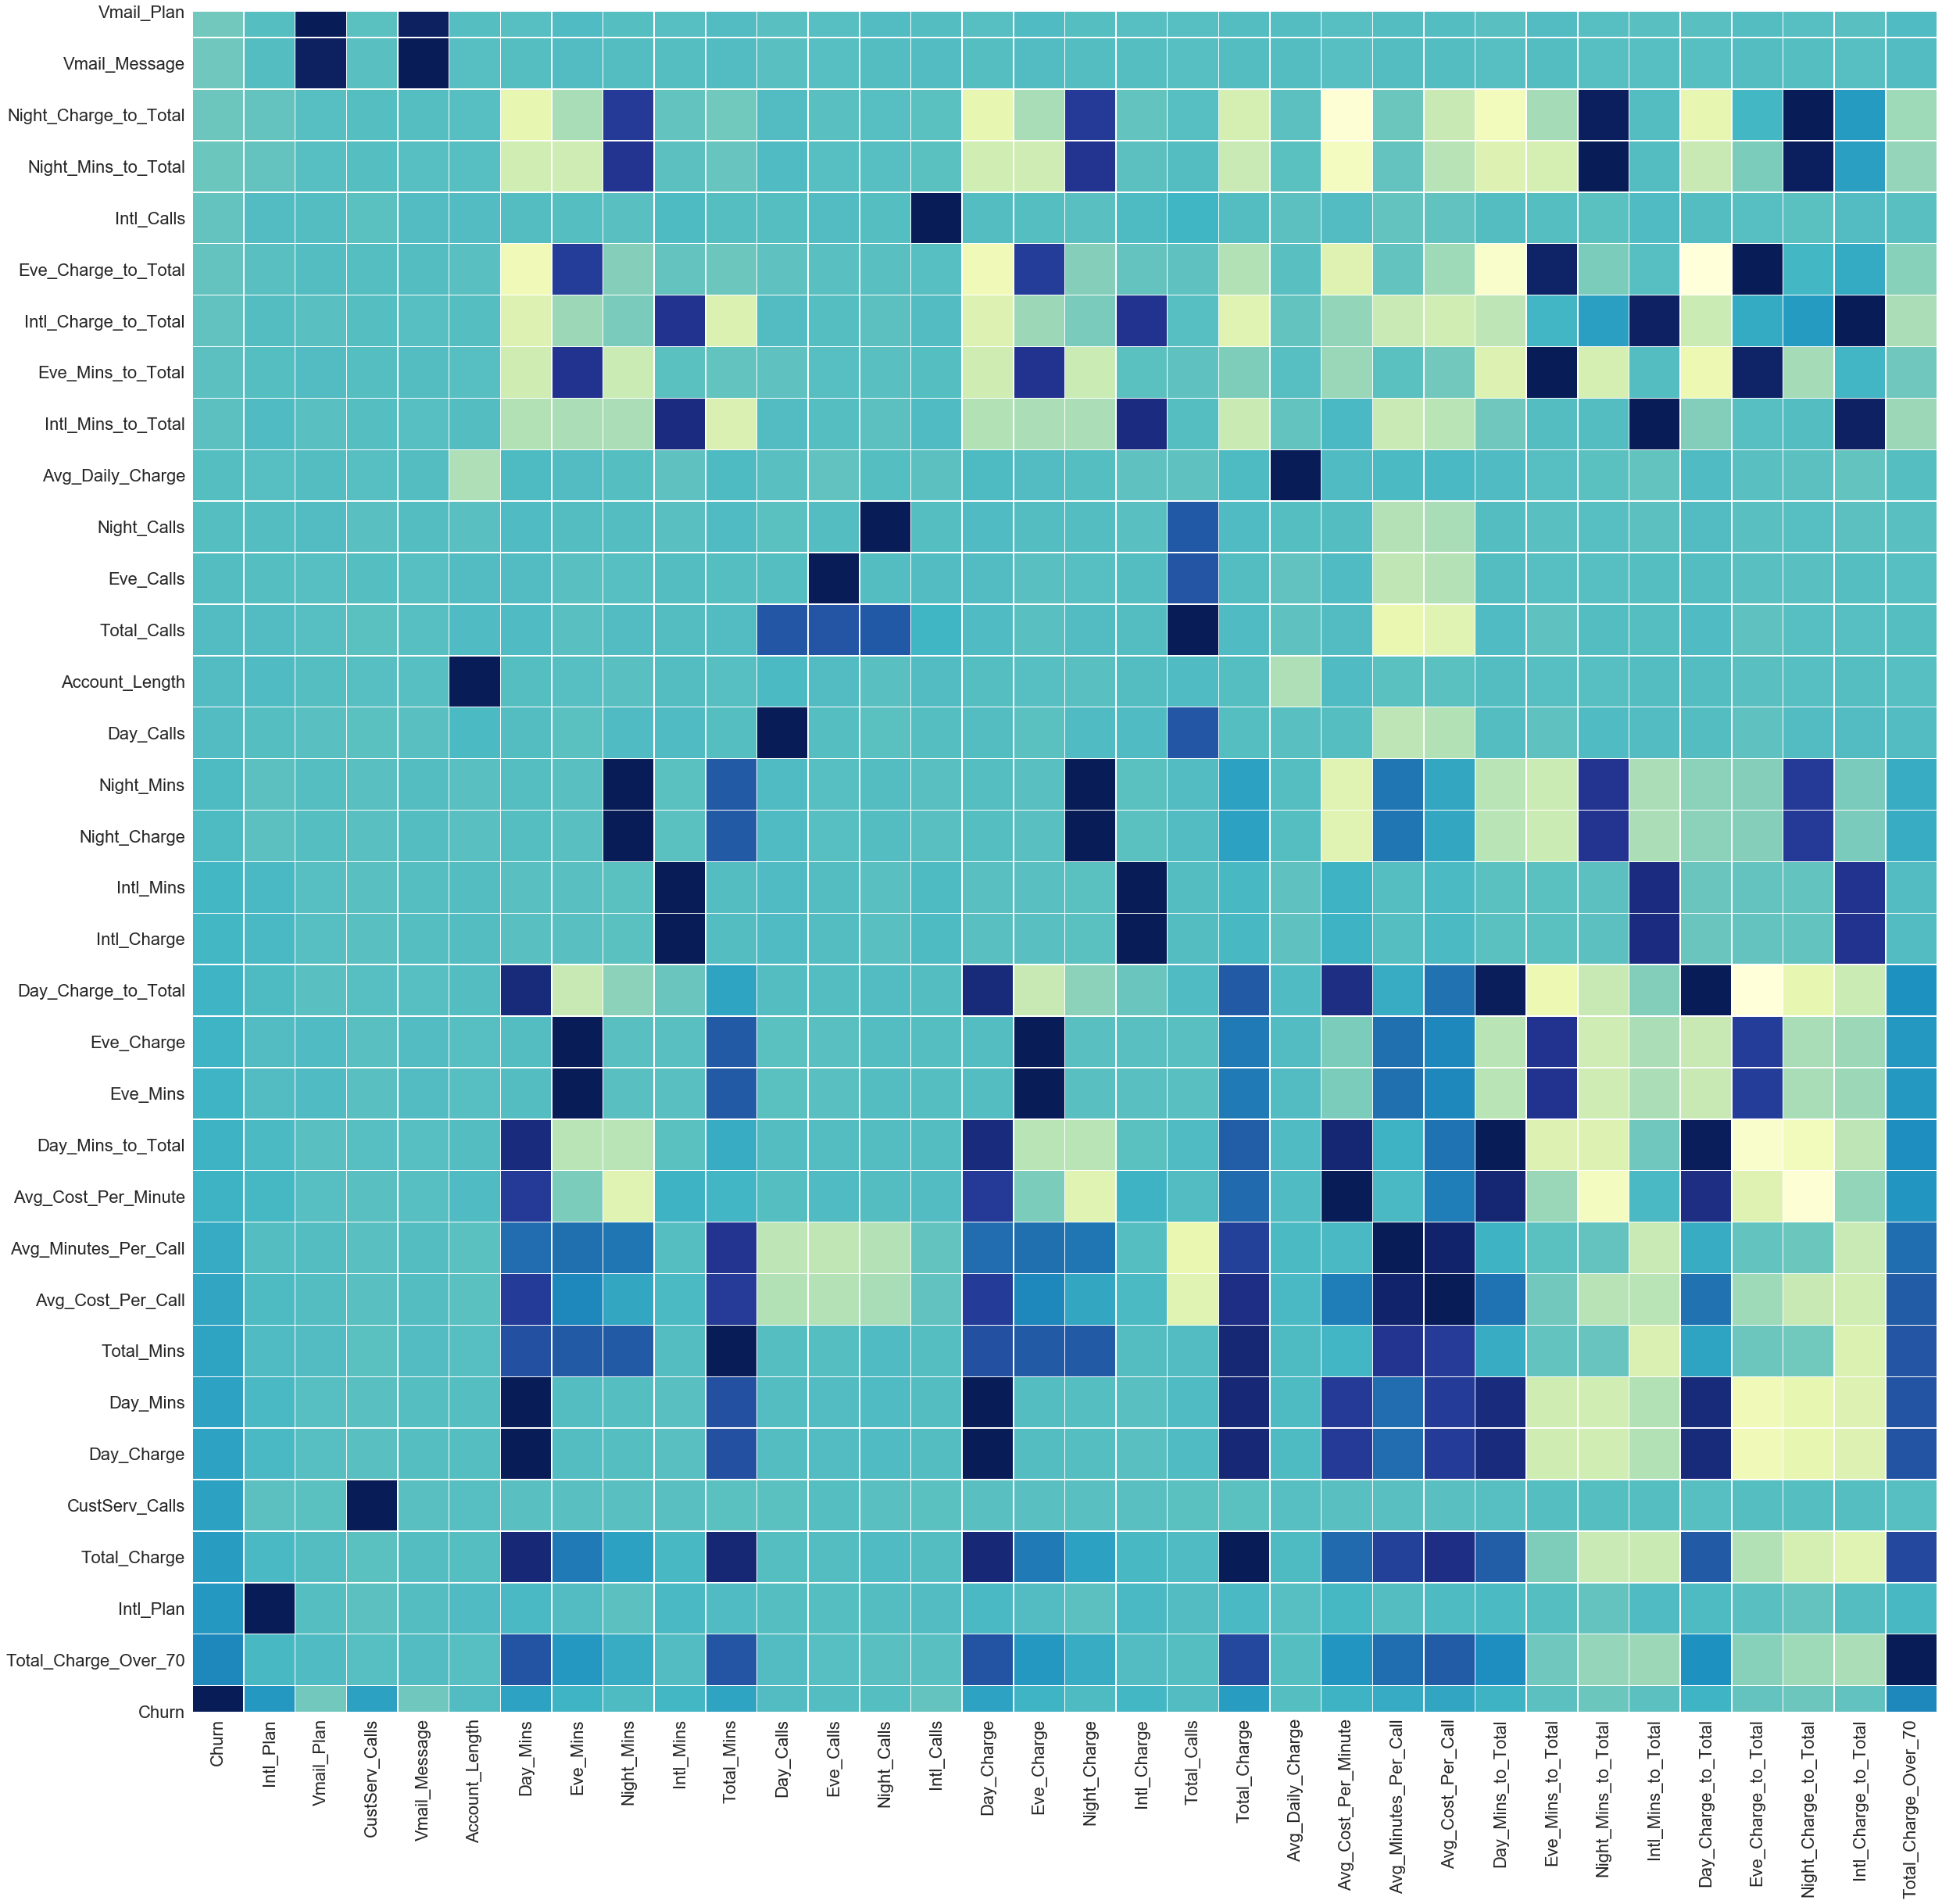

In [353]:
# plot correlation matrix

plt.subplots(figsize=(40, 40))
sns.set(font_scale=2)
sns.heatmap(corr_matrix, cmap='YlGnBu', cbar=False, linewidths=.5)


In [358]:
# subset data by churners

churners2 = churner_metrics2[churner_metrics2['Churn']!=0] 
churners2 = churners2.iloc[:, 1:]

In [359]:
# rerun correlation matrix

churner_corr_matrix = churners2.corr()
churner_corr_matrix = churner_corr_matrix.round(4)
churner_corr_matrix

Intl_Plan  Vmail_Plan  CustServ_Calls  Vmail_Message  \
Intl_Plan                 1.0000      0.1644         -0.2121         0.1435   
Vmail_Plan                0.1644      1.0000          0.0861         0.9692   
CustServ_Calls           -0.2121      0.0861          1.0000         0.0775   
Vmail_Message             0.1435      0.9692          0.0775         1.0000   
Account_Length            0.0358      0.0231         -0.0088         0.0198   
Day_Mins                 -0.1213     -0.1960         -0.4197        -0.1915   
Eve_Mins                 -0.0378     -0.0843         -0.2311        -0.0898   
Night_Mins               -0.1415     -0.1136         -0.0938        -0.1086   
Intl_Mins                 0.2441      0.0711         -0.0962         0.0636   
Total_Mins               -0.1473     -0.2081         -0.4118        -0.2059   
Day_Calls                -0.0746     -0.0020         -0.0039        -0.0038   
Eve_Calls                -0.0354      0.0091         -0.0062         0.0046   
Night_Calls               0.0176      0.0347         -0.0264         0.0165   
Intl_Calls               -0.0548      0.0828         -0.0668         0.0752   
Day_Charge               -0.1213     -0.1960         -0.4197        -0.1915   
Eve_Charge               -0.0378     -0.0843         -0.2311        -0.0898   
Night_Charge             -0.1416     -0.1137         -0.0938        -0.1087   
Intl_Charge               0.2437      0.0710         -0.0963         0.0636   
Total_Calls              -0.0595      0.0295         -0.0256         0.0150   
Total_Charge             -0.1228     -0.2058         -0.4473        -0.2033   
Avg_Daily_Charge         -0.0239     -0.0497          0.0191        -0.0475   
Avg_Cost_Per_Minute       0.0204     -0.0617         -0.3192        -0.0654   
Avg_Minutes_Per_Call     -0.0938     -0.1999         -0.3452        -0.1914   
Avg_Cost_Per_Call        -0.0799     -0.2008         -0.3968        -0.1928   
Day_Mins_to_Total        -0.0509     -0.1060         -0.3132        -0.1017   
Eve_Mins_to_Total         0.0850      0.0813          0.0792         0.0706   
Night_Mins_to_Total      -0.0466      0.0256          0.2544         0.0316   
Intl_Mins_to_Total        0.2646      0.1579          0.1571         0.1533   
Day_Charge_to_Total      -0.0699     -0.1053         -0.2964        -0.1003   
Eve_Charge_to_Total       0.0642      0.0883          0.1727         0.0796   
Night_Charge_to_Total    -0.0402      0.0305          0.2869         0.0353   
Intl_Charge_to_Total      0.2366      0.1529          0.2229         0.1483   
Total_Charge_Over_70     -0.1825     -0.2933         -0.3625        -0.2925   

                       Account_Length  Day_Mins  Eve_Mins  Night_Mins  \
Intl_Plan                      0.0358   -0.1213   -0.0378     -0.1415   
Vmail_Plan                     0.0231   -0.1960   -0.0843     -0.1136   
CustServ_Calls                -0.0088   -0.4197   -0.2311     -0.0938   
Vmail_Message                  0.0198   -0.1915   -0.0898     -0.1086   
Account_Length                 1.0000    0.0002   -0.0142     -0.0873   
Day_Mins                       0.0002    1.0000    0.2382      0.1343   
Eve_Mins                      -0.0142    0.2382    1.0000      0.0105   
Night_Mins                    -0.0873    0.1343    0.0105      1.0000   
Intl_Mins                     -0.0262   -0.0162   -0.0190     -0.0694   
Total_Mins                    -0.0443    0.7912    0.6196      0.5125   
Day_Calls                      0.0183    0.0618    0.0743      0.0292   
Eve_Calls                      0.0430   -0.0026    0.0429     -0.0204   
Night_Calls                   -0.0406    0.0428    0.0725      0.0028   
Intl_Calls                     0.0148    0.1323   -0.0009     -0.0041   
Day_Charge                     0.0002    1.0000    0.2382      0.1343   
Eve_Charge                    -0.0142    0.2382    1.0000      0.0105   
Night_Charge                  -0.0873    0.1343    0.0104      1.0000   
Intl_Charge           

In [360]:
# sort by strength of relationship with total_charge_over_70 == yes

churner_corr_matrix = churner_corr_matrix.sort_values('Total_Charge_Over_70', ascending=True)

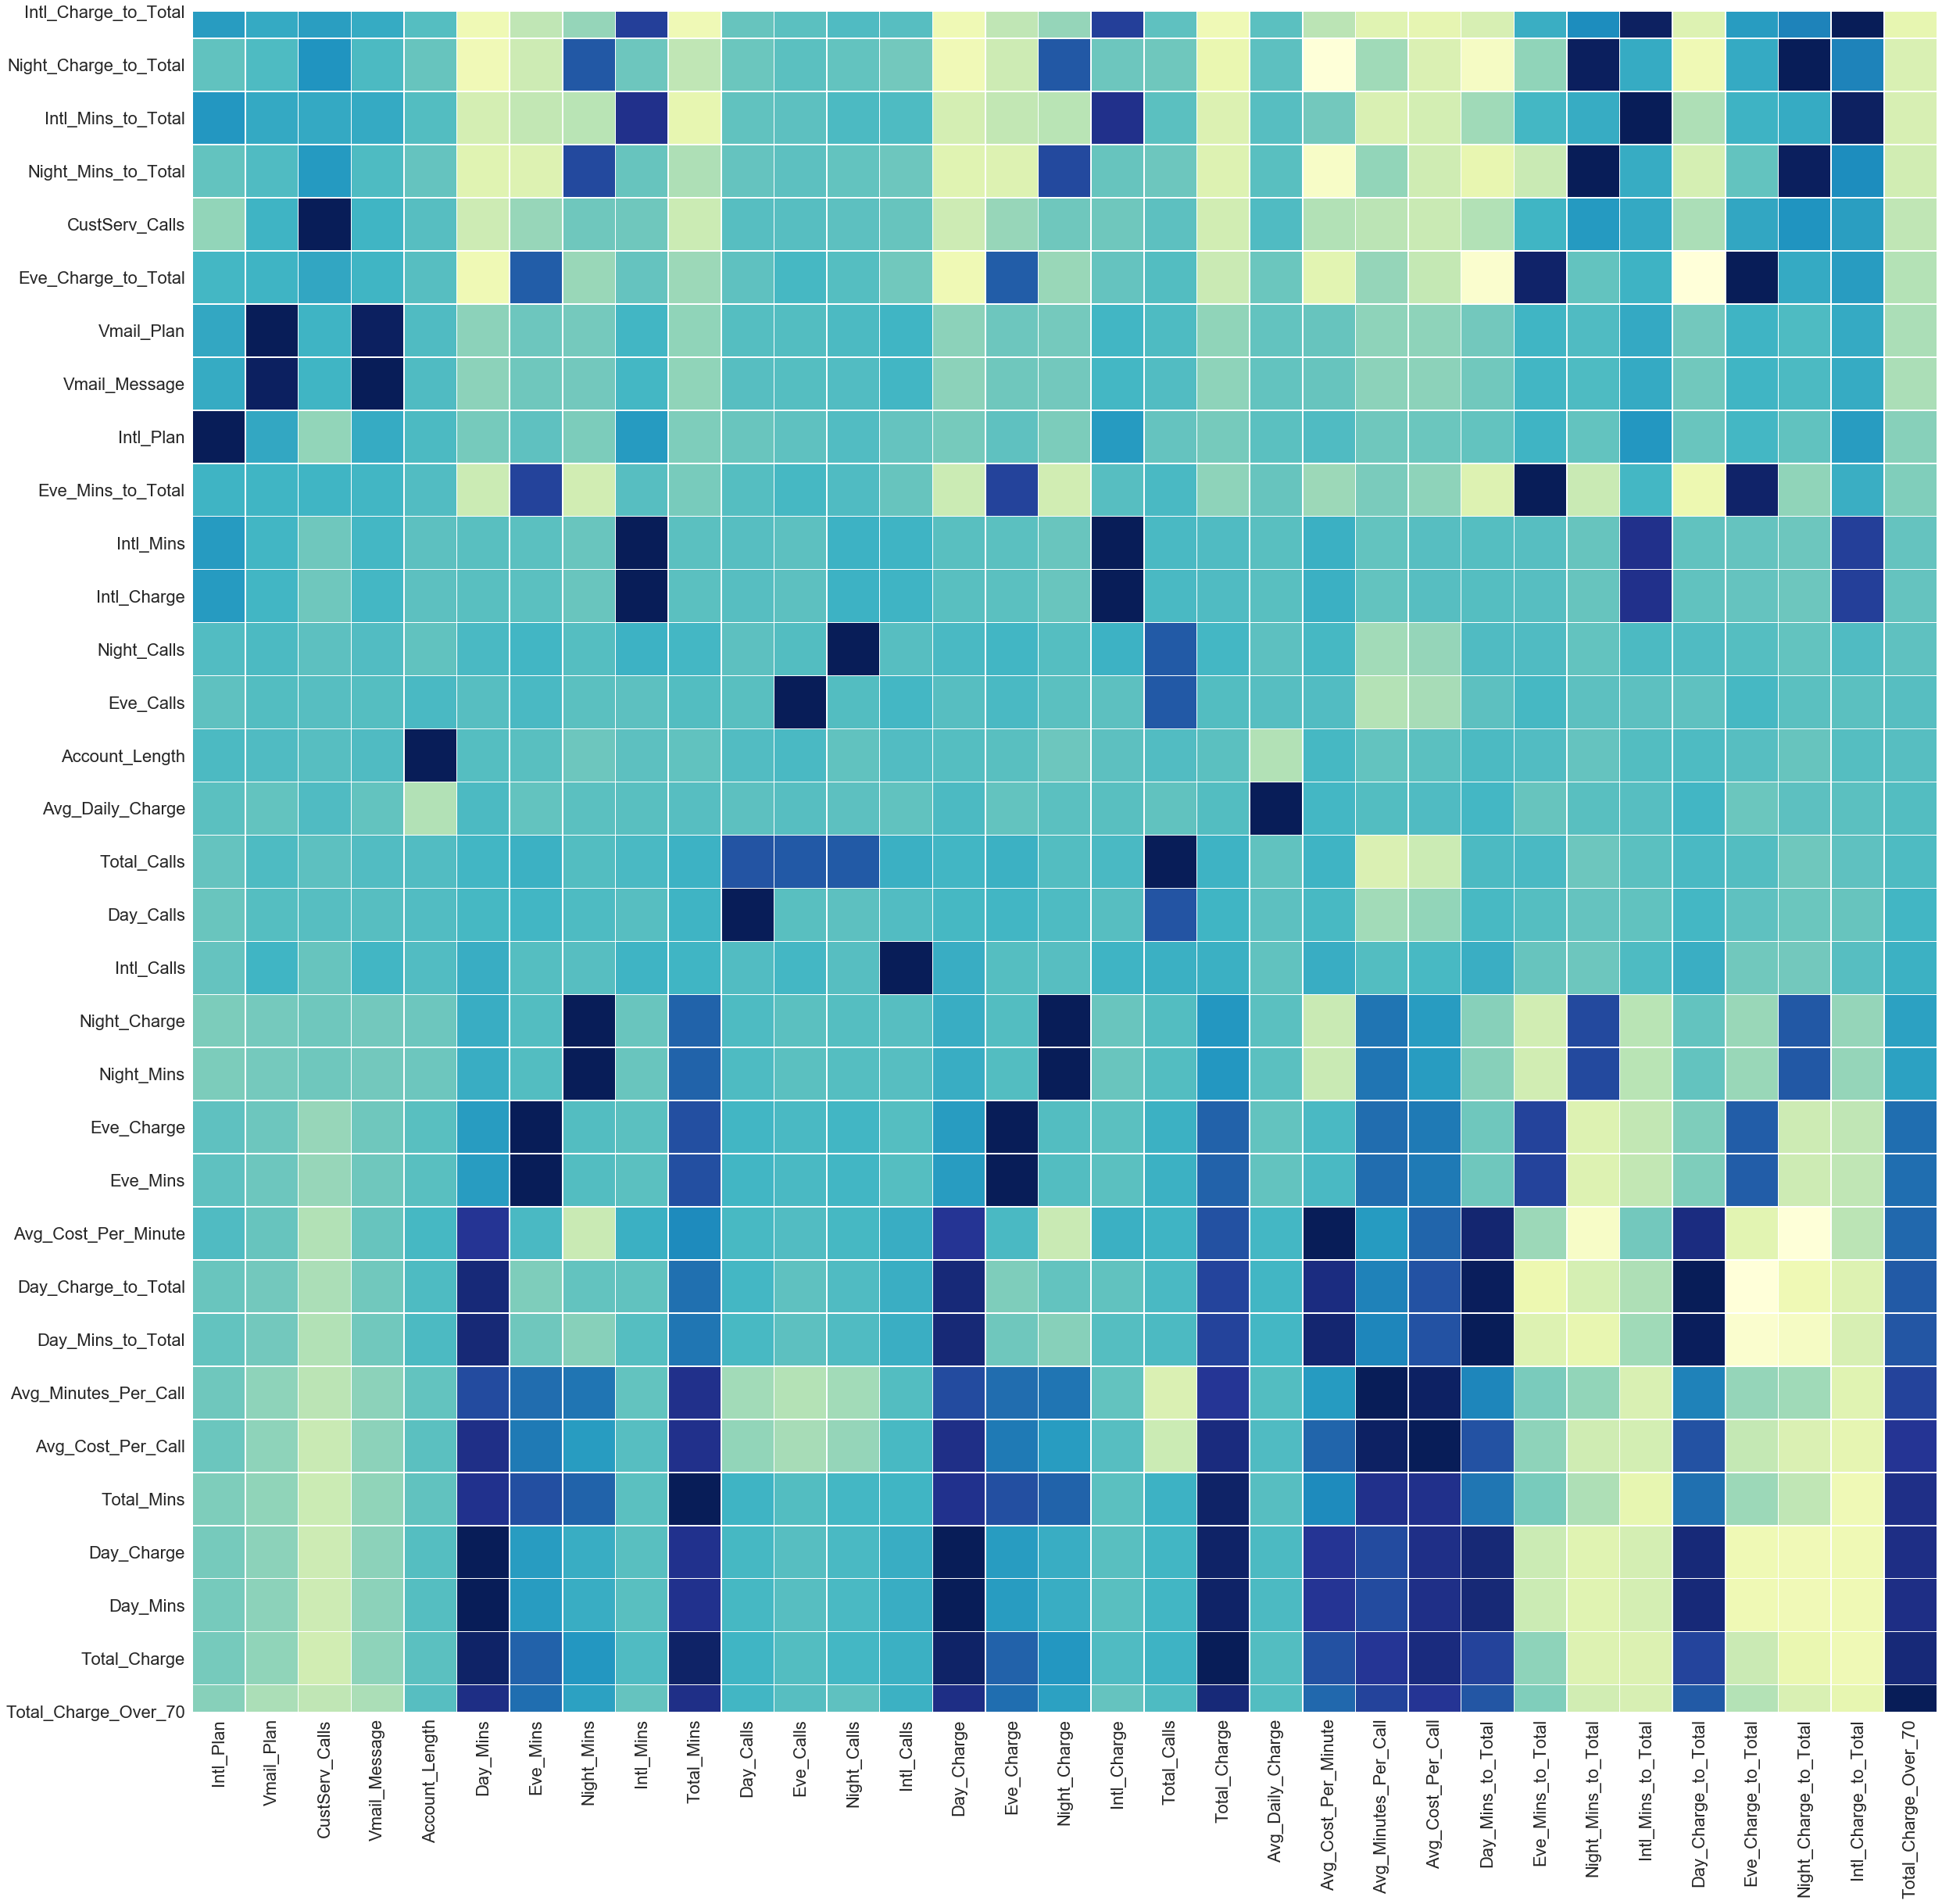

In [361]:
# replot matrix

plt.subplots(figsize=(40, 40))
sns.set(font_scale=2)
sns.heatmap(churner_corr_matrix, cmap='YlGnBu', cbar=False, linewidths=.5)

In [362]:
# add regions for cluster analysis

churner_segs = churners2.iloc[:, 1:]
churner_segs['US_Region'] = churners['US_Region']

In [363]:
# convert categorical variables to dummies

churner_segs = pd.get_dummies(churner_segs)
churner_segs

Vmail_Plan  CustServ_Calls  Vmail_Message  Account_Length  Day_Mins  \
10             0               4              0              65     129.1   
15             0               4              0             161     332.9   
21             0               5              0              77      62.4   
33             0               1              0              12     249.6   
41             1               0             41             135     173.1   
...          ...             ...            ...             ...       ...   
3301           0               0              0              84     280.0   
3304           0               4              0              71     186.1   
3320           0               4              0             122     140.0   
3322           0               4              0              62     321.1   
3323           0               5              0             117     118.4   

      Eve_Mins  Night_Mins  Intl_Mins  Total_Mins  Day_Calls  Eve_Calls  \
10       228.5       208.8       12.7       579.1        137         83   
15       317.8       160.6        5.4       816.7         67         97   
21       169.9       209.6        5.7       447.6         89        121   
33       252.4       280.2       11.8       794.0        118        119   
41       203.9       122.2       14.6       513.8         85        107   
...        ...         ...        ...         ...        ...        ...   
3301     202.2       156.8       10.4       649.4        113         90   
3304     198.6       206.5       13.8       605.0        114        140   
3320     196.4       120.1        9.7       466.2        101         77   
3322     265.5       180.5       11.5       778.6        105        122   
3323     249.3       227.0       13.6       608.3        126         97   

      Night_Calls  Intl_Calls  Day_Charge  Eve_Charge  Night_Charge  \
10            111           6       21.95       19.42          9.40   
15            128           9       56.59       27.01          7.23   
21             64           6       10.61       14.44          9.43   
33             90           3       42.43       21.45         12.61   
41             78          15       29.43       17.33          5.50   
...           ...         ...         ...         ...           ...   
3301          103           4       47.60       17.19          7.06   
3304           80           5       31.64       16.88          9.29   
3320          133           4       23.80       16.69          5.40   
3322           72           2       54.59       22.57          8.12   
3323           56           3       20.13       21.19         10.22   

      Intl_Charge  Total_Calls  Total_Charge  Avg_Daily_Charge  \
10           3.43          337         54.20              0.83   
15           1.46          301         92.29              0.57   
21           1.54          280         36.02              0.47   
33           3.19          330         79.68              6.64   
41           3.94          285         56.20              0.42   
...           ...          ...           ...               ...   
3301         2.81          310         74.66              0.89   
3304         3.73          339         61.54              0.87   
3320         2.62          315         48.51              0.40   
3322         3.11          301         88.39              1.43   
3323         3.67          282         55.21              0.47   

      Avg_Cost_Per_Minute  Avg_Minutes_Per_Call  Avg_Cost_Per_Call  \
10                   0.09                  1.72               0.16   
15                   0.11                  2.71               0.31   
21                   0.08                  1.60               0.13   
33                   0.10                  2.41               0.24   
41                   0.11                  1.80               0.20   
...                   ...                   ...                ...   
3301                 0.11                  2

In [364]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [366]:
# normalize data

mms = MinMaxScaler()
mms.fit(churner_segs)
data_transformed = mms.transform(churner_segs)

In [367]:
# generate elbow plot for optimal number of clusters

Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

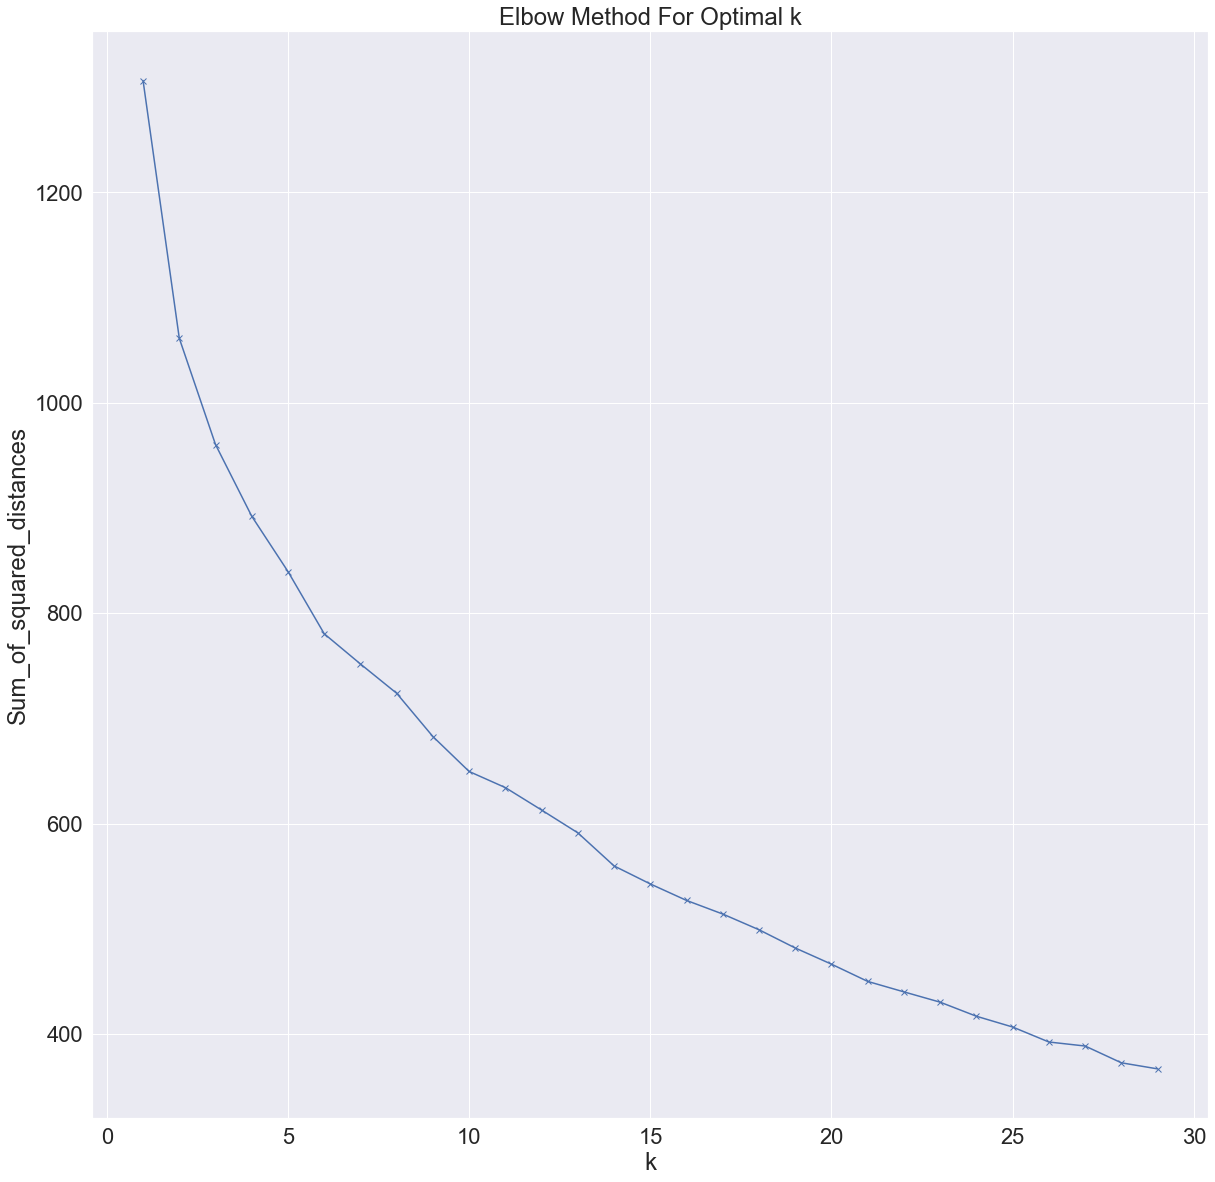

In [368]:
plt.subplots(figsize=(20, 20))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [370]:
# create 2 clusters within churn audience

kmeans = KMeans()
kmeans.set_params(n_clusters=2)
kmeans.fit(churner_segs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [371]:
# create list out of cluster assignment

cluster_assignment = kmeans.labels_

In [372]:
churners['Cluster'] = cluster_assignment

/Users/andrewhoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [373]:
churners.columns

Index(['Phone', 'Area_Code', 'State', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'CustServ_Calls', 'Vmail_Message', 'Account_Length', 'Day_Mins',
       'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Total_Mins', 'Day_Calls',
       'Eve_Calls', 'Night_Calls', 'Intl_Calls', 'Day_Charge', 'Eve_Charge',
       'Night_Charge', 'Intl_Charge', 'Total_Calls', 'Total_Charge',
       'Avg_Daily_Charge', 'Avg_Cost_Per_Minute', 'Avg_Minutes_Per_Call',
       'Avg_Cost_Per_Call', 'Day_Mins_to_Total', 'Eve_Mins_to_Total',
       'Night_Mins_to_Total', 'Intl_Mins_to_Total', 'Day_Charge_to_Total',
       'Eve_Charge_to_Total', 'Night_Charge_to_Total', 'Intl_Charge_to_Total',
       'Care_Status', 'Total_Charge_Over_70', 'US_Region', 'Cluster'],
      dtype='object')

In [374]:
churner_cat_cols = ['Intl_Plan', 'Vmail_Plan','Care_Status', 'Total_Charge_Over_70', 'US_Region']

In [380]:
churner_quant_cols = ['CustServ_Calls', 'Vmail_Message', 'Account_Length', 'Day_Mins',
                       'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Total_Mins', 'Day_Calls',
                       'Eve_Calls', 'Night_Calls', 'Intl_Calls', 'Day_Charge', 'Eve_Charge',
                       'Night_Charge', 'Intl_Charge', 'Total_Calls', 'Total_Charge',
                        'Avg_Daily_Charge', 'Avg_Cost_Per_Minute',
                       'Avg_Minutes_Per_Call', 'Avg_Cost_Per_Call', 'Day_Mins_to_Total',
                       'Eve_Mins_to_Total', 'Night_Mins_to_Total', 'Intl_Mins_to_Total',
                       'Day_Charge_to_Total', 'Eve_Charge_to_Total', 'Night_Charge_to_Total',
                       'Intl_Charge_to_Total']
print(len(churner_quant_cols))

30


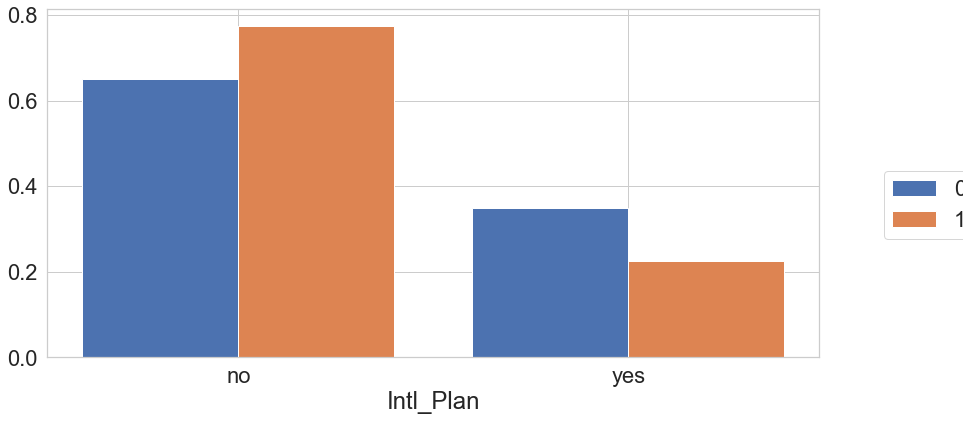

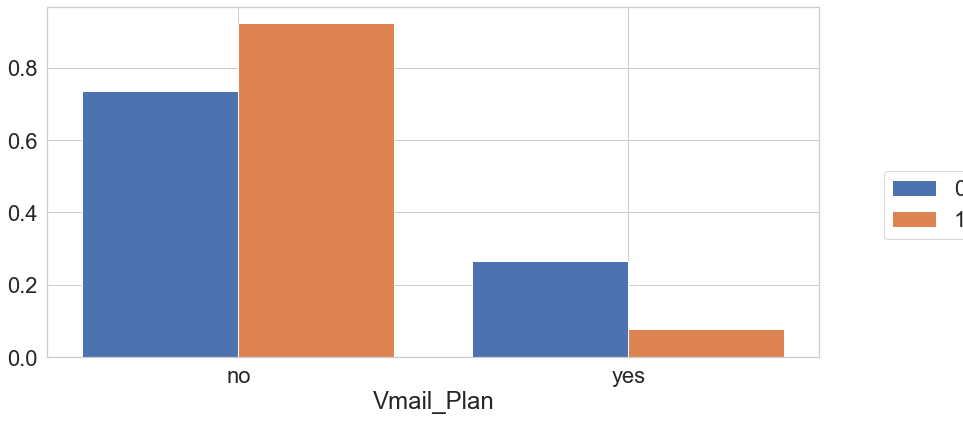

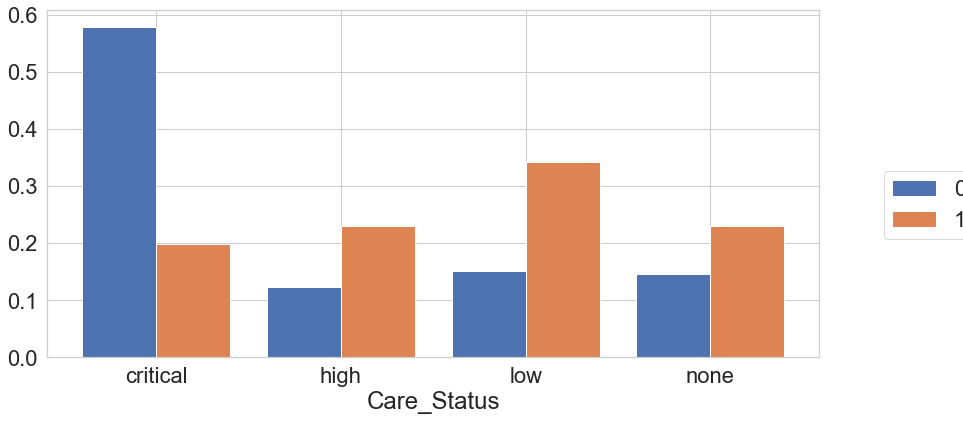

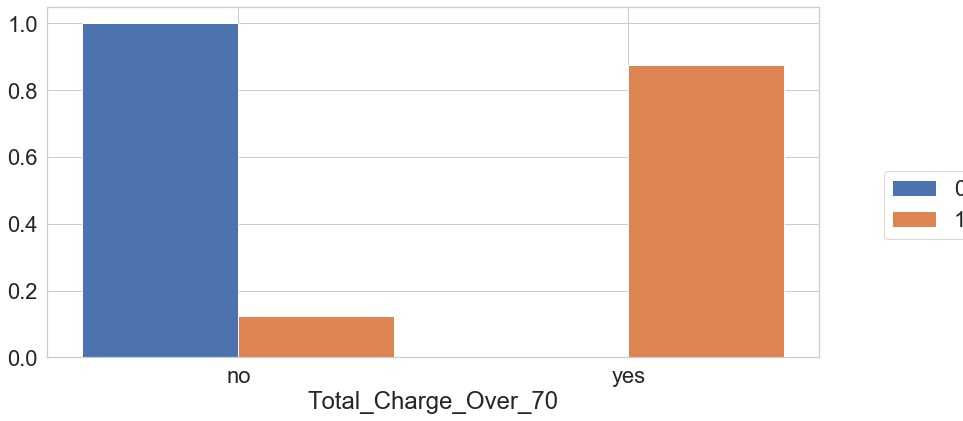

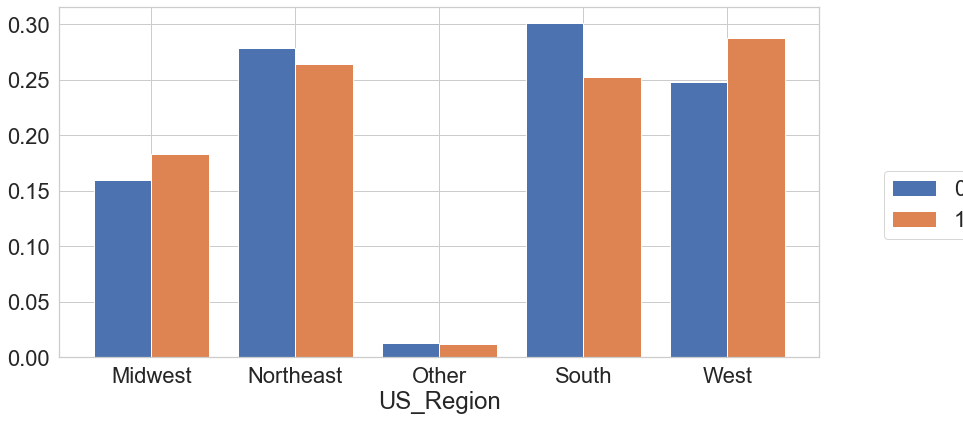

In [384]:
# plot categorical variables broken out by churner segment

sns.set_style('whitegrid')

for i in range(5):
    g = dxp.aggplot(data=churners, agg=churner_cat_cols[i], hue='Cluster', normalize='Cluster')
    g.set(xlabel=churner_cat_cols[i])
    plt.show()

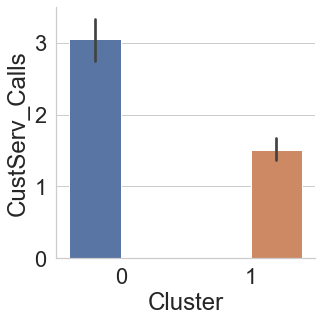

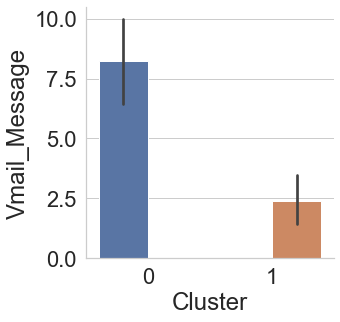

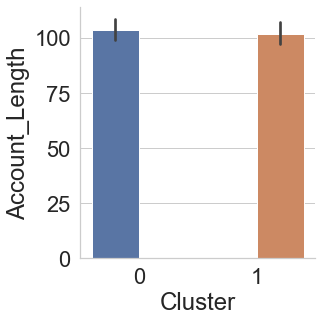

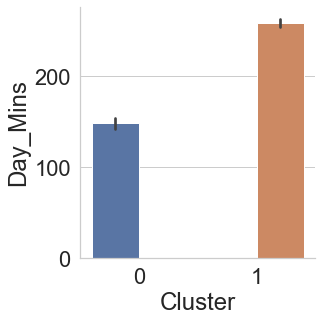

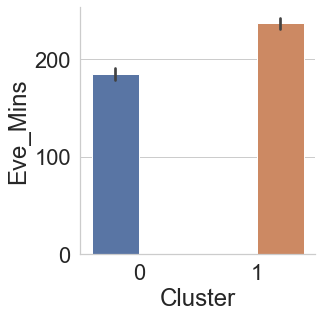

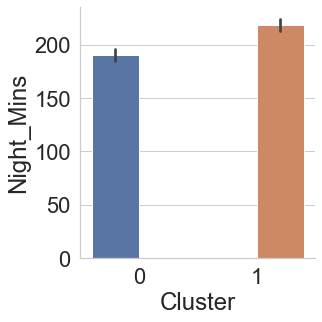

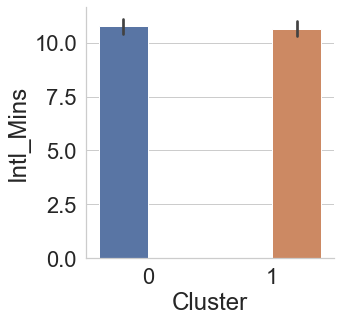

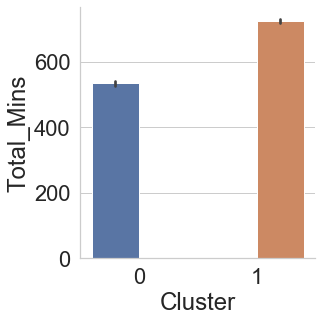

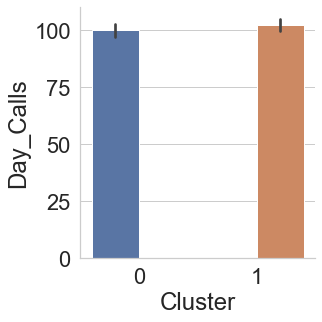

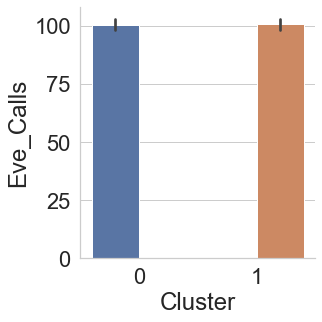

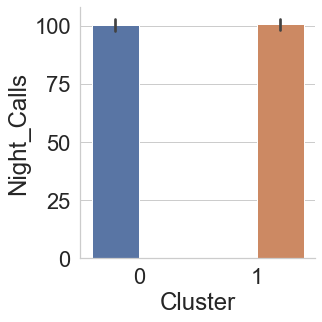

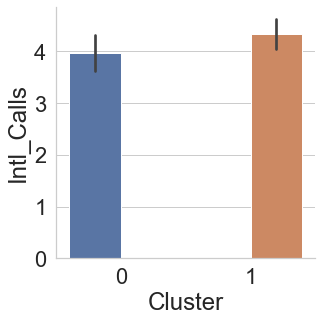

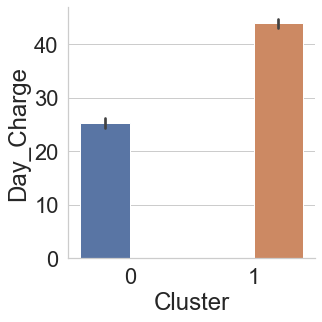

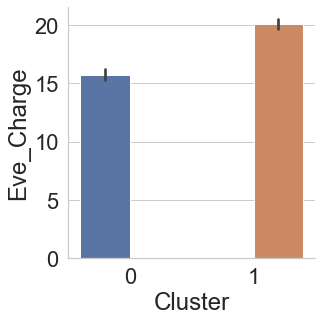

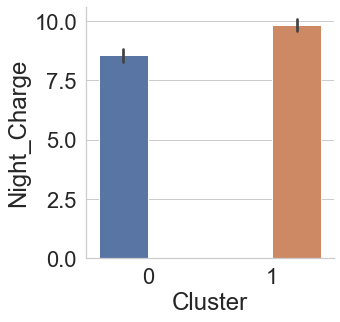

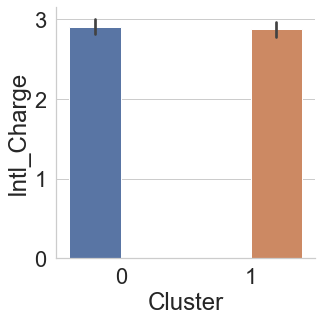

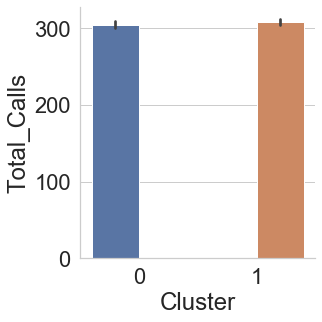

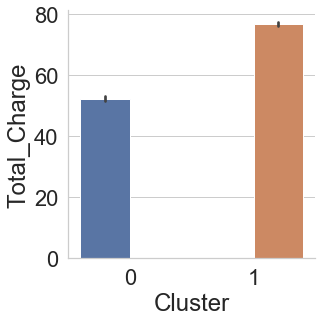

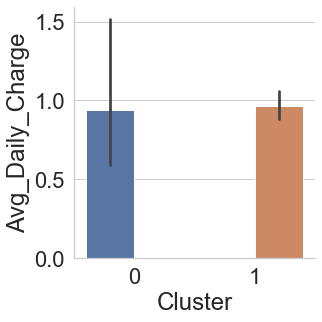

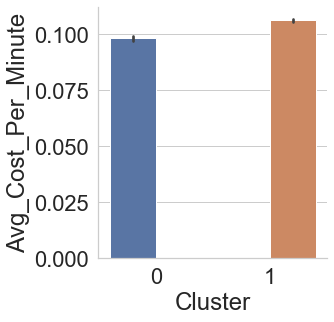

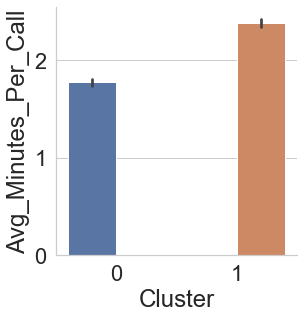

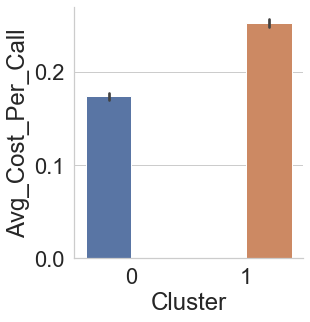

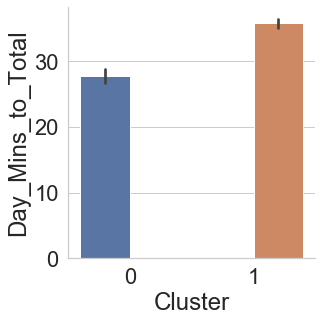

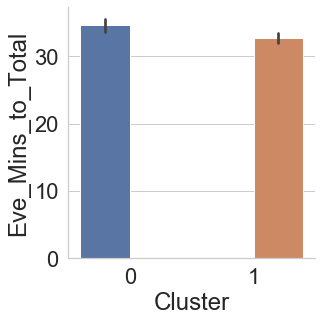

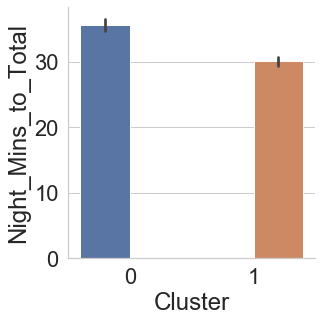

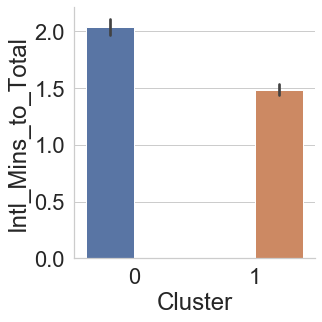

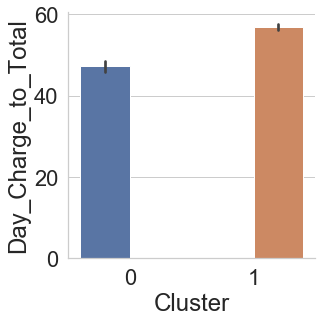

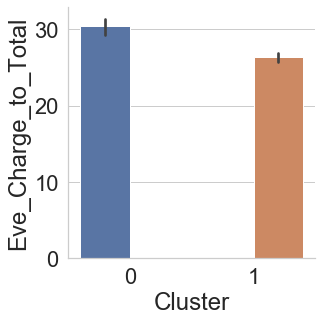

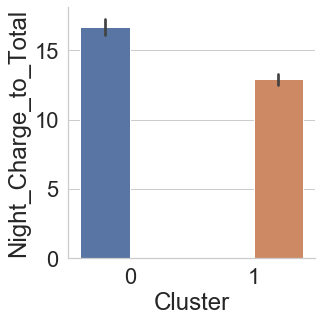

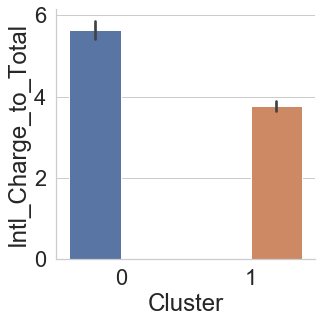

In [383]:
# plot quant variables by churner segment

for i in range(30):   
    f = sns.factorplot(data=churners, x='Cluster', y=churner_quant_cols[i], hue='Cluster', kind='bar')
    plt.show()

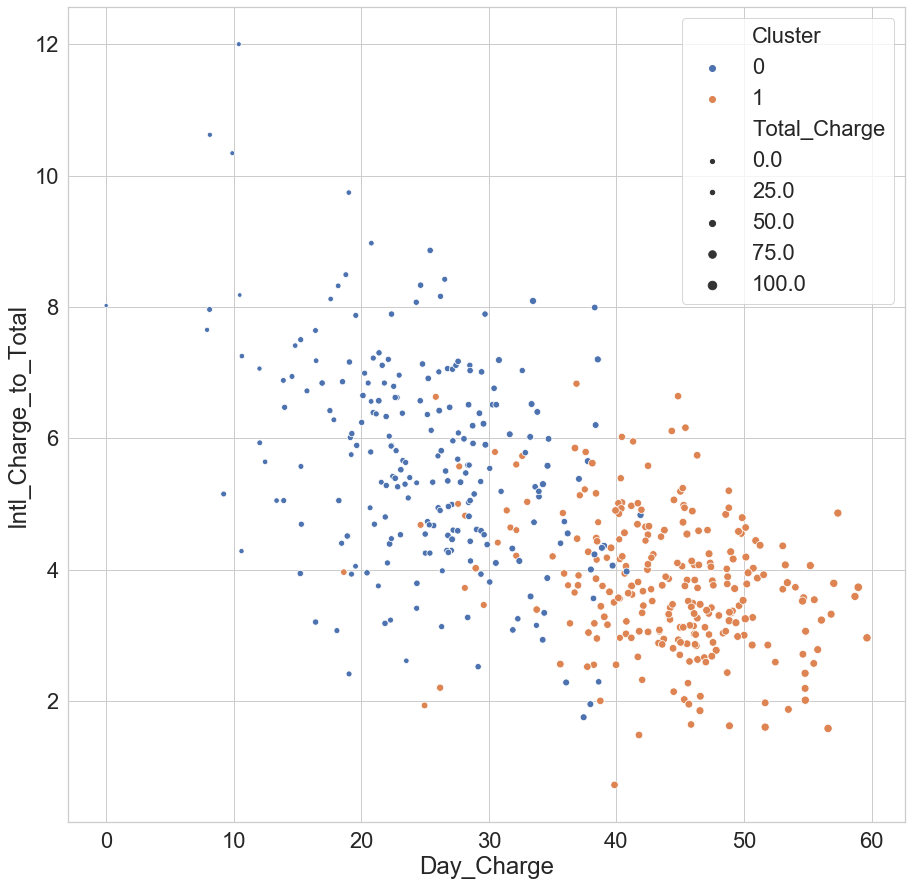

In [385]:
# highlight key differences within inter-churner clusters

sns.set_style('whitegrid')
plt.subplots(figsize=(15, 15))
sns.scatterplot(x='Day_Charge', y='Intl_Charge_to_Total', data=churners, hue='Cluster', size='Total_Charge')

In [387]:
# append cluster assignments to full dataset

churn_data_with_segs = churn_data2.join(churners['Cluster'])

In [388]:
churn_data_with_segs

Phone  Area_Code State Churn Intl_Plan Vmail_Plan  CustServ_Calls  \
0     382-4657        415    KS    no        no        yes               1   
1     371-7191        415    OH    no        no        yes               1   
2     358-1921        415    NJ    no        no         no               0   
3     375-9999        408    OH    no       yes         no               2   
4     330-6626        415    OK    no       yes         no               3   
...        ...        ...   ...   ...       ...        ...             ...   
3328  414-4276        415    AZ    no        no        yes               2   
3329  370-3271        415    WV    no        no         no               3   
3330  328-8230        510    RI    no        no         no               2   
3331  364-6381        510    CT    no       yes         no               2   
3332  400-4344        415    TN    no        no        yes               0   

      Vmail_Message  Account_Length  Day_Mins  Eve_Mins  Night_Mins  \
0                25             128     265.1     197.4       244.7   
1                26             107     161.6     195.5       254.4   
2                 0             137     243.4     121.2       162.6   
3                 0              84     299.4      61.9       196.9   
4                 0              75     166.7     148.3       186.9   
...             ...             ...       ...       ...         ...   
3328             36             192     156.2     215.5       279.1   
3329              0              68     231.1     153.4       191.3   
3330              0              28     180.8     288.8       191.9   
3331              0             184     213.8     159.6       139.2   
3332             25              74     234.4     265.9       241.4   

      Intl_Mins  Total_Mins  Day_Calls  Eve_Calls  Night_Calls  Intl_Calls  \
0          10.0       717.2        110         99           91           3   
1          13.7       625.2        123        103          103           3   
2          12.2       539.4        114        110          104           5   
3           6.6       564.8         71         88           89           7   
4          10.1       512.0        113        122          121           3   
...         ...         ...        ...        ...          ...         ...   
3328        9.9       660.7         77        126           83           6   
3329        9.6       585.4         57         55          123           4   
3330       14.1       675.6        109         58           91           6   
3331        5.0       517.6        105         84          137          10   
3332       13.7       755.4        113         82           77           4   

      Day_Charge  Eve_Charge  Night_Charge  Intl_Charge  Total_Calls  \
0          45.07       16.78         11.01         2.70          303   
1          27.47       16.62         11.45         3.70          332   
2          41.38       10.30          7.32         3.29          333   
3          50.90        5.26          8.86         1.78          255   
4          28.34       12.61          8.41         2.73          359   
...          ...         ...           ...          ...          ...   
3328       26.55       18.32         12.56         2.67          292   
3329       39.29       13.04          8.61         2.59          239   
3330       30.74       24.55          8.64         3.81          264   
3331       36.35       13.57          6.26         1.35          336   
3332       39.85       22.60         10.86         3.70          276   

      Total_Charge  Avg_Daily_Charge  Avg_Cost_Per_Minute  \
0            75.56              0.59                 0.11   
1            59.24              0.55                 0.09   
2            62.29              0.45                 0.12   
3            66.80              0.80                 0.12   
4            52.09              0.69                 0.10   
...            ...               ...               

In [389]:
# rename cluster assignments 0 = retained, 1 = churn segment 1, 2 = churn segment 0

def k_assign(row):
    if row['Cluster'] == 0:
        return 2
    elif row['Cluster'] == 1:
        return 1
    else:
        return 0

churn_data_with_segs = churn_data_with_segs.assign(Cluster=churn_data_with_segs.apply(k_assign, axis=1))

In [335]:
# check value counts

churn_data_with_segs['Cluster'].value_counts()

0    2850
2     257
1     226
Name: Cluster, dtype: int64

In [336]:
churn_data_with_segs['Area_Code'].value_counts()

415    1655
510     840
408     838
Name: Area_Code, dtype: int64

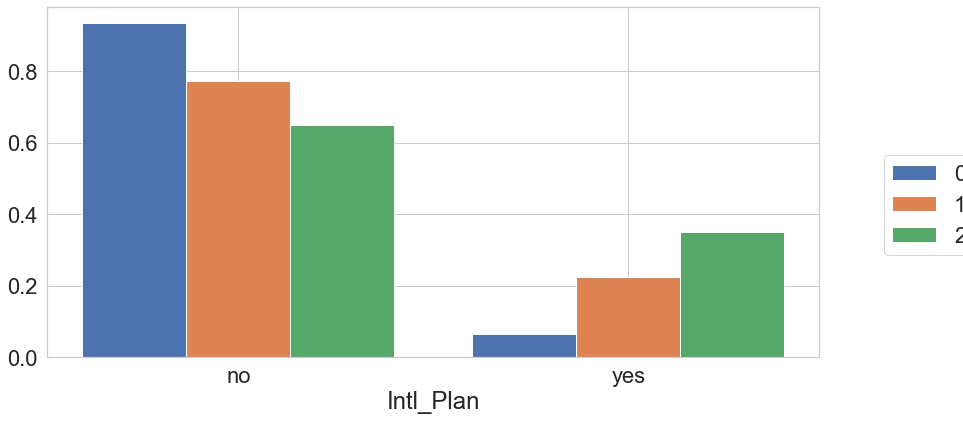

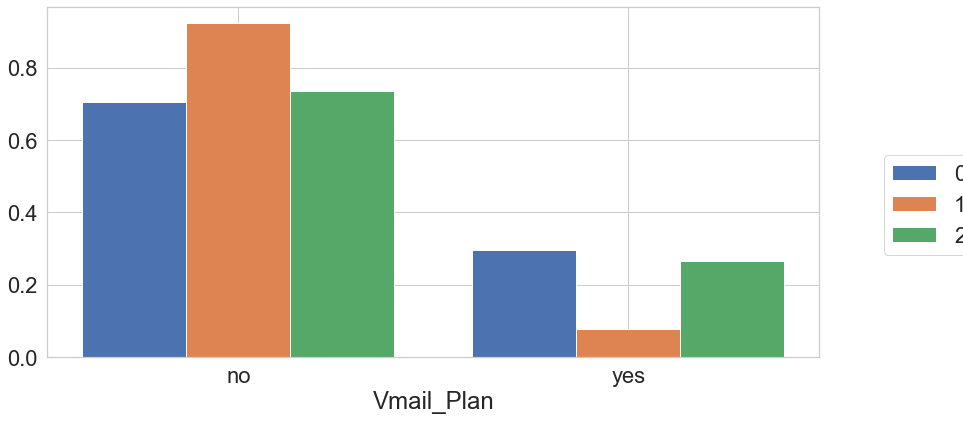

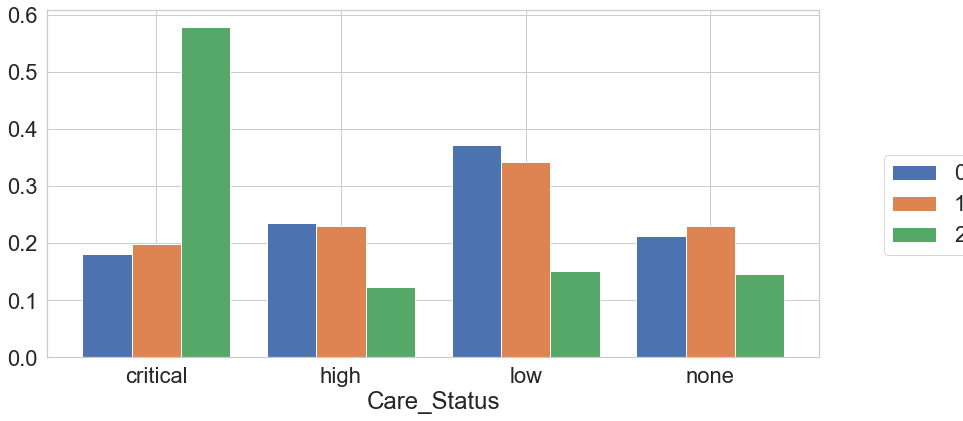

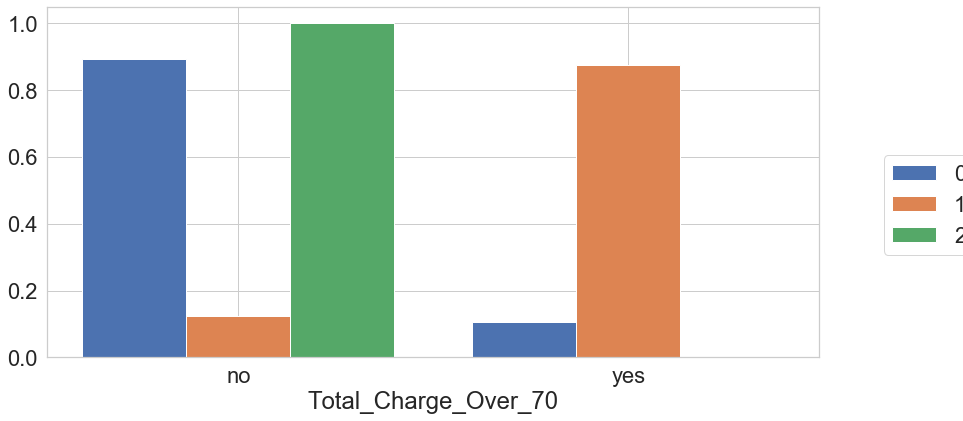

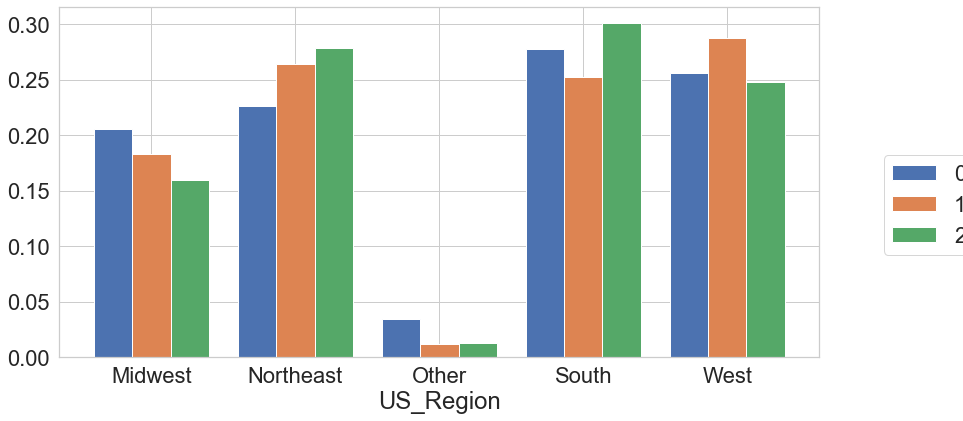

In [393]:
# compare churner segments to non-churners against cat variables

sns.set_style('whitegrid')

for i in range(5):
    g = dxp.aggplot(data=churn_data_with_segs, agg=churner_cat_cols[i], hue='Cluster', normalize='Cluster')
    g.set(xlabel=churner_cat_cols[i])
    plt.show()

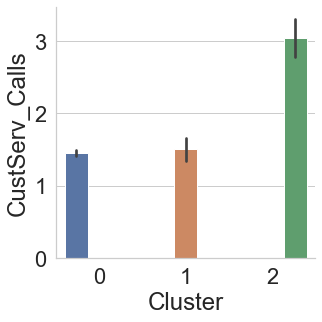

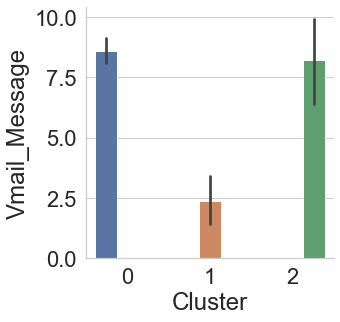

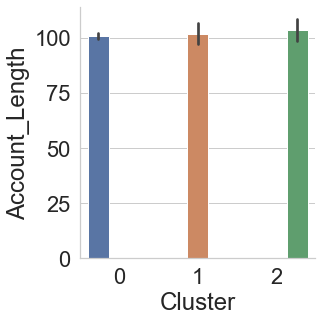

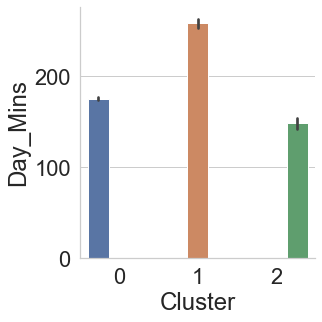

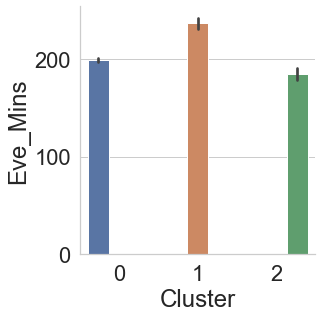

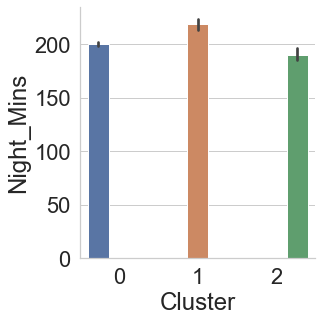

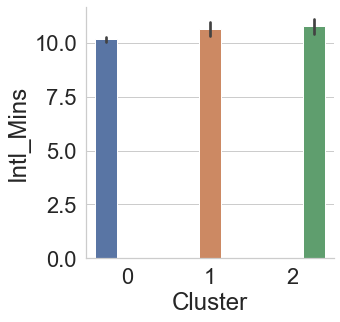

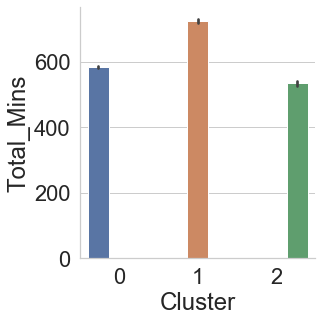

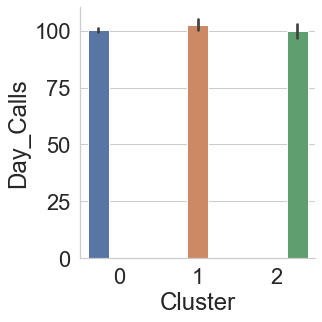

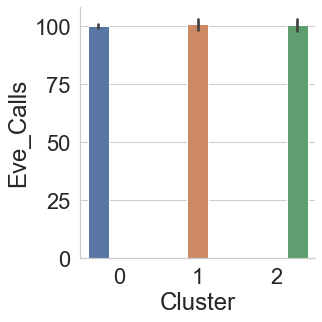

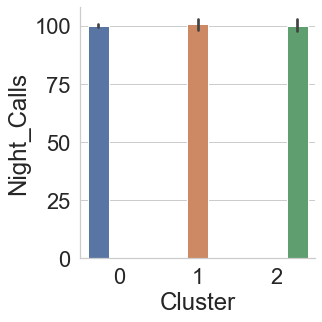

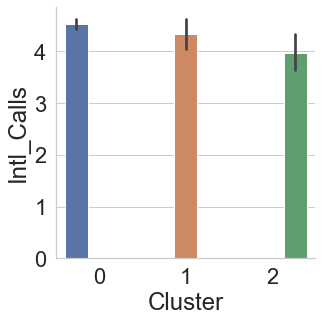

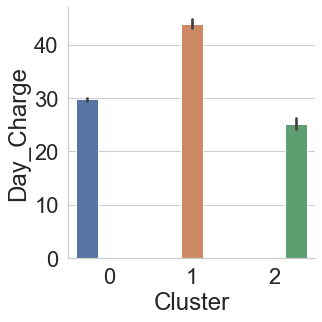

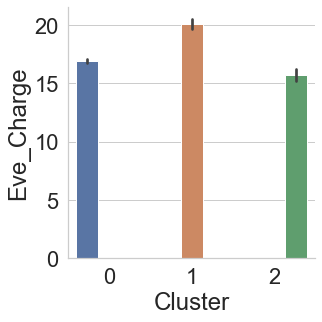

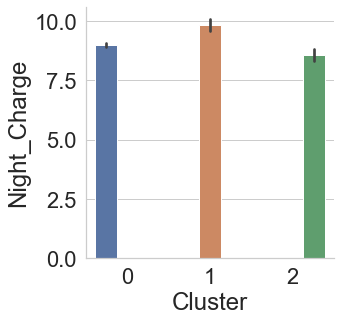

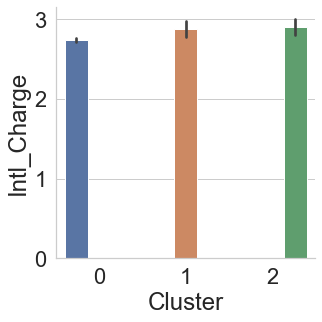

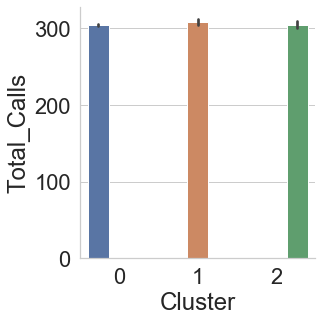

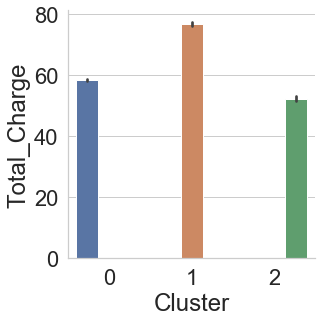

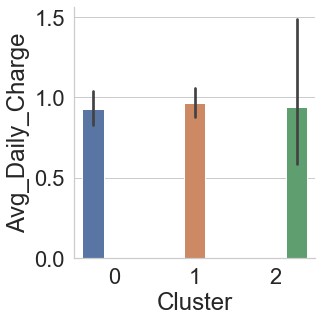

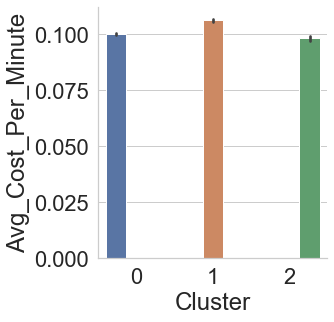

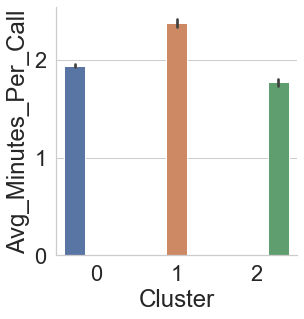

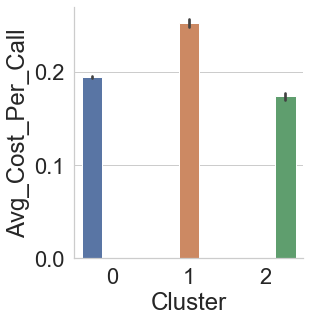

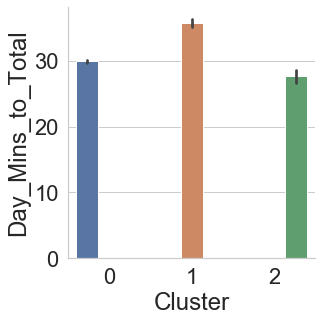

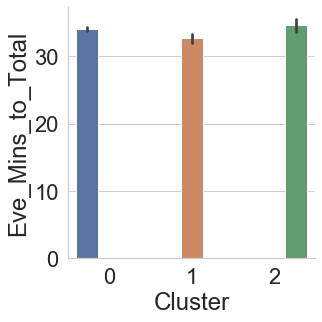

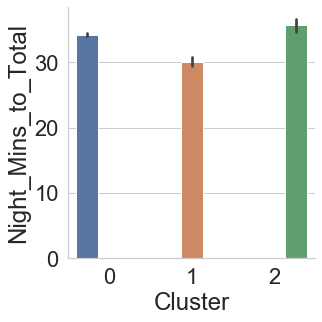

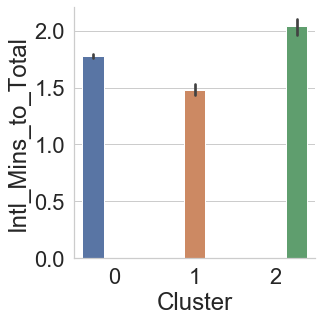

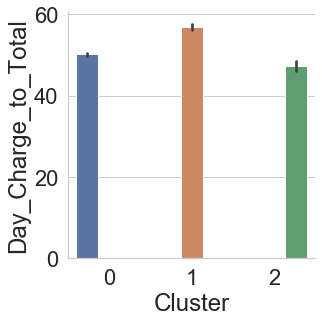

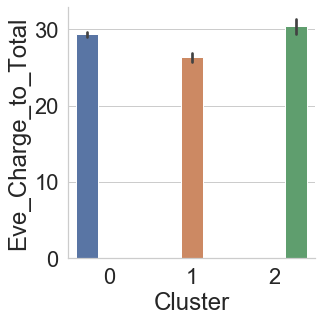

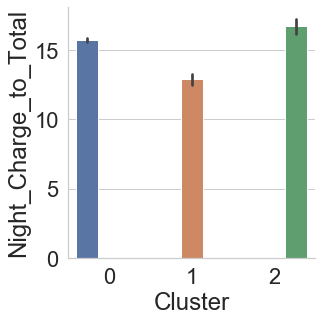

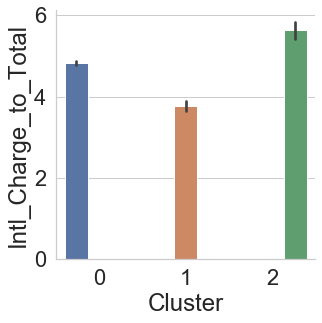

In [395]:
# plot the same comparison against quant variables

for i in range(30):   
    f = sns.factorplot(data=churn_data_with_segs, x='Cluster', y=churner_quant_cols[i], hue='Cluster', kind='bar')
    plt.show()

In [396]:
# set up variables to rerun random forest methodology against churner segments as well as non-churners

X1 = cont_columns_scaled_df[features]
y1 = churn_data_with_segs['Cluster']

In [397]:
# tune hyperparameters with randomized param search

clf = RandomForestClassifier()

param_grid = {"max_depth": [3, 5, 8, 15, 25, 30, None],
              "max_features": [1, 3, 10, 15, 20, 30],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

random_search = RandomizedSearchCV(clf, param_grid)

random_search.fit(X1, y1)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [398]:
# print best params

print(random_search.best_params_)

{'max_features': 30, 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}


In [413]:
# set up model with best params and run train test split
# here again the results differ every time from the original model

clf3 = RandomForestClassifier(bootstrap=False, max_depth=None, max_features=30, criterion='gini')
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20)
clf3.fit(X1_train, y1_train)
y1_pred = clf3.predict(X1_test)

In [414]:
# print summary metrics

summary1 = metrics.classification_report(y1_test, y1_pred)
print(summary1)
print()

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       571
           1       0.89      0.88      0.88        48
           2       0.95      0.85      0.90        48

    accuracy                           0.97       667
   macro avg       0.94      0.91      0.92       667
weighted avg       0.97      0.97      0.97       667




In [415]:
# print confusion matrix

cnf_matrix1 = metrics.confusion_matrix(y1_test, y1_pred)
cnf_matrix1

array([[564,   5,   2],
       [  6,  42,   0],
       [  7,   0,  41]])

(3.0, 0.0)

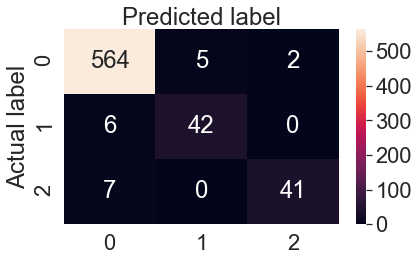

In [416]:
# Plot confusion matrix

class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [417]:
# Calculate feature importances
importances_1 = clf3.feature_importances_

# Create labels
labels_1 = X1.columns

feats_1 = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(labels_1, importances_1):
    feats_1[feature] = importance #add the name/value pair 
    
importances_1 = pd.DataFrame.from_dict(feats_1, orient='index').rename(columns={0: 'Importance'})
importances_1 = importances_1.sort_values('Importance', ascending=False)

In [419]:
# convert importances to a dataframe

importances_1 = importances_1.reset_index()

In [420]:
# rename columns

importances_1 = importances_1.rename(columns={'index':'Feature'})

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text xticklabel objects>)

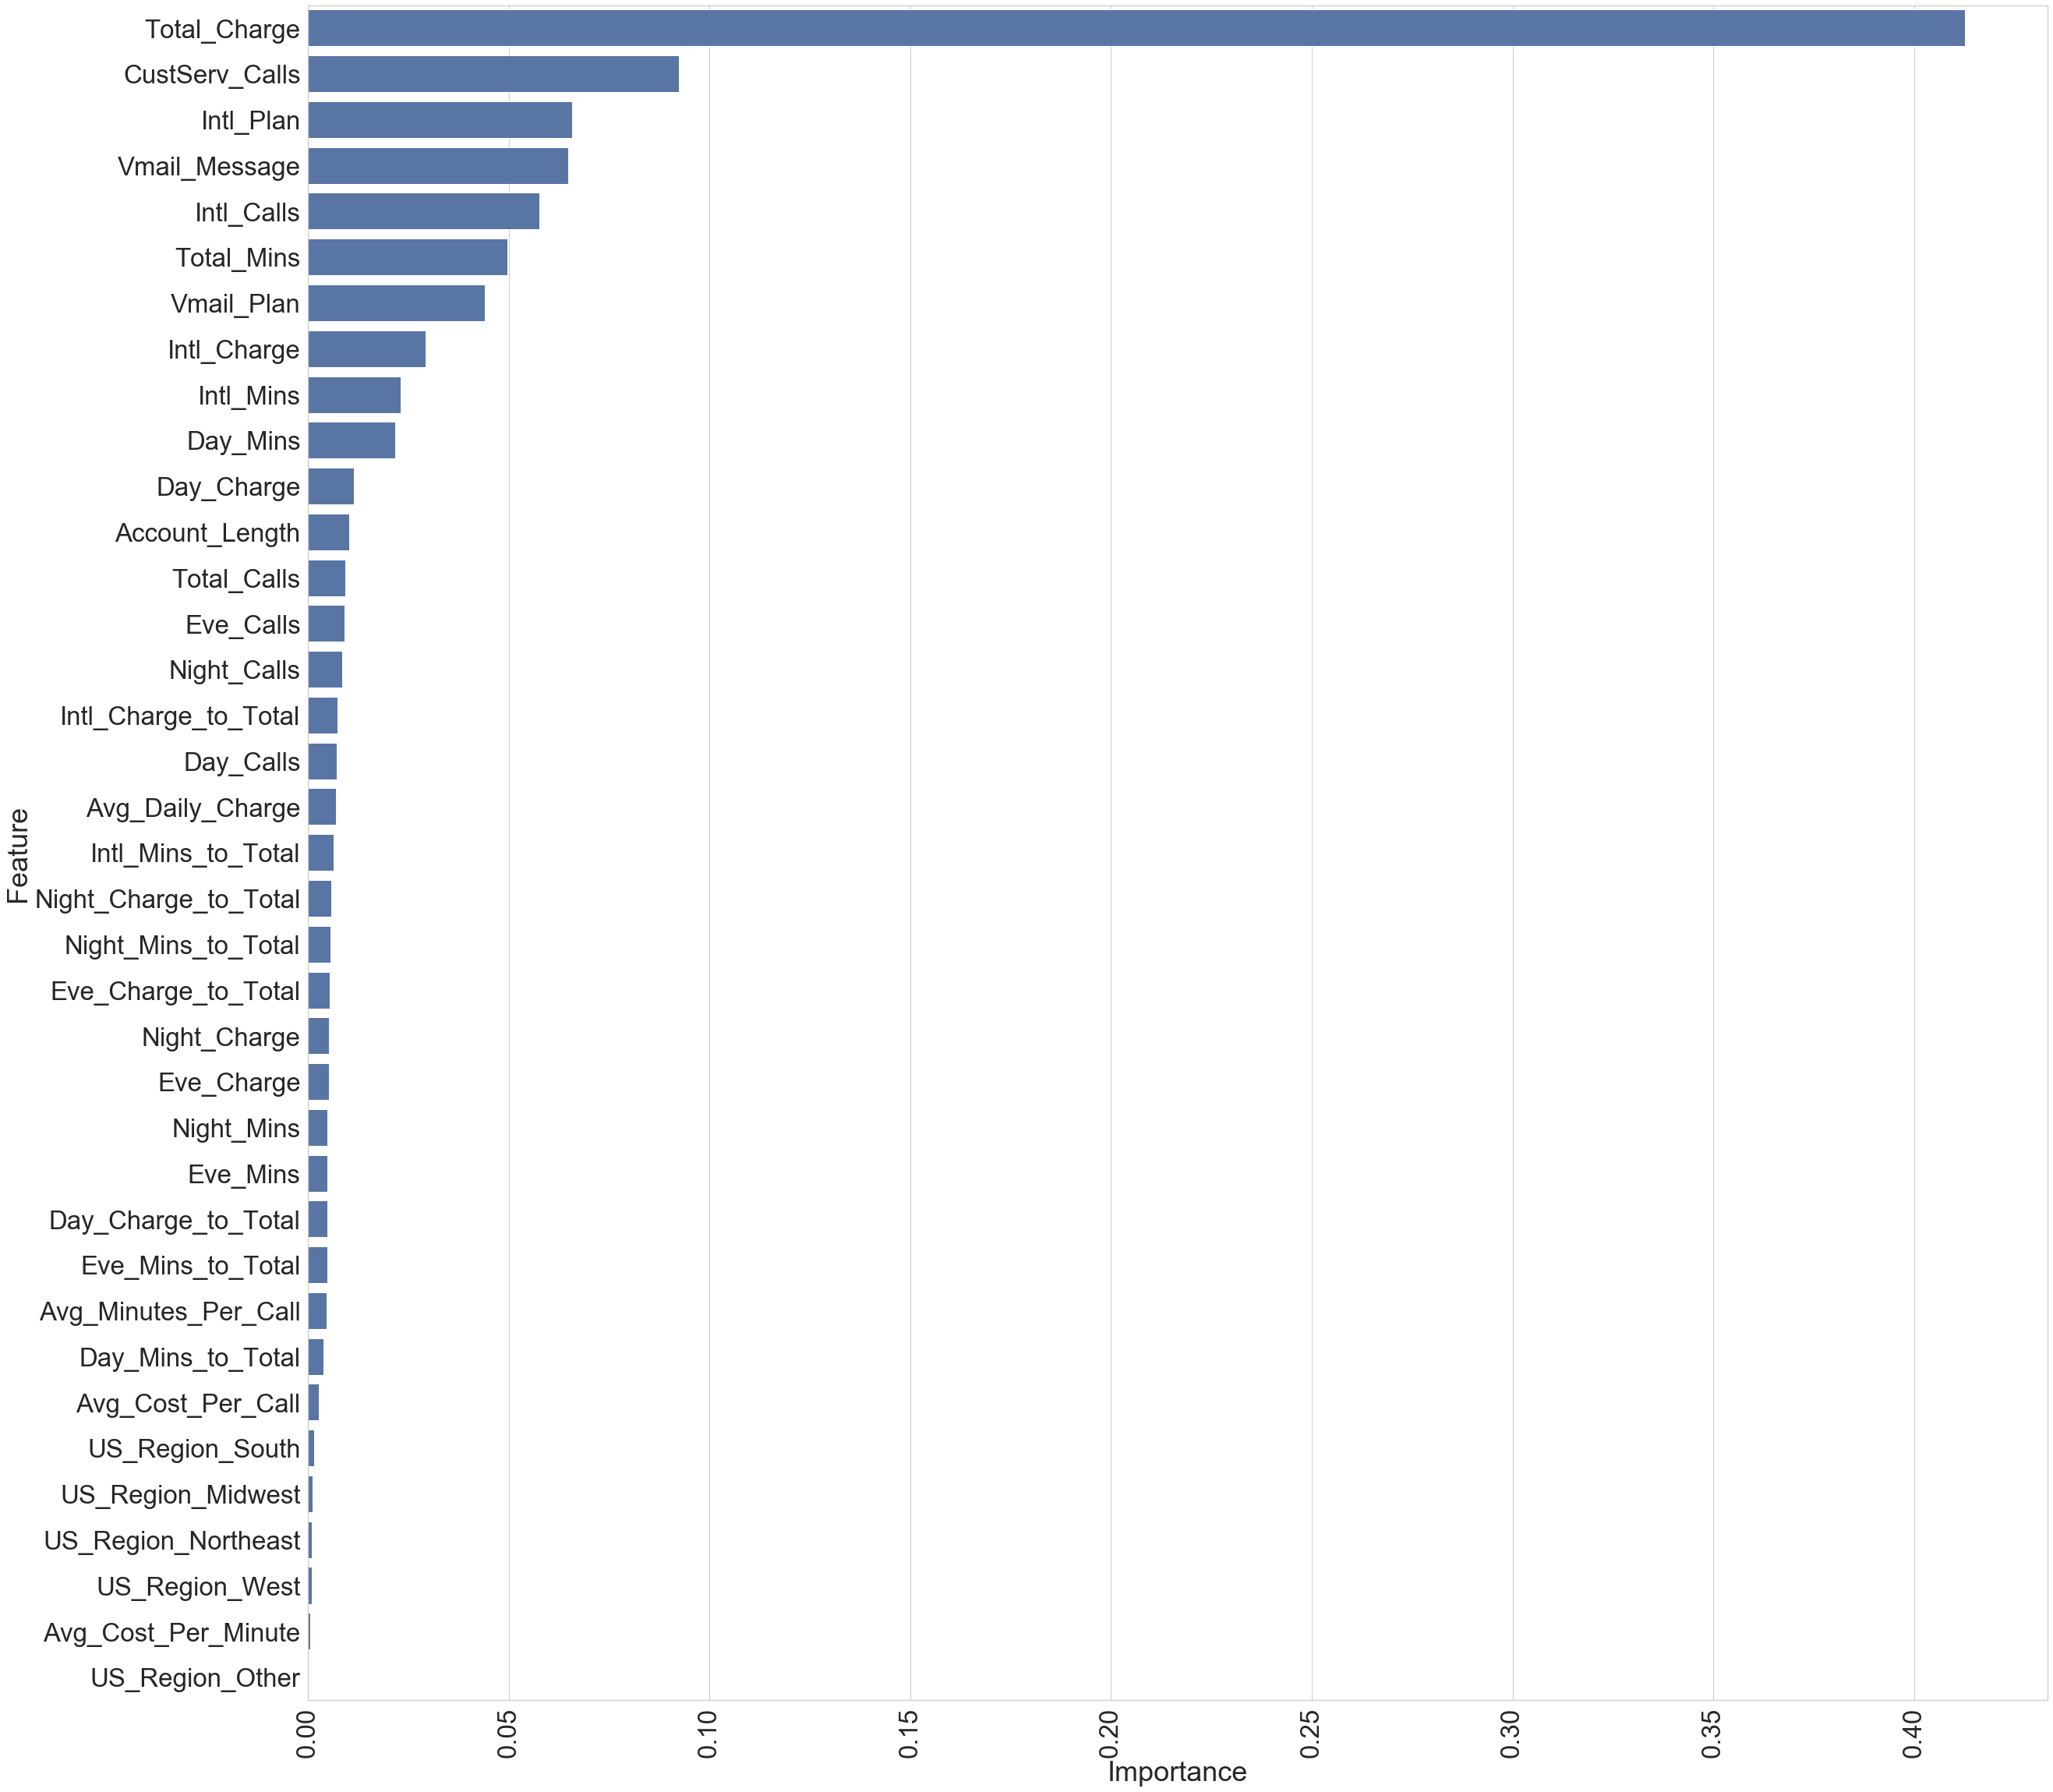

In [421]:
# plot importances

sns.set_style('whitegrid')
plt.subplots(figsize=(40, 40))
sns.set(font_scale=3)
sns.barplot(data=importances_1, y ='Feature', x='Importance', color='b')
plt.xticks(rotation=90)